##### guardare papers: "Weakly Budget Balanced Results"

### SCOUTING BLINDITS (SBL)
 
**input:** exploration time $T_0$, grid size K
 
**initialization**: $q_k$ &larr; $\frac{k}{K+1}$ , $\hat{F_k}$ &larr; 0, $\hat{G_k}$ &larr; 0, for all k $\in [K]$

**for** t=1,2,...,$2KT_0$ **do**

&emsp;**if** t is odd **then**:

&emsp;&emsp;draw $U_t$ from $[q_k,1]$ uniformly at random;

&emsp;&emsp;post price $(q_k,U_t)$ and observe feedback $(I_{S_t \leq q_k \leq U_t \leq B_t} )$

&emsp;&emsp;let 
$\hat{F_k}$ &larr;  $\hat{F_k} + \frac{1}{T_0}(1-q_k)*(I_{S_t \leq q_k \leq U_t \leq B_t} )$

&emsp;**else** :

&emsp;&emsp;draw $V_t$ from $[0,q_k]$ uniformly at random

&emsp;&emsp;post price $(V_t,q_k)$ and observe feedback $(I_{S_t \leq V_t  \leq q_k \leq B_t} )$

&emsp;&emsp;let 
$\hat{G_k}$ &larr;  $\hat{G_k} + \frac{1}{T_0}(q_k)*(I_{S_t \leq V_t  \leq q_k  \leq B_t} )$

&emsp;**end**

&emsp;**if** $t > 2kT_0$ **then**:

&emsp;&emsp;let k &larr; k + 1

&emsp;**end**

**end**

compute $\hat{I^\star} \in argmax_{k \in [K]} (\hat{F_k} + \hat{G_k})$ 
and let $\hat{P^\star}$ &larr; $q_{\hat{I^\star}}$

**for** t = $2kT_0+1...$ **do**:

&emsp;post the price $\hat{P^\star}$ to both the seller and the buyer;

**end**

## DEFINIAMO IL GAIN FROM TRADE

$GFT: [0,1]^2 x [0,1]^2$ &rarr; $[0,1]$,
    &emsp; $(p,p^{'},b, s)$ &rarr; $(b-p^{'} + p - s) * $  **I** $(s \leq p \leq p^{'} \leq b)$

In [5]:
def gft(p_seller, s, p_buyer, b):
    return (b - p_buyer + p_seller - s) if (s <= p_seller <= p_buyer <= b) else 0

In [6]:
def print_all(F, G, S_D, B_D):
    print("Feedback F: ", F)
    print("Feedback G: ", G)
    #print("Distribuzione seller: ", S_D)
    #print("Distribuzione buyer: ", B_D)

## ALGORITMO

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import pandas as pd
%run distributions.ipynb
%run grafici_bandits.ipynb

In [9]:
# Funzione per osservare il feedback in base al prezzo
def observe_feedback(S_t, q_k, U_t, B_t):
    return 1 if((S_t <= q_k) & (q_k <= U_t) & (U_t <= B_t)) else 0

In [10]:
def print_all_exploration_phase(t, fdb_s, fdb_b):
    print("\nRound: #", t)
    print("fdb_s: ",fdb_s,"\tfdb_b: ",fdb_b)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import pandas as pd
import random

In [12]:
def SBL(T_0, K, S_D, B_D, graph_values,type_distribution):
    q = [i/(K+1) for i in range(0, K+1)]
    feedback_even = [] #feedback ottenuti quando t pari
    feedback_odd = [] #feedback ottenuti quando t dispari
    F = [0] * (K+1)
    G = [0] * (K+1)
    k = 0
    P_star = 0

    #//scoutingphase
    for t in range(0, 2*K*T_0):
        
        #seller, buyer distribuzione
        S_t = S_D[t]
        B_t = B_D[t]
       
        #se t pari
        if t % 2 == 0:
            Ut = random.uniform(q[k], 1)
            #get feedback
            feedback = observe_feedback(S_t, q[k], Ut, B_t) # 1 o 0
            feedback_even.append(feedback)
            F[k] += F[k] + ((1/T_0) * (1 - q[k])) * feedback
            
        #se t dispari
        else:
            Vt = random.uniform(0, q[k])
            #get feedback
            feedback = observe_feedback(S_t,Vt,q[k],B_t) # 1 o 0
            feedback_odd.append(feedback)
            G[k] += G[k] + ((1/T_0) * q[k]) * feedback
        
        #aggiorniamo valore k
        if t >= 2 * k * T_0: k += 1

    #calcolato l'indice I_star corrispondente all'opzione con il punteggio massimo ottenuto nella fase di scouting phase.
    #range(K) genera una sequenza di numeri da 0 a K-1, che rappresenta gli indici delle opzioni possibili. 
    #La funzione key=lambda k: F[k] + G[k] definisce una funzione lambda che prende in input 
    #un indice k e restituisce la somma dei valori F[k] e G[k]. 
    #Questa funzione lambda viene utilizzata come criterio per determinare il valore massimo nella sequenza.
    
    I_star = max(range(K), key=lambda k: F[k] + G[k])
    P_star = q[I_star]

    #blind phase
    gft_all = []
    for t in range(0, 2*K*T_0):
        #post price
        #calcola GFT usando come prezzo per seller, buyer = P_STAR
        #in quanto se ne frega dei feedback ottenuti
        #vediamo il risultato ottenuto
        
        gft_t = gft(P_star, S_D[t], P_star, B_D[t])
        gft_all.append(gft_t)
        
    #print
    print("I_STAR: ",I_star)
    print("P_STAR: ", P_star)
    #print_all(F, G, S_D, B_D)
        
    #GRAFICI
    draw_gft_p_star(gft_all)
    draw_gft_total_sum_plot(gft_all)
    draw_regret_SBL(gft_all, 2*K*T_0)
    
    if(type_distribution == 1): draw_uniform_distribution(graph_values[0], graph_values[1], graph_values[2], graph_values[3], T_0 + 3*K)
    elif(type_distribution == 2): draw_pdf_beta(graph_values[0], graph_values[1], graph_values[2], graph_values[3], T_0 + 3*K)
    elif((type_distribution == 3) or (type_distribution == 4)): draw_weighted_distribution(graph_values[0], graph_values[1], graph_values[2], graph_values[3])
        
    draw_feedback(feedback_even, feedback_odd)
    
    draw_F_G(F,G)
    draw_F_G_each_round(F,G)

    return gft_all

## ESECUZIONE ALGORITMI

In [14]:
def execute_algo(T_0, K,type_distribution,num_cifre):
    # creiamo distribuzione in base al tipo
    if(type_distribution == 1):
        S_D, B_D, graph_values = create_beta_distribution( 2*K*T_0, num_cifre)
    elif(type_distribution == 2):
        S_D, B_D, graph_values = create_uniform_distribution( 2*K*T_0, num_cifre)
    else:
        S_D, B_D, graph_values = create_uniform_distribution_spaced( 2*K*T_0, num_cifre)
            

    gft_all = SBL(T_0, K, S_D, B_D, graph_values,type_distribution)
            
    return gft_all

In [15]:
def get_median_rewards(all_rewards, K,n):
    result = [0] * K
    
    for j in range(n):
        values = [sum(all_rewards[j][:i]) for i in range(0, K)]
        result = [i+j for i,j in zip(values,result)]

    median_result = [x / n for x in result]
    return median_result

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt

def graph_rewards(rewards, K):
    tot_rewards = [rewards[0]]
    for i in range(1, len(rewards)):
        val = tot_rewards[i-1] + rewards[i]
        
        tot_rewards.append(val)

    x = np.linspace(0, len(tot_rewards), len(tot_rewards))
    regret_3_4 = [num**(3/4) for num in x]
    regret_2_3 = [num**(2/3) for num in x]

    plt.figure(figsize=(12, 6))

    # Subplot 1
    plt.subplot(1, 2, 1)
    plt.plot(x, regret_3_4, label=r'$T^{\frac{3}{4}}$', color='blue', linewidth=2)
    plt.plot(x, regret_2_3, label=r'$T^{\frac{2}{3}}$', color='red', linewidth=2)
    plt.plot(range(0, K), tot_rewards[:K], label="Rewards",color='green')
    plt.xlabel('x')
    plt.title('Grafico della funzione regret')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [17]:
T_0 = int(input("Inserire tempo di esplorazione: "))
K = int(input("Inserire grandezza griglia punti: "))
while True:
    num_cifre = int(input("Inserire massimo numero di cifre dopo la virgola: \n"))
    if(num_cifre < 8): break

Inserire tempo di esplorazione:  300
Inserire grandezza griglia punti:  300
Inserire massimo numero di cifre dopo la virgola: 
 2


In [18]:
n = int(input("Inserire numero di ripetizioni algoritmo: "))
final_gft_results = []

Inserire numero di ripetizioni algoritmo:  10


### UNIFORME

I_STAR:  153
P_STAR:  0.5083056478405316


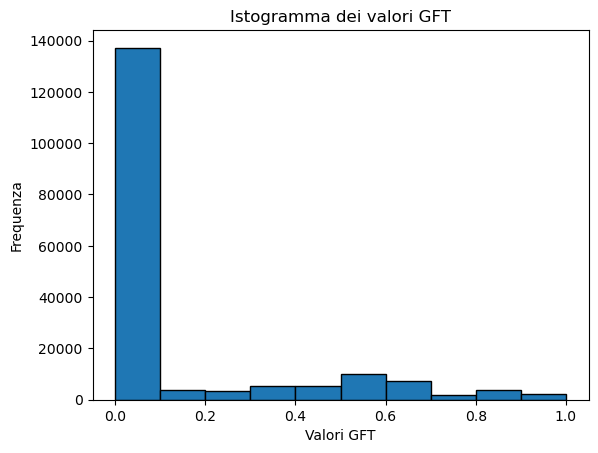

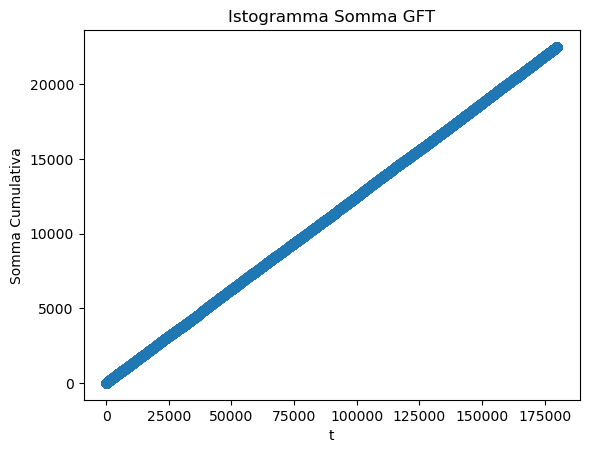

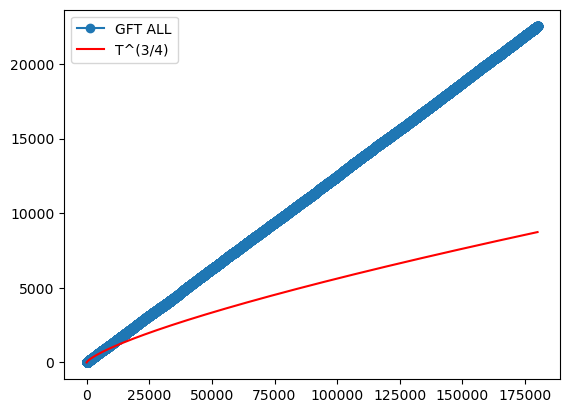

I_STAR:  234
P_STAR:  0.7774086378737541


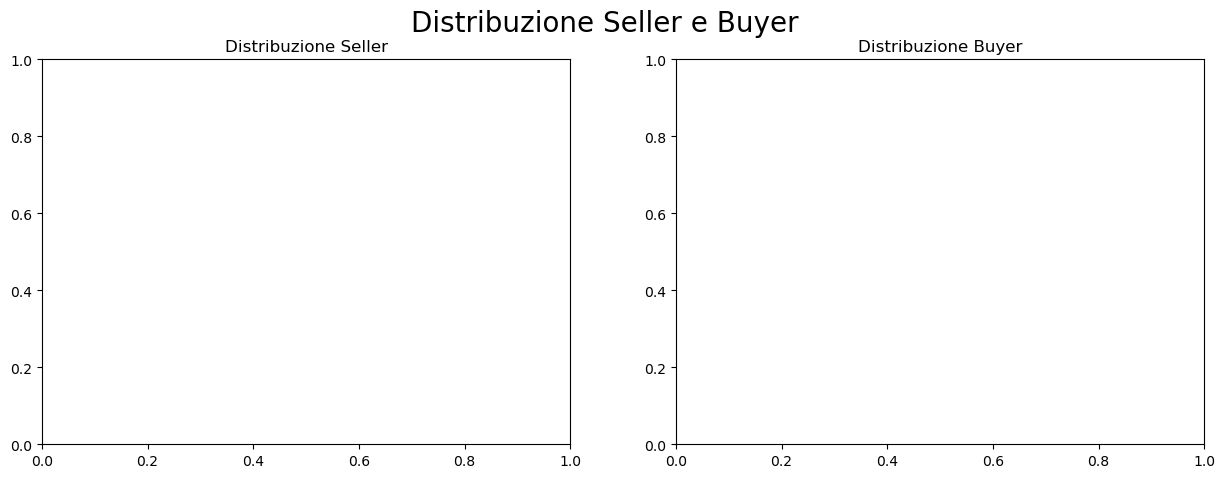

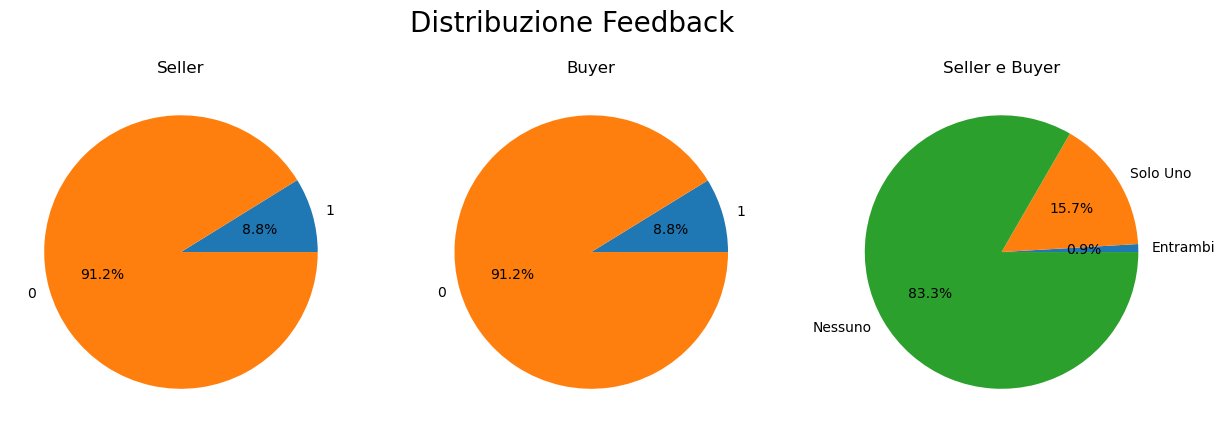

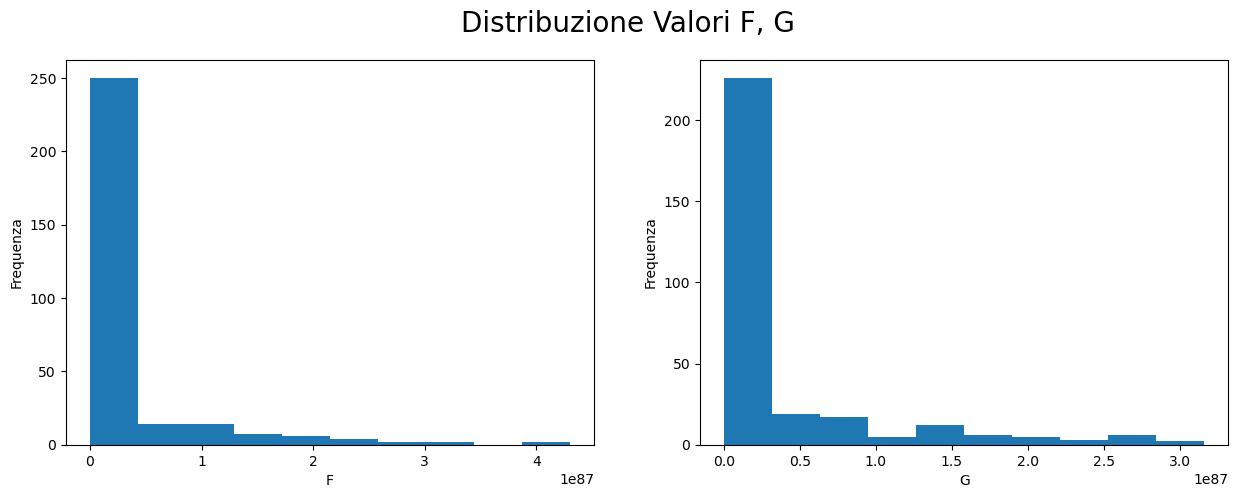

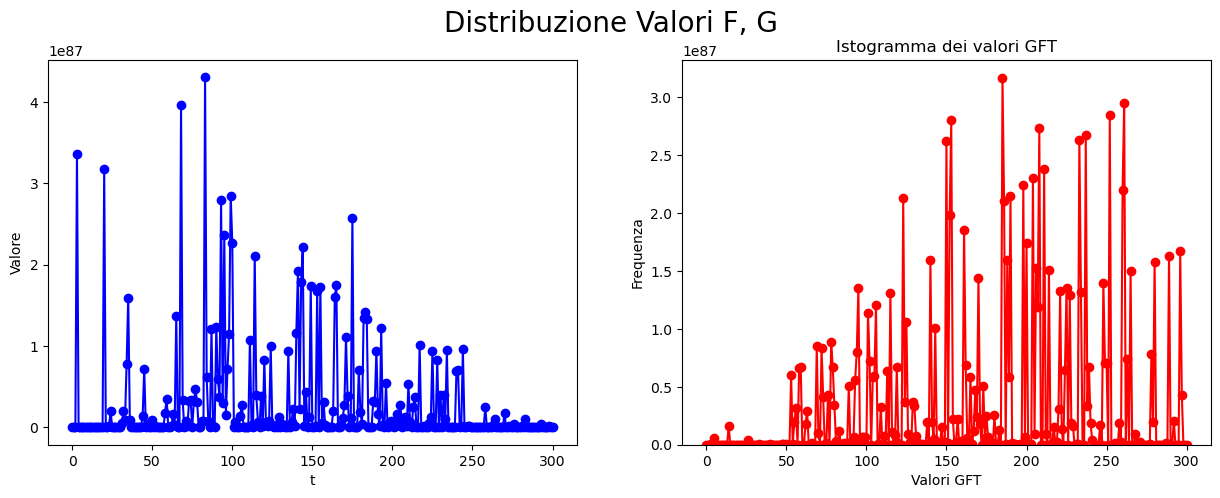

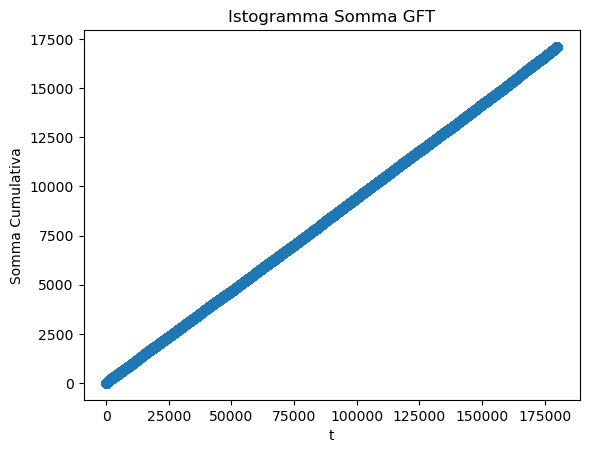

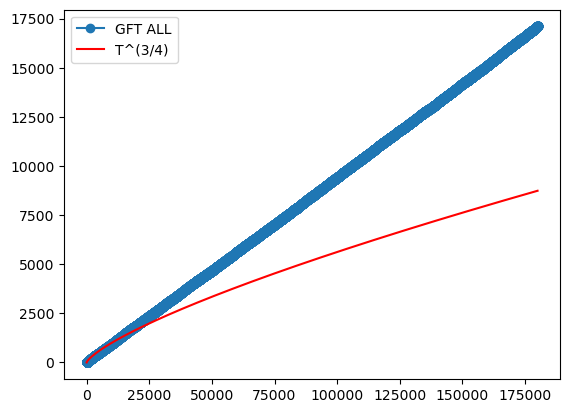

I_STAR:  188
P_STAR:  0.6245847176079734


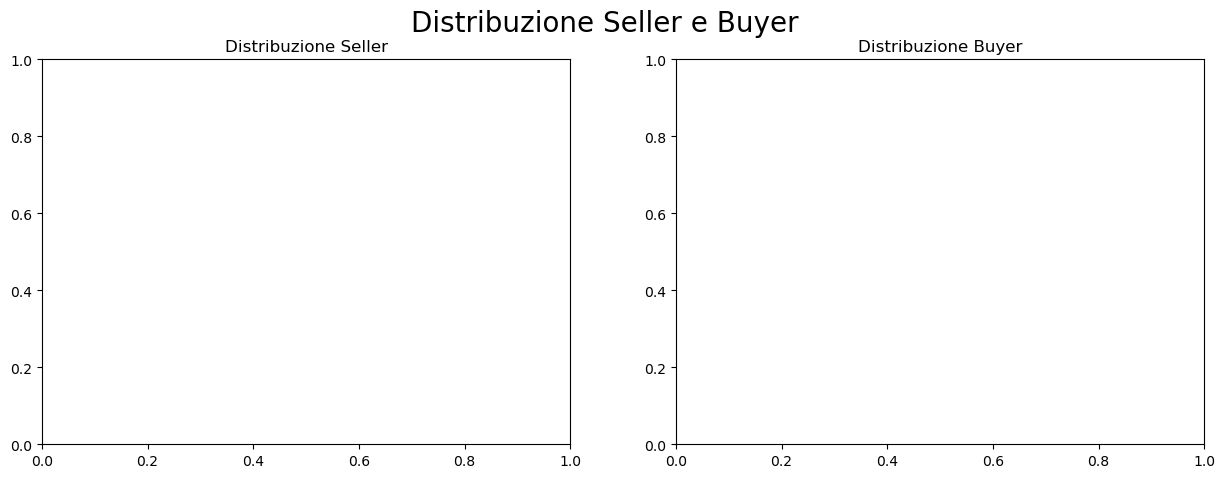

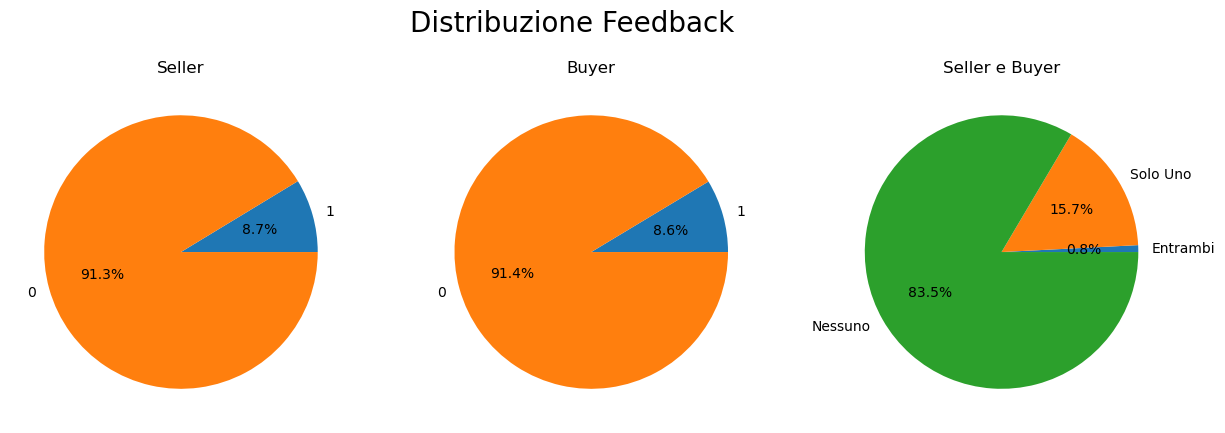

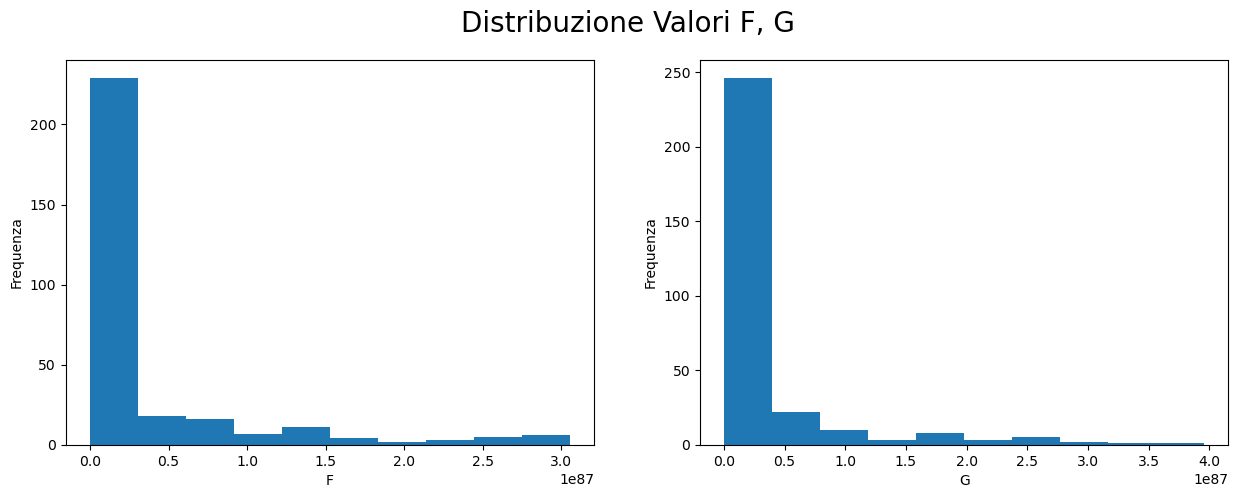

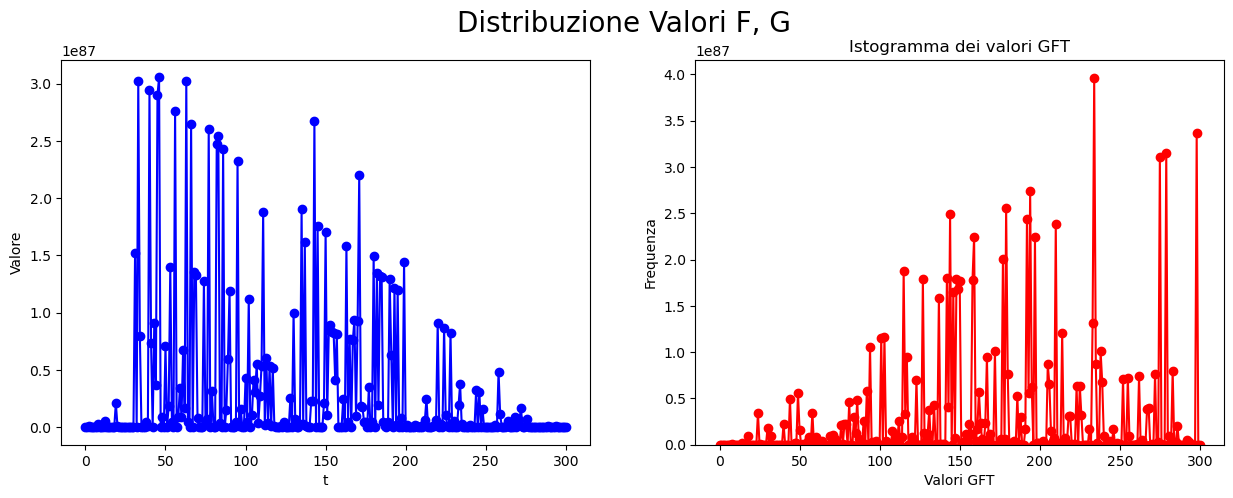

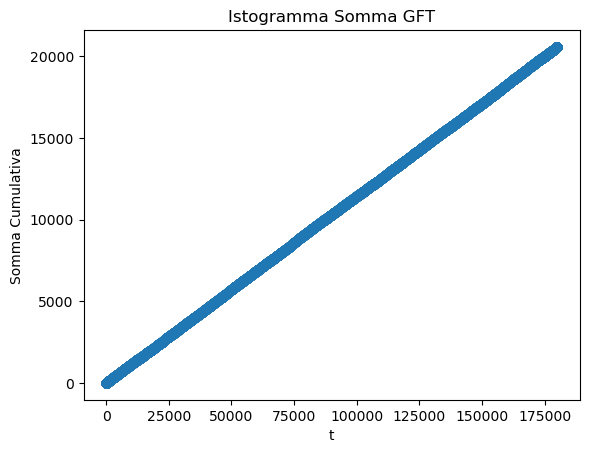

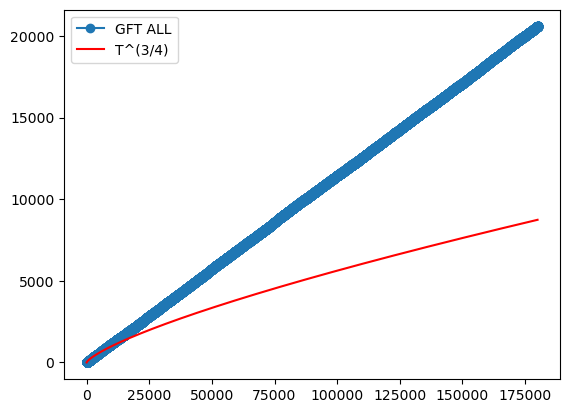

I_STAR:  37
P_STAR:  0.12292358803986711


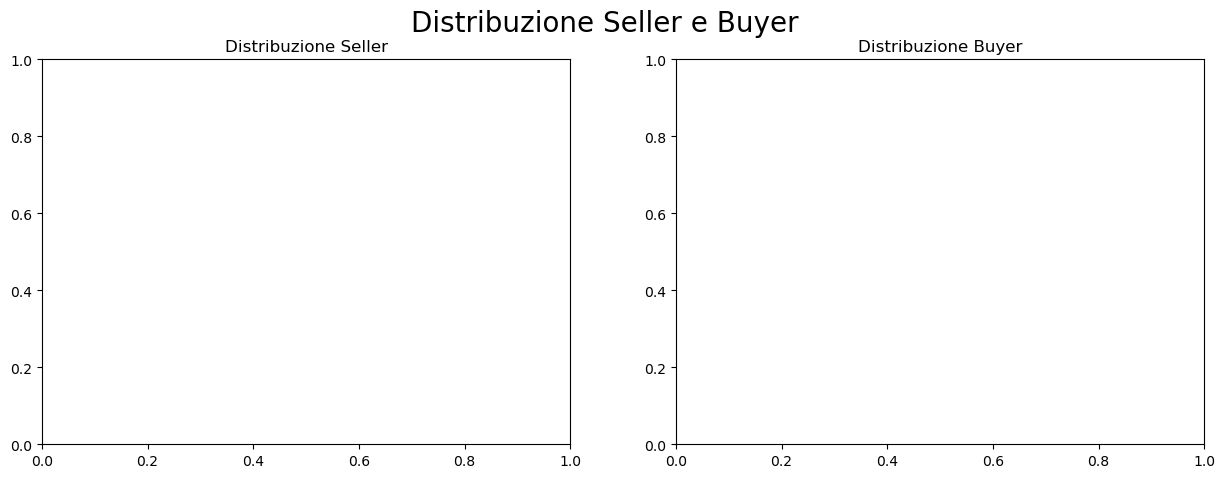

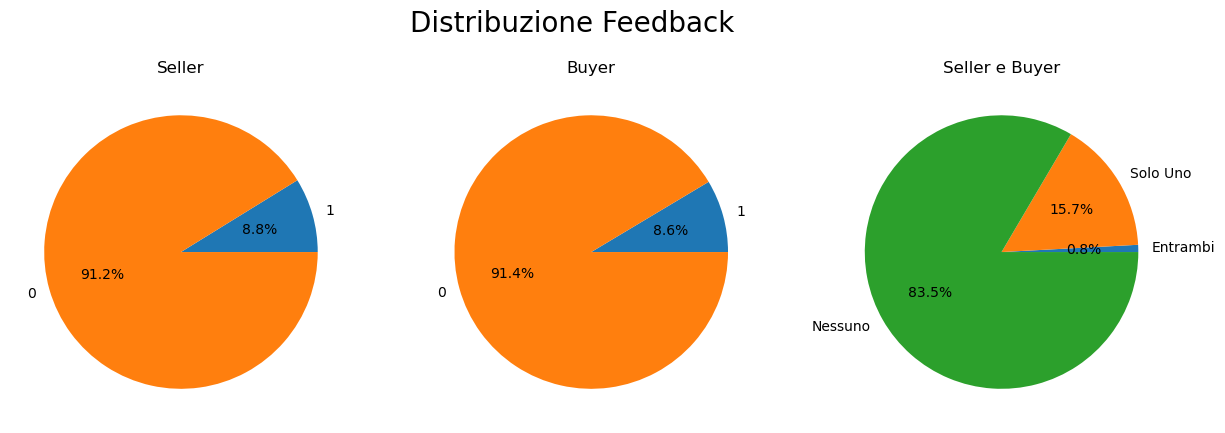

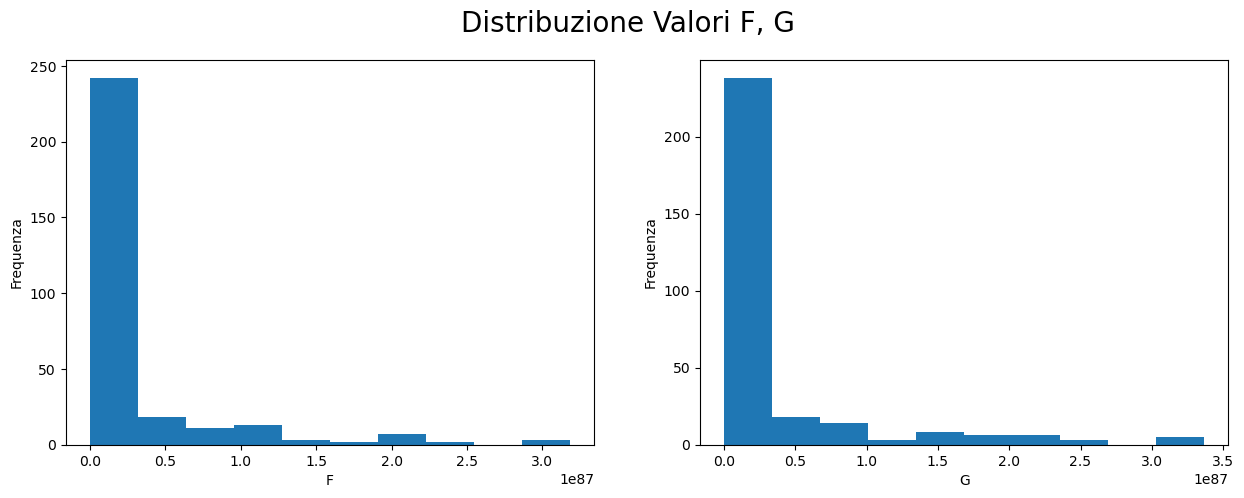

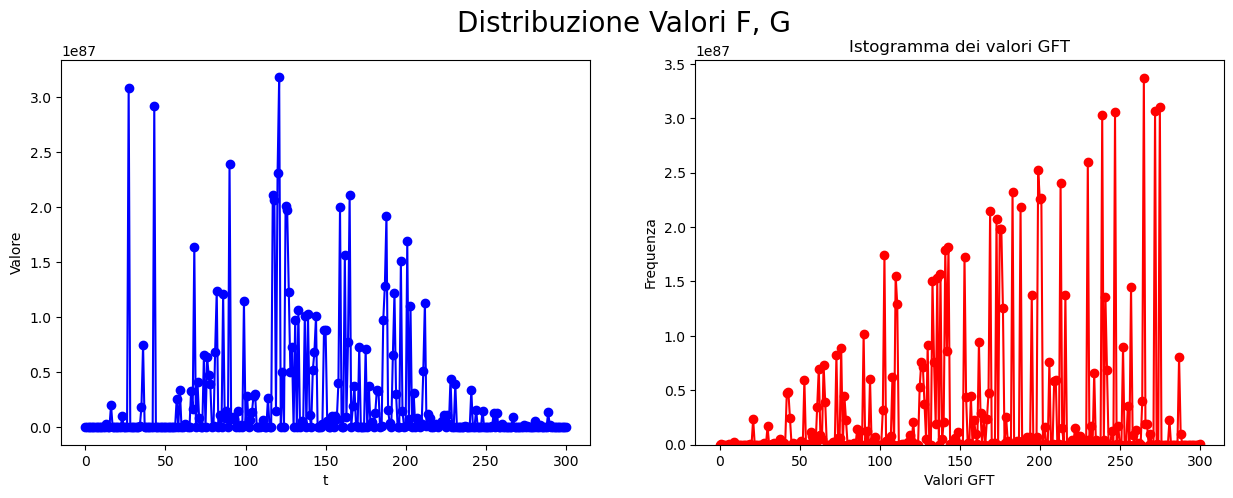

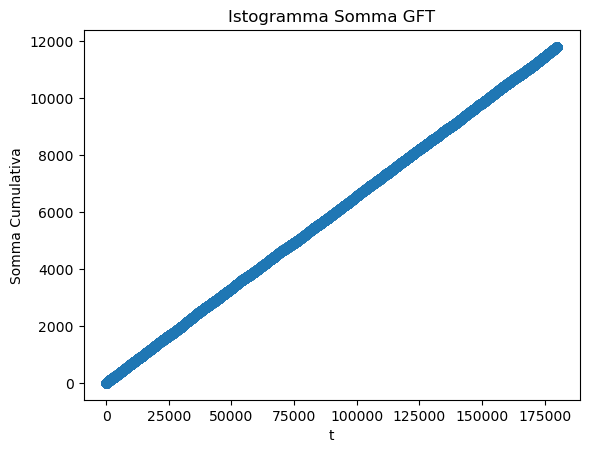

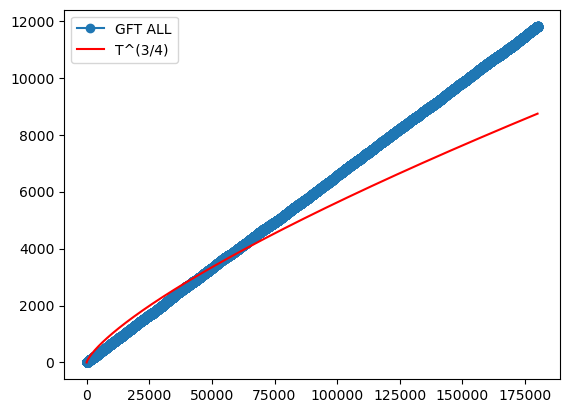

I_STAR:  84
P_STAR:  0.27906976744186046


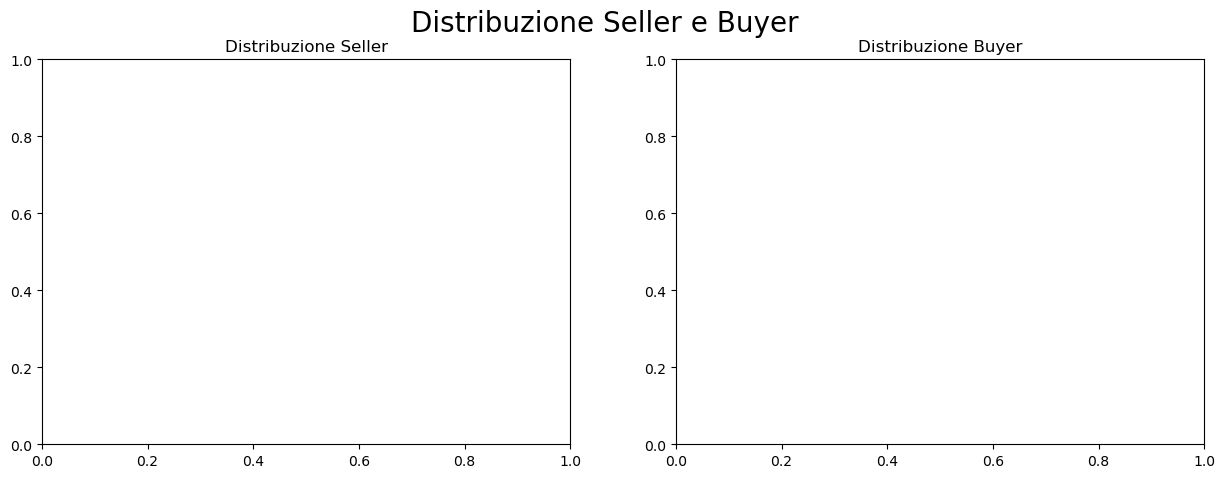

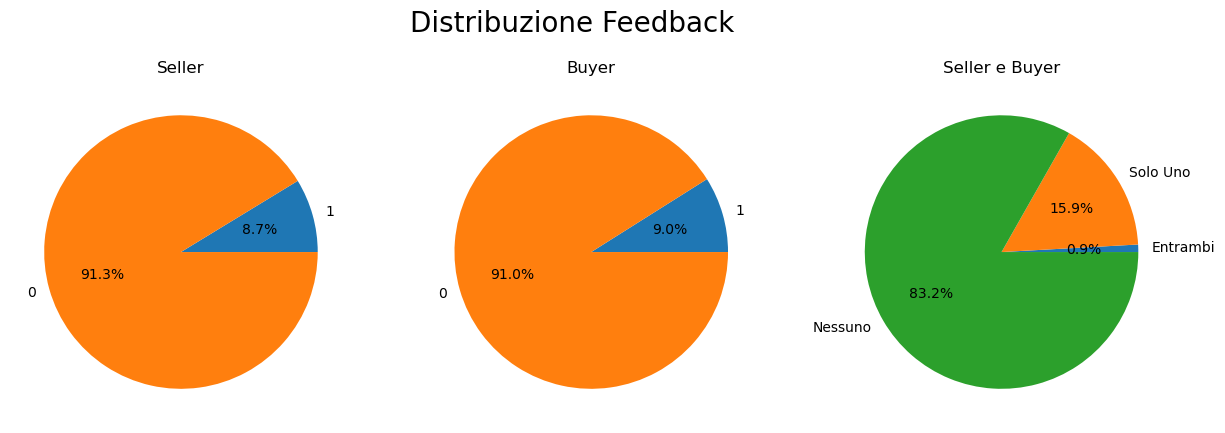

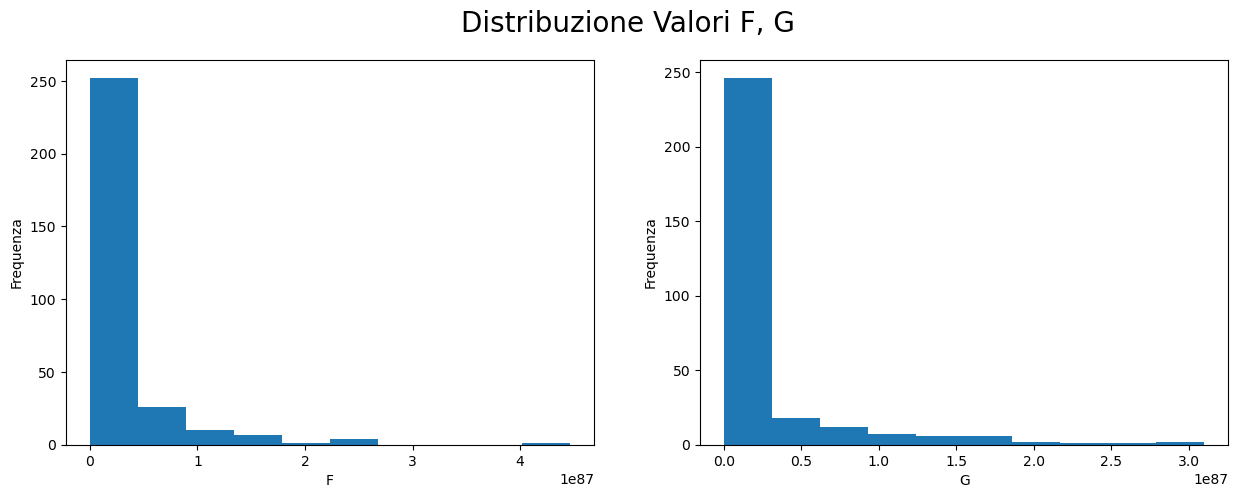

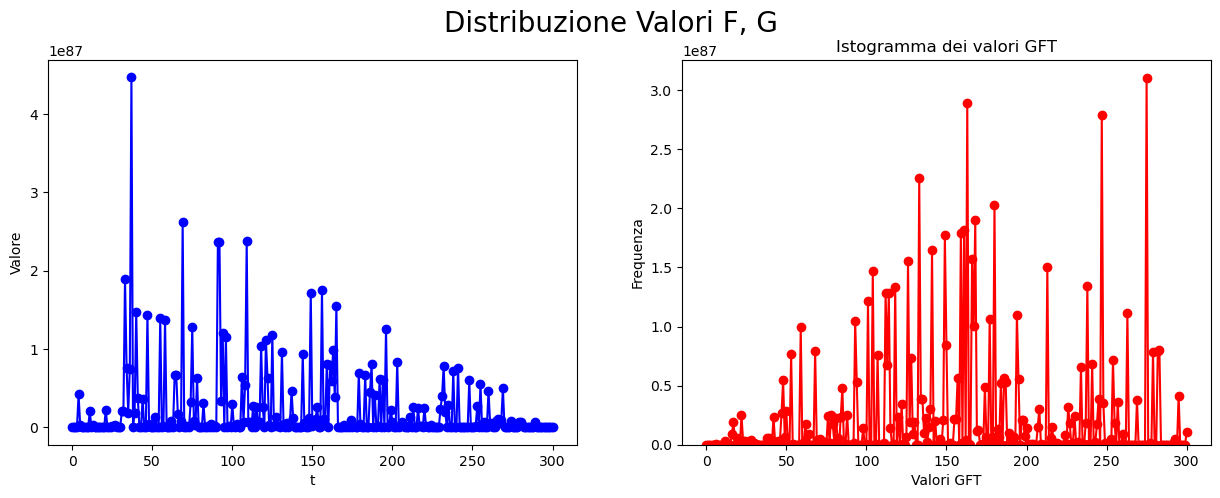

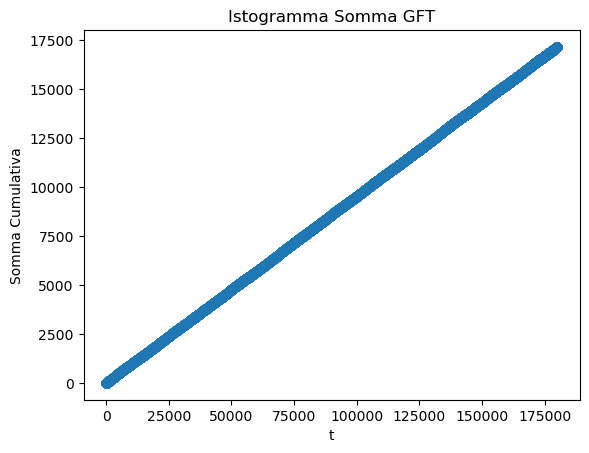

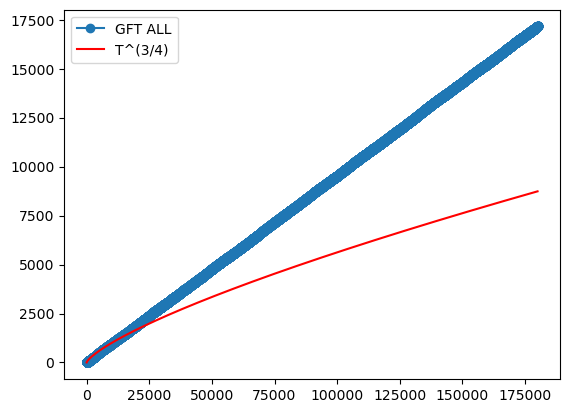

I_STAR:  124
P_STAR:  0.4119601328903654


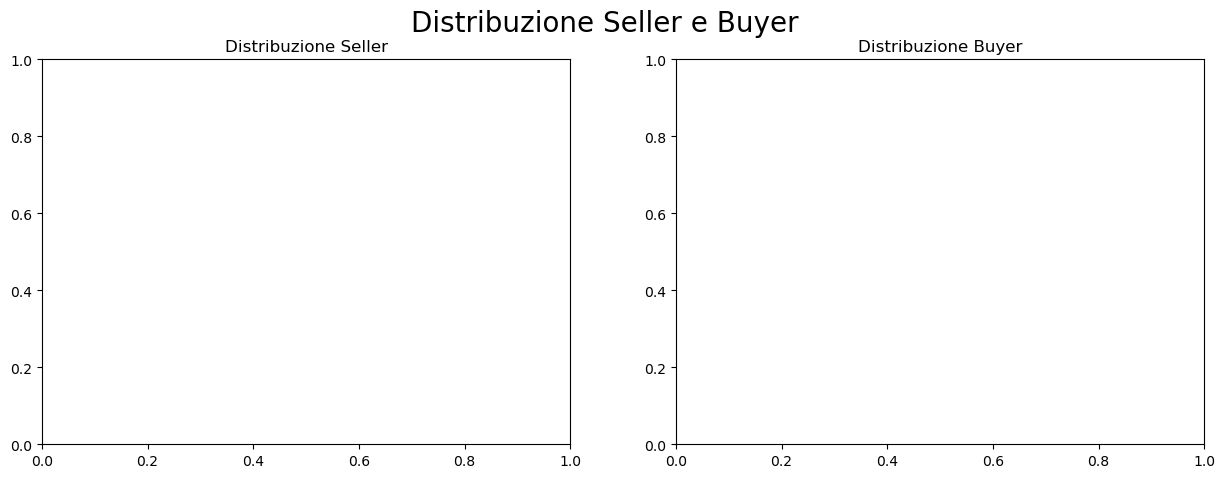

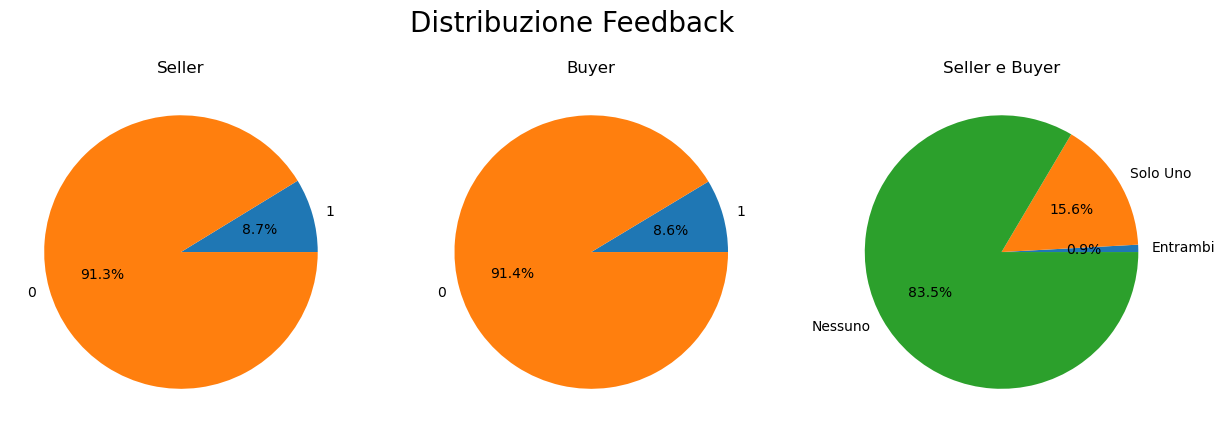

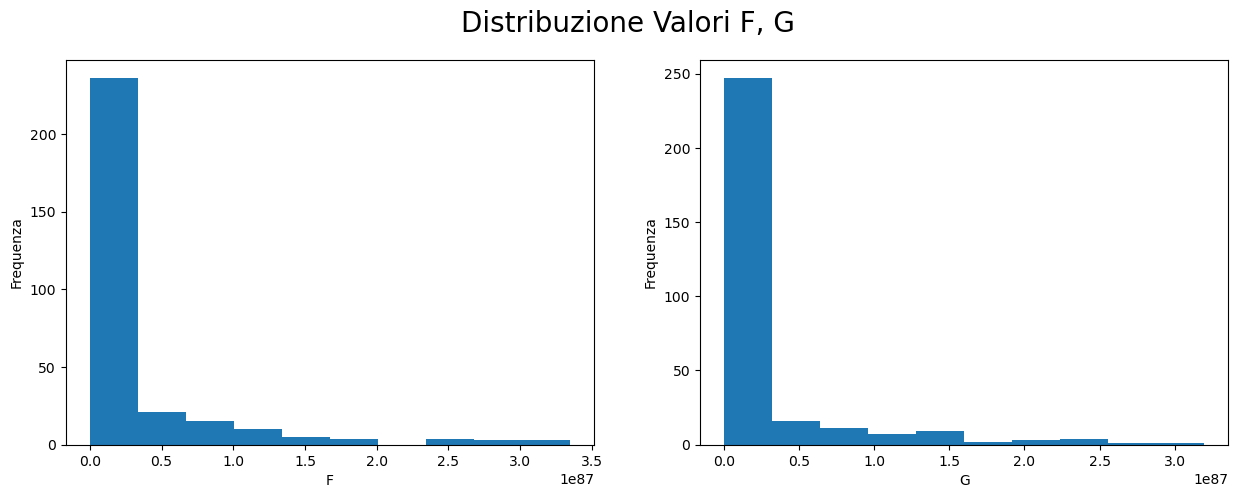

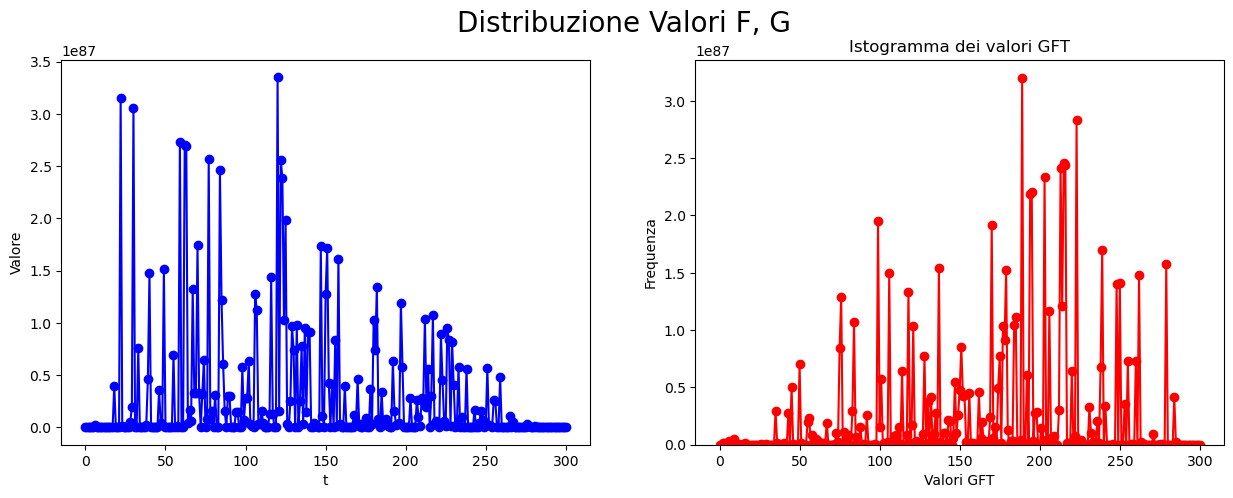

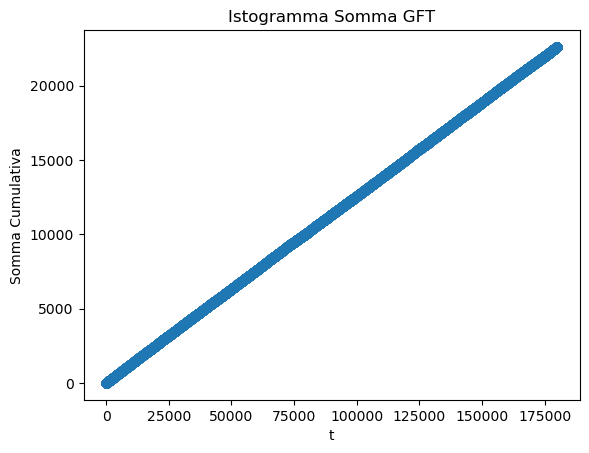

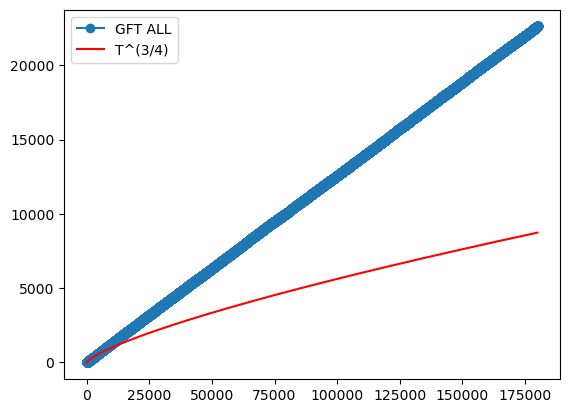

I_STAR:  97
P_STAR:  0.3222591362126246


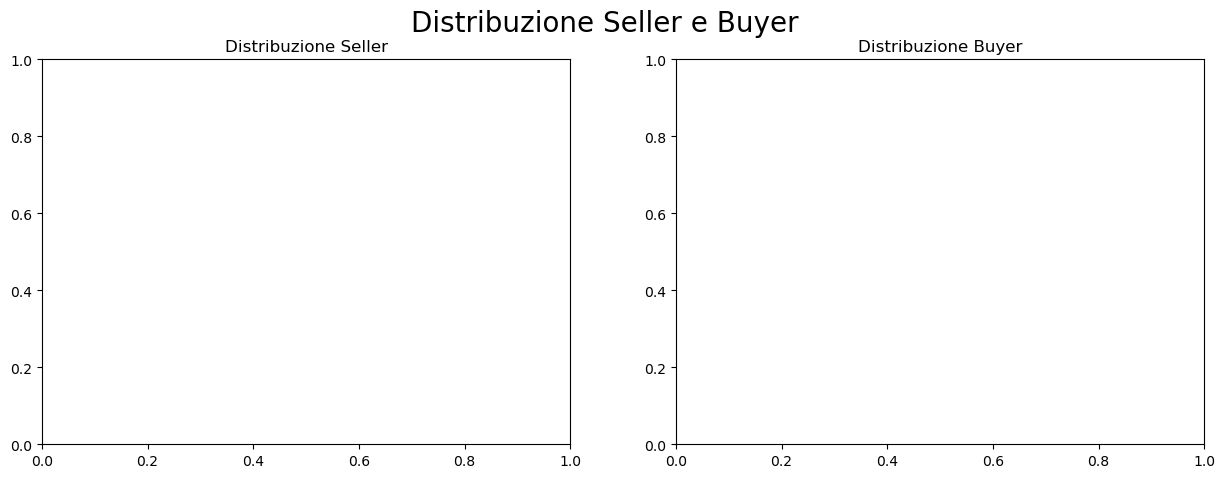

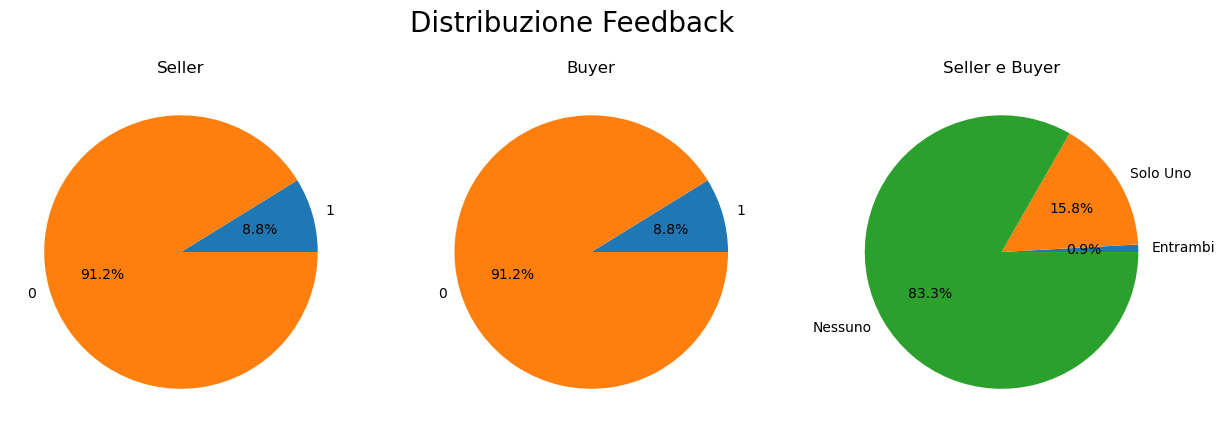

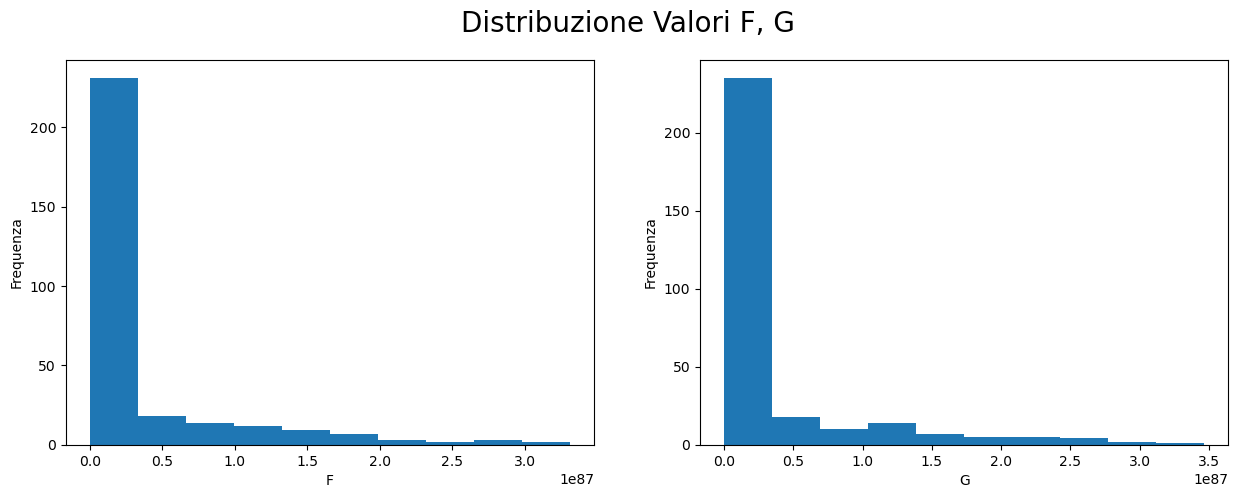

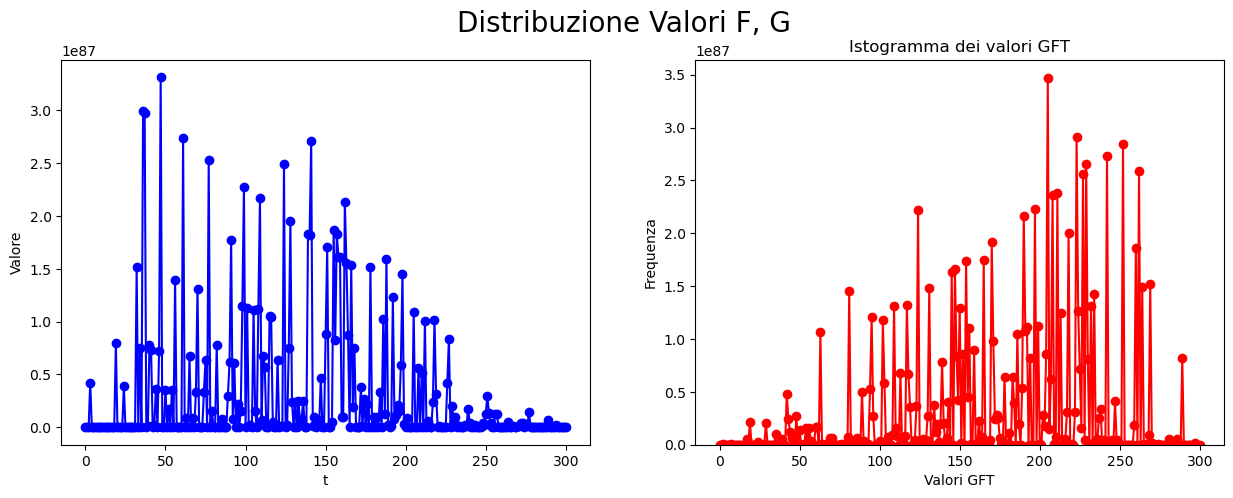

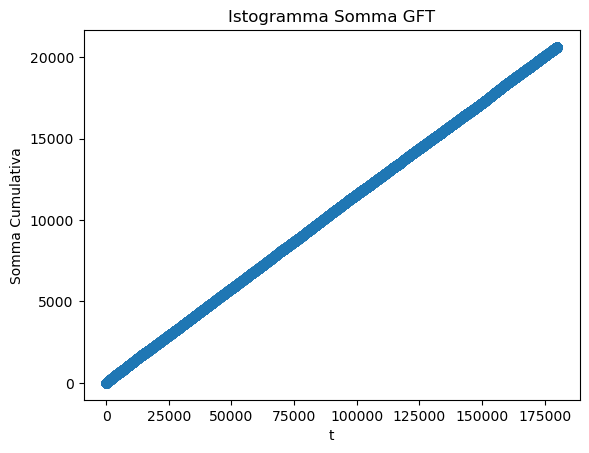

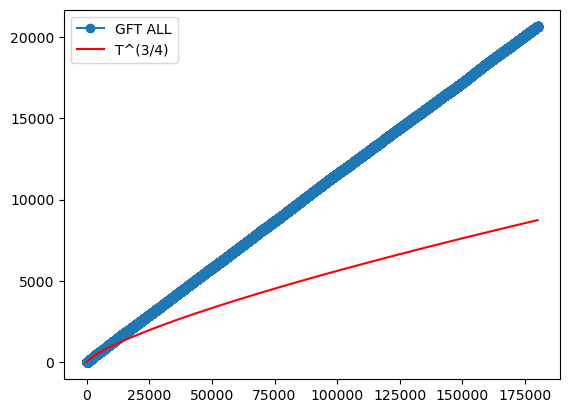

I_STAR:  242
P_STAR:  0.8039867109634552


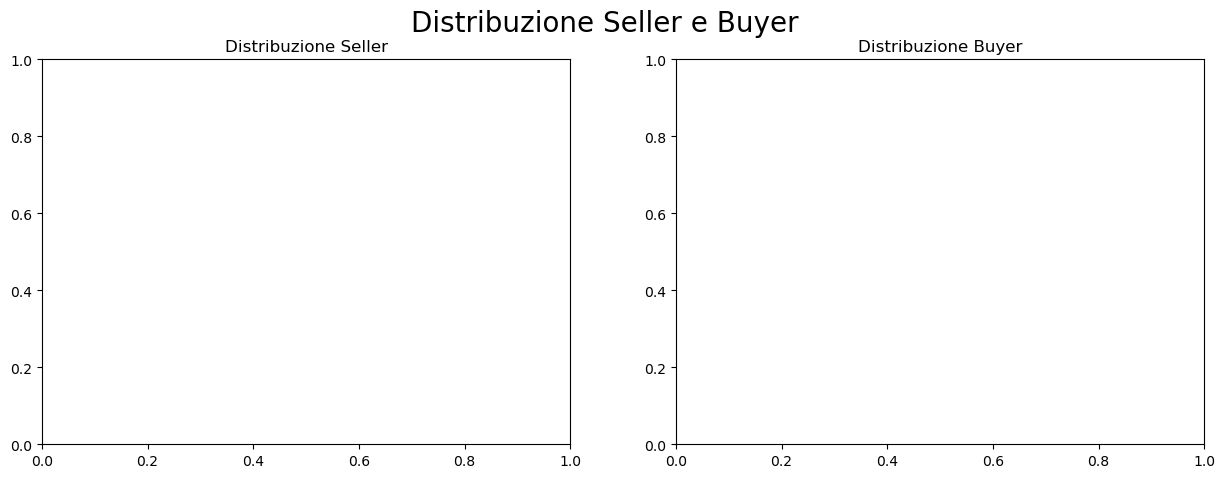

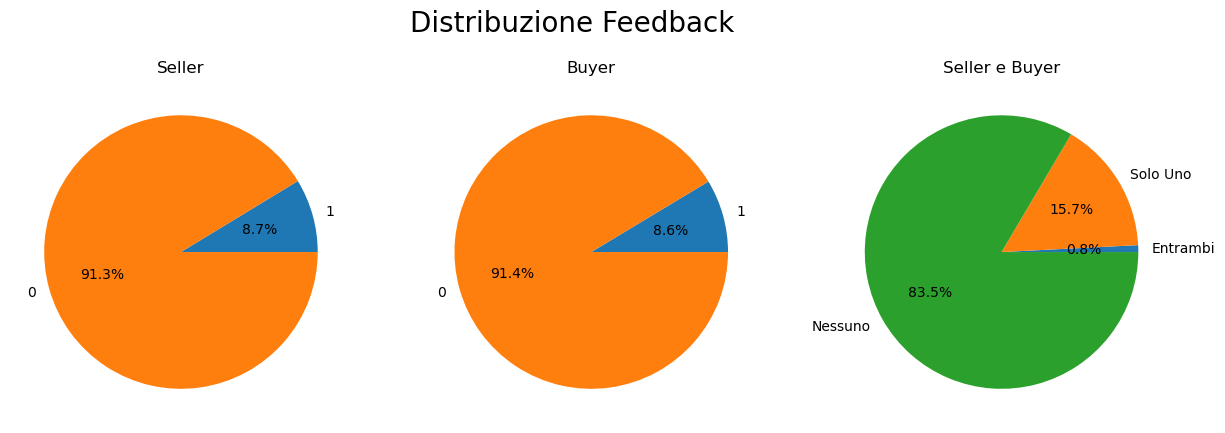

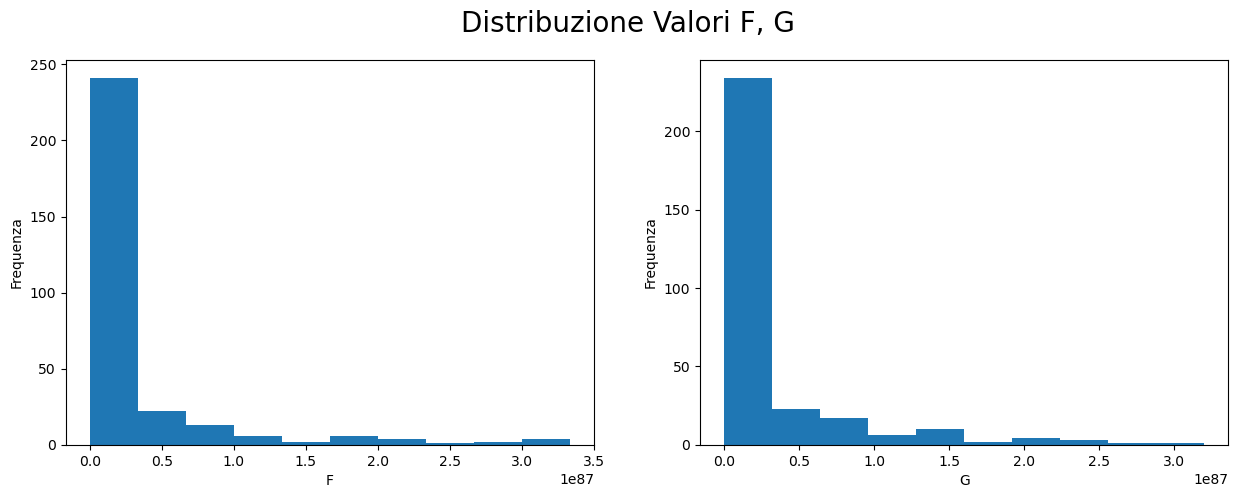

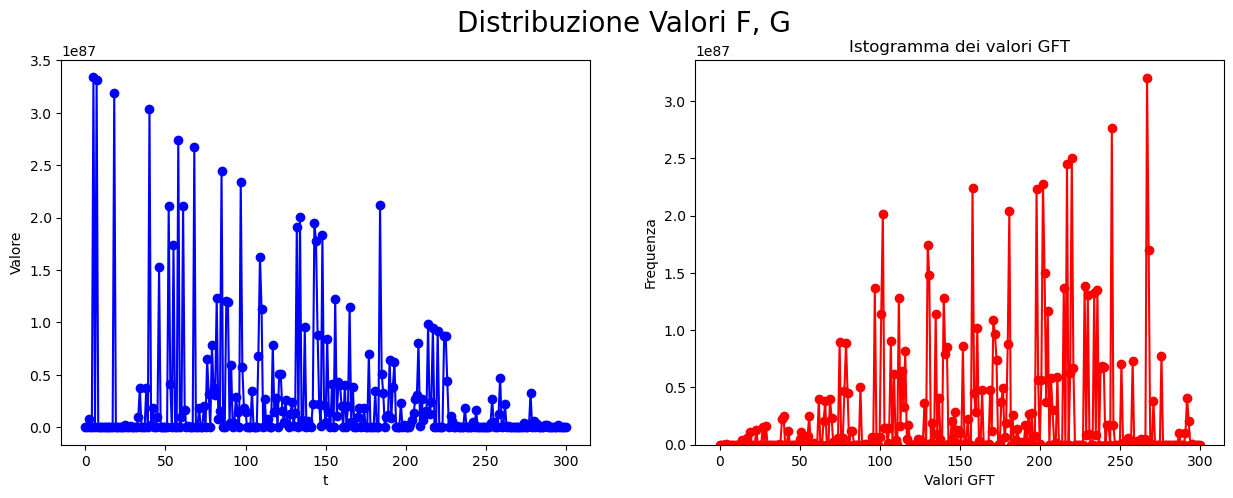

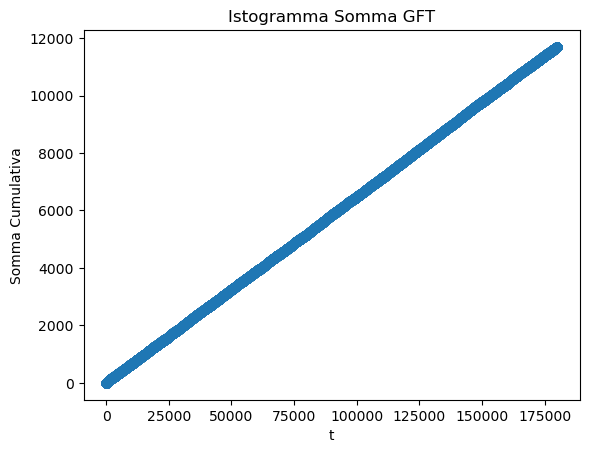

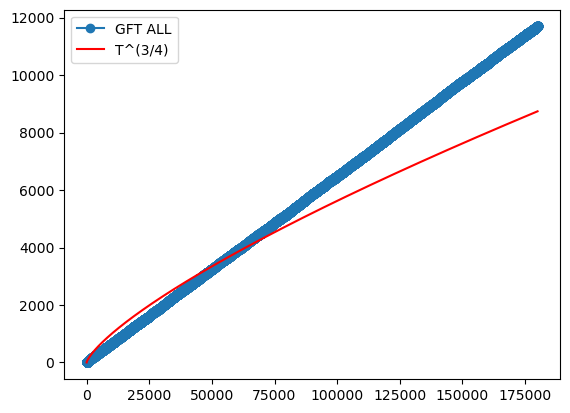

I_STAR:  209
P_STAR:  0.6943521594684385


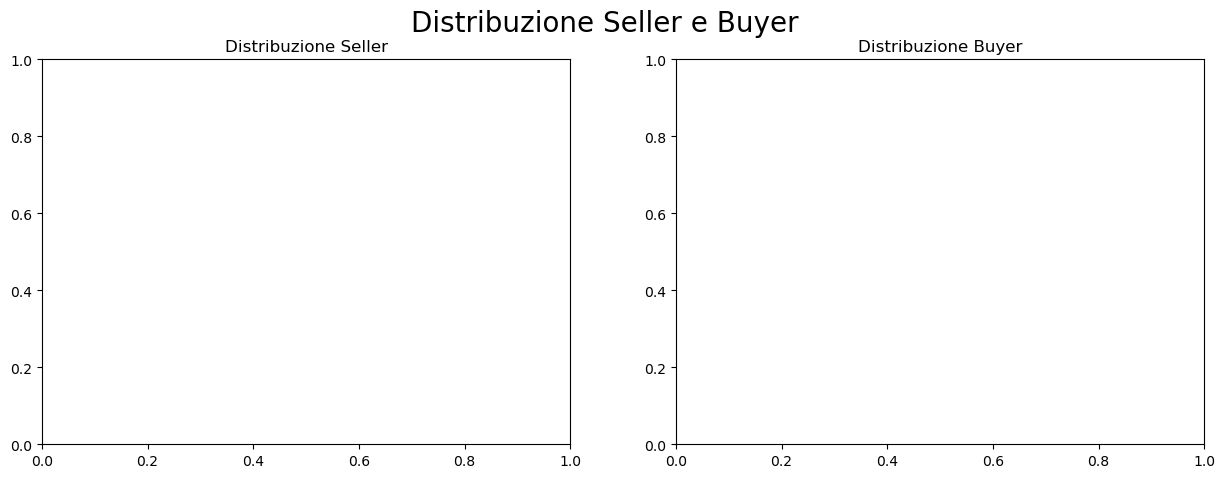

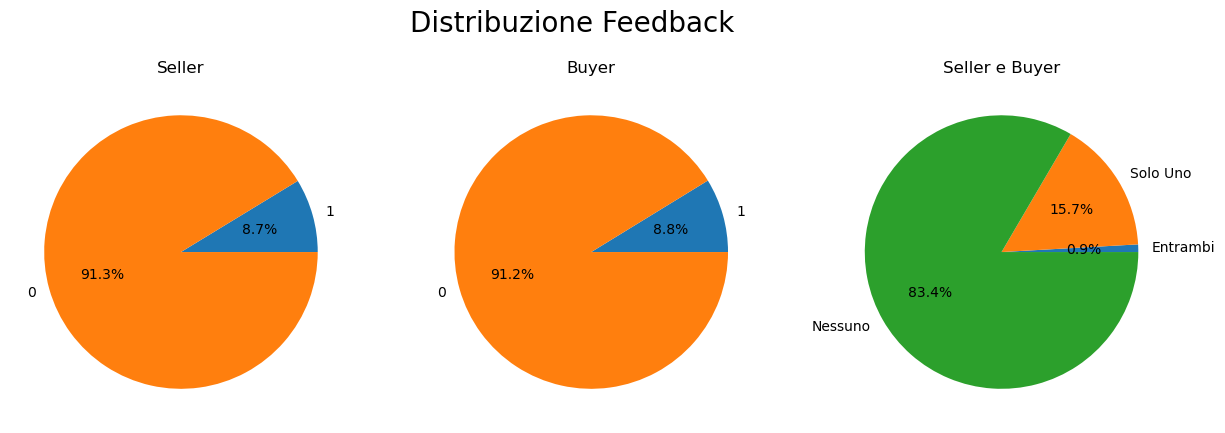

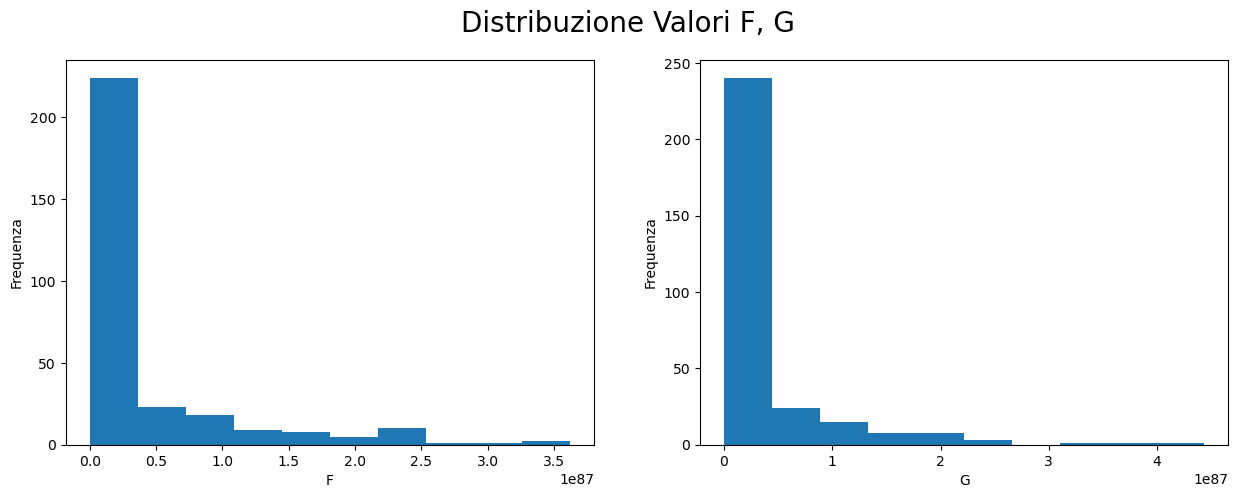

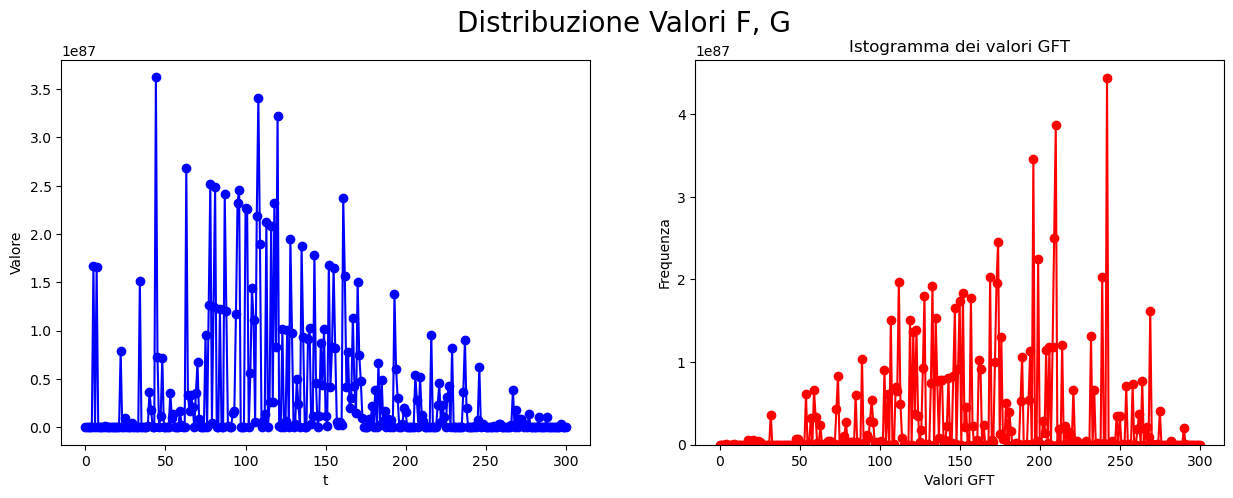

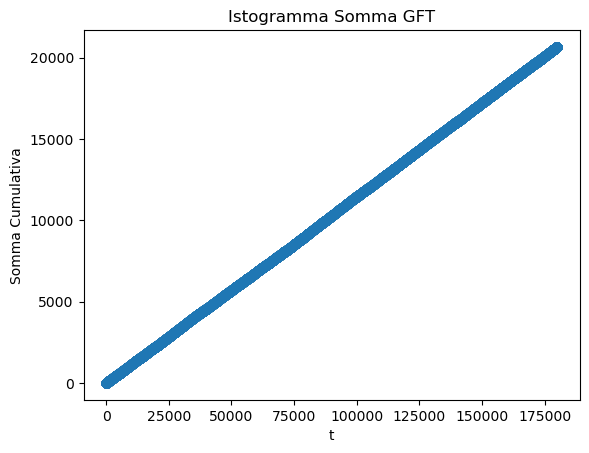

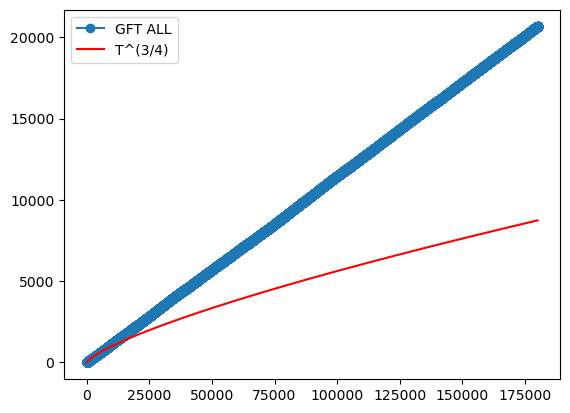

I_STAR:  190
P_STAR:  0.6312292358803987


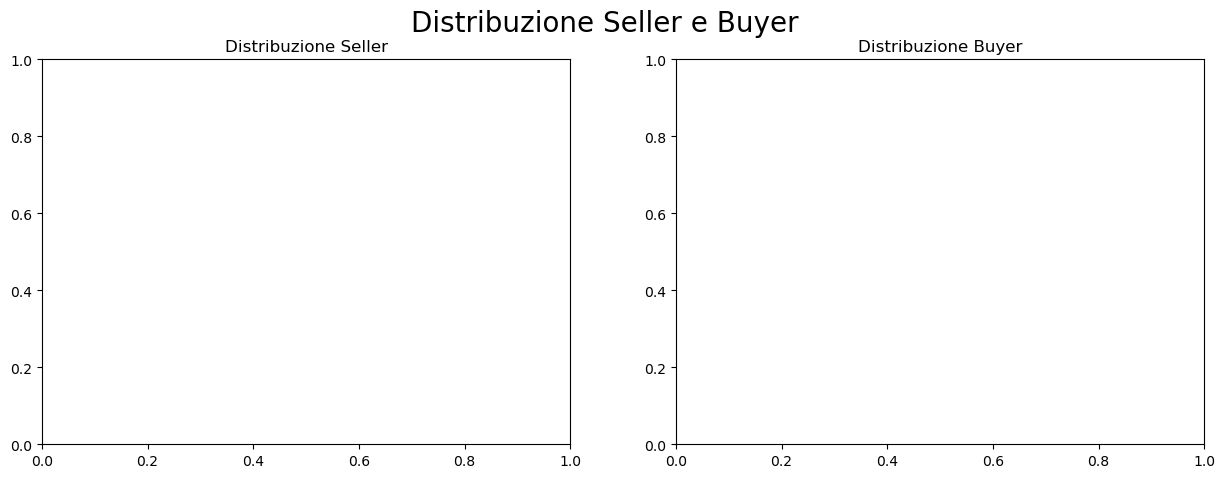

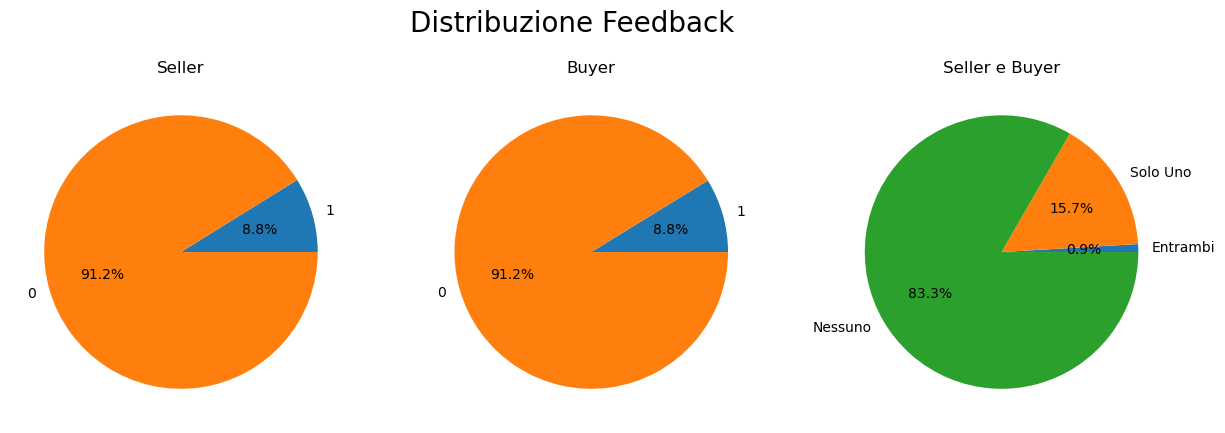

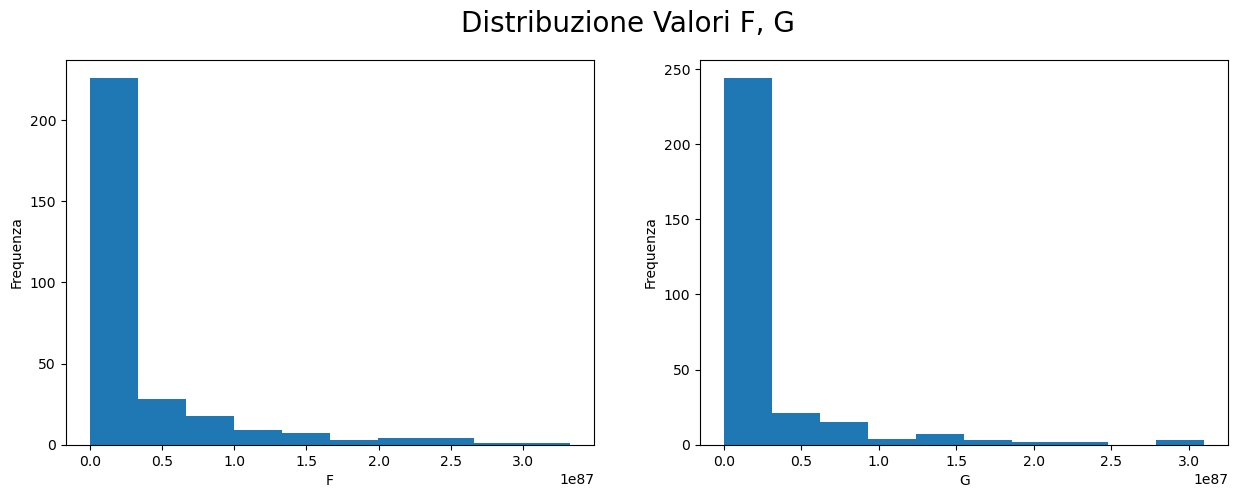

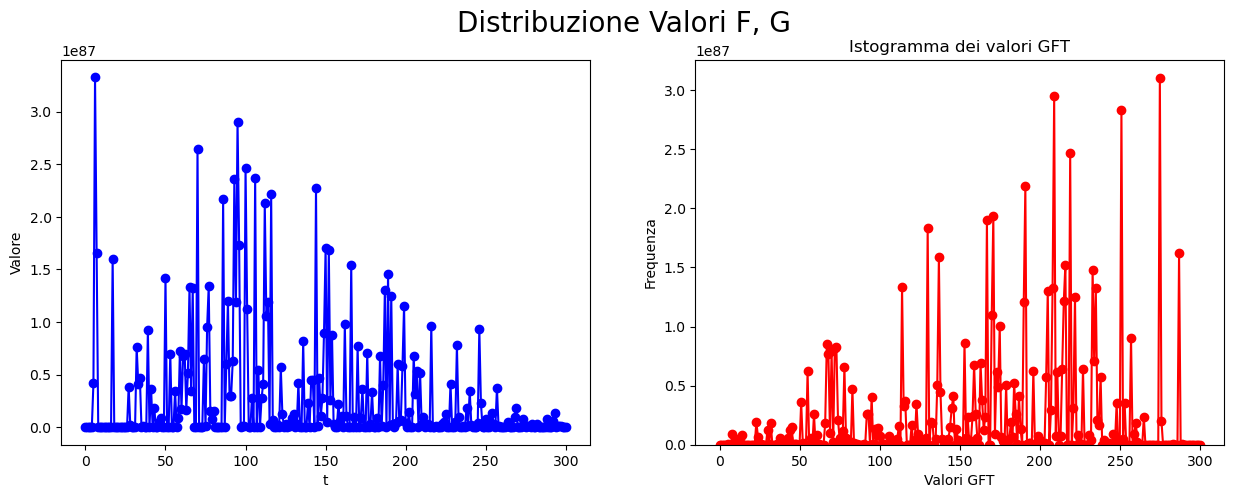

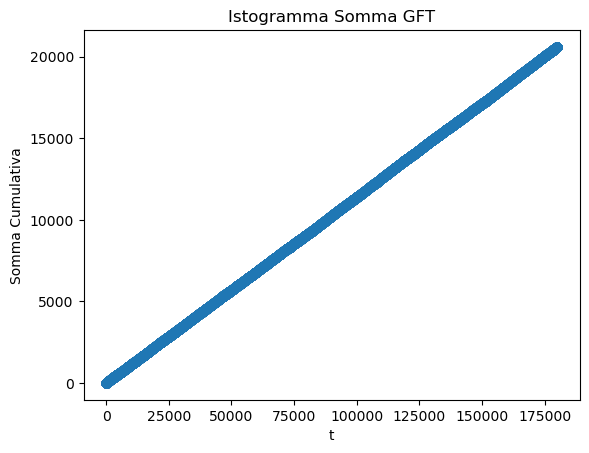

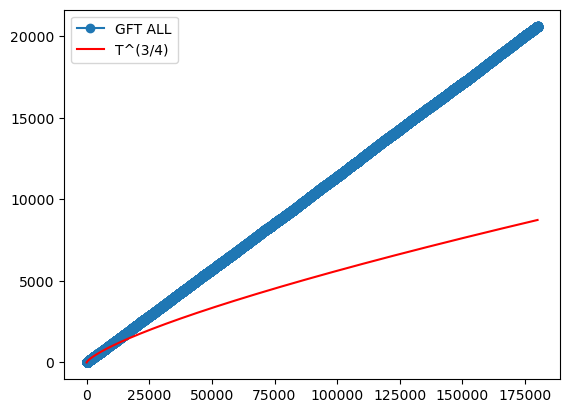

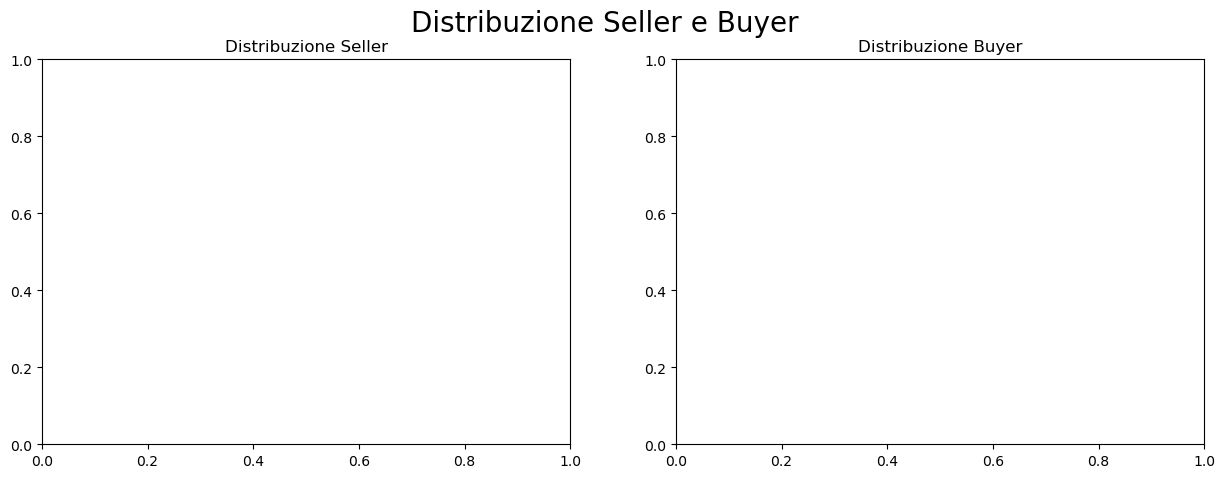

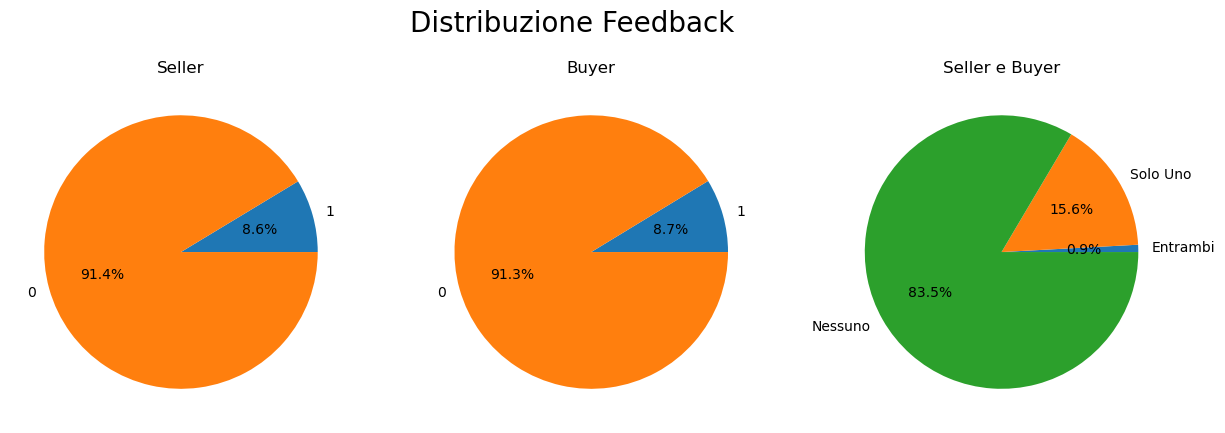

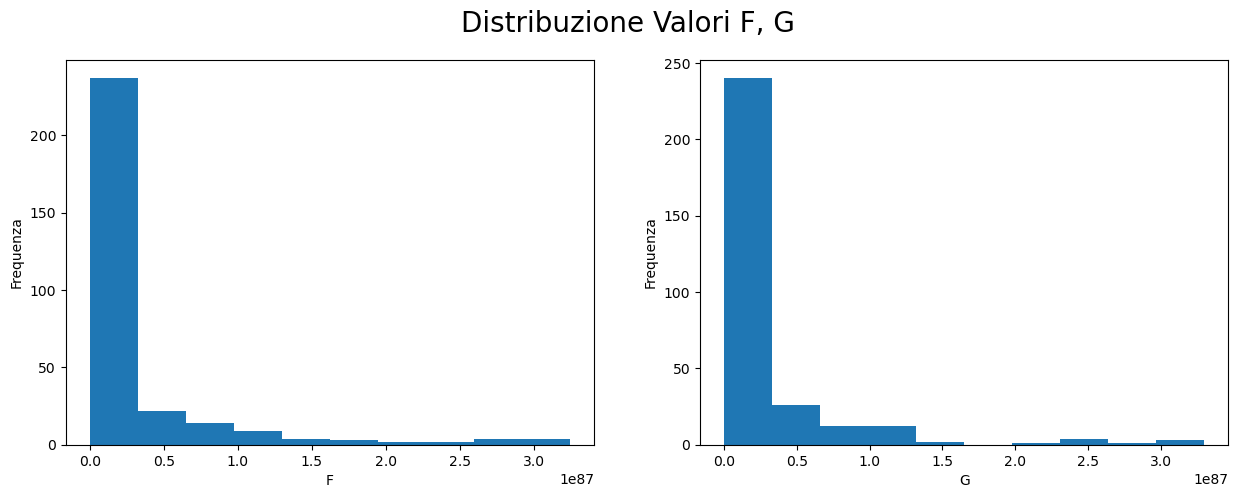

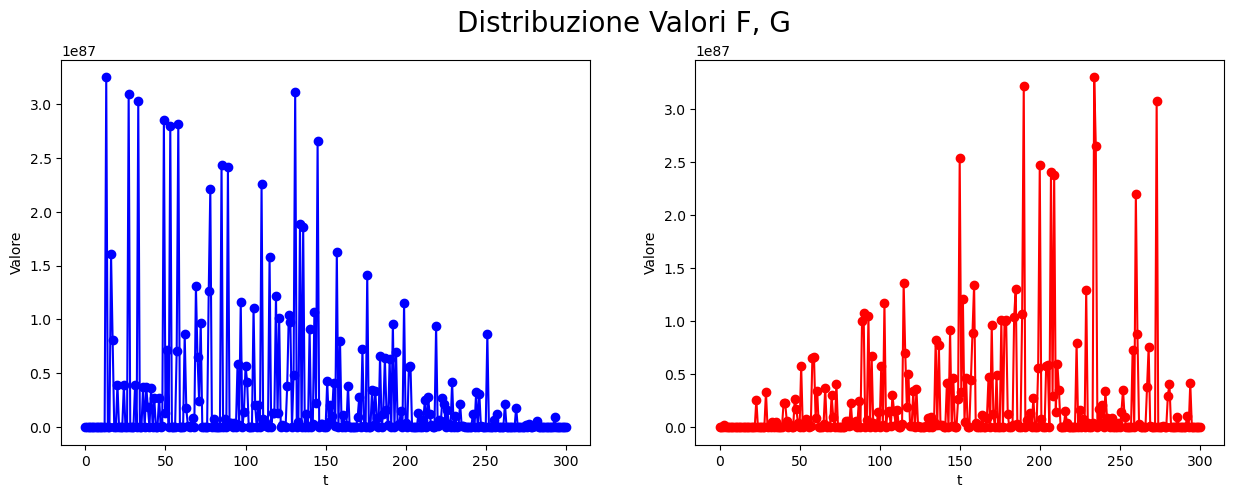

In [20]:
for i in range(n):
    gft_all = execute_algo(T_0, K,num_cifre,1)
    final_gft_results.append(gft_all)

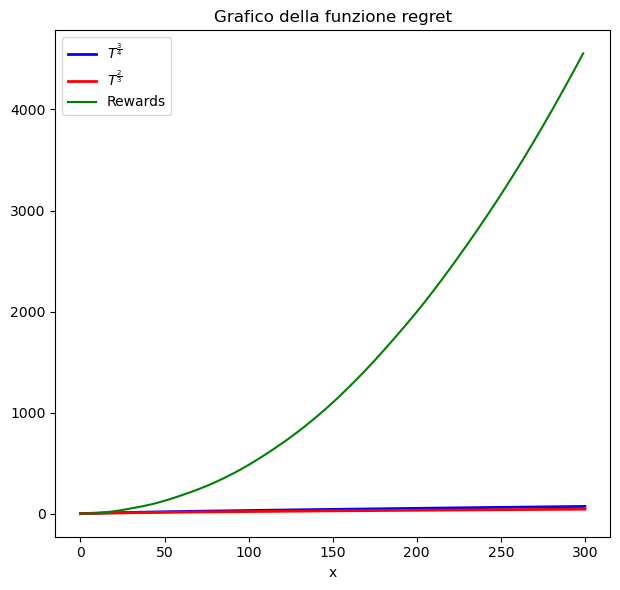

In [21]:
rewards = get_median_rewards(final_gft_results,K,n)
graph_rewards(rewards, K)

## BETA

I_STAR:  235
P_STAR:  0.7807308970099668


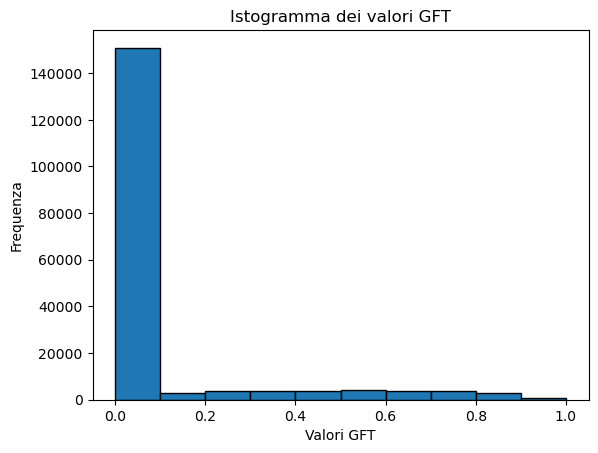

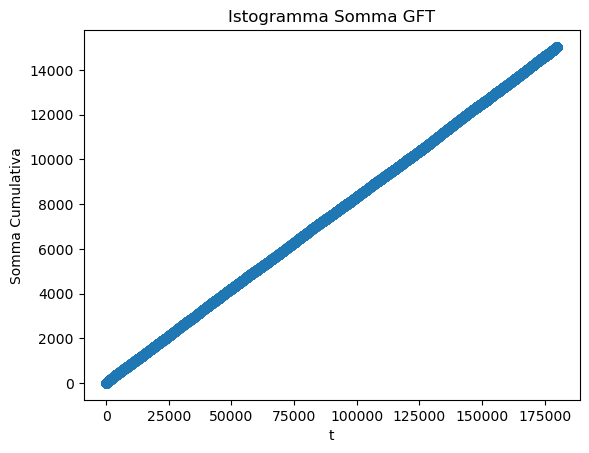

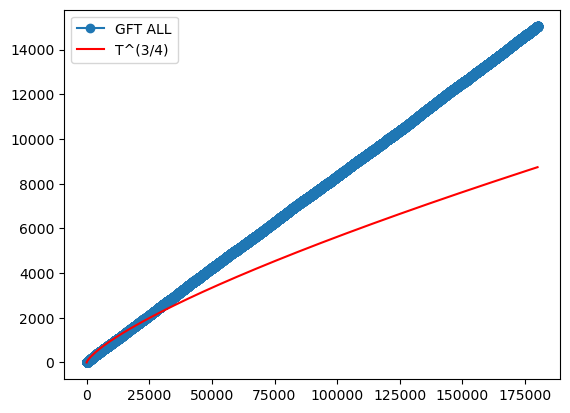

I_STAR:  204
P_STAR:  0.6777408637873754


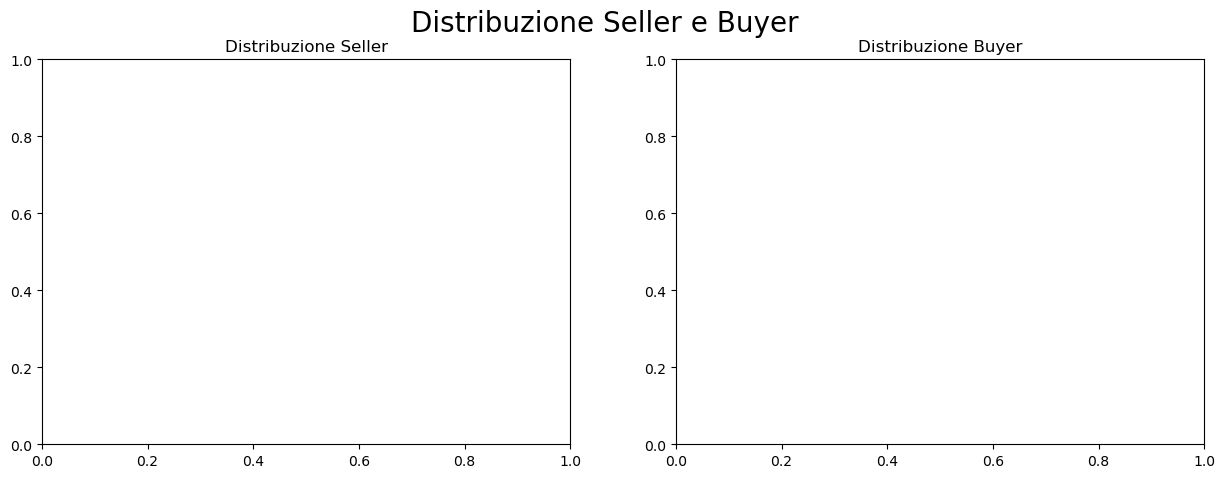

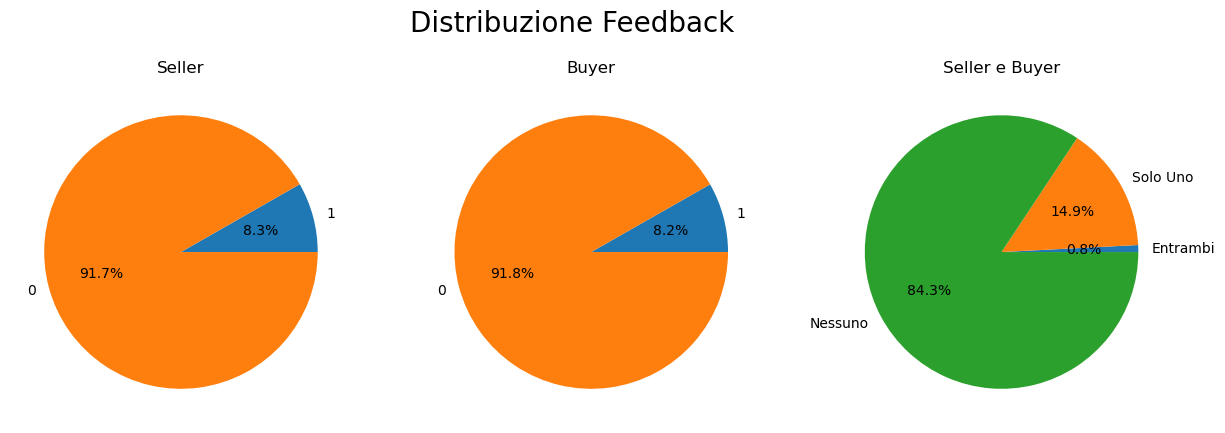

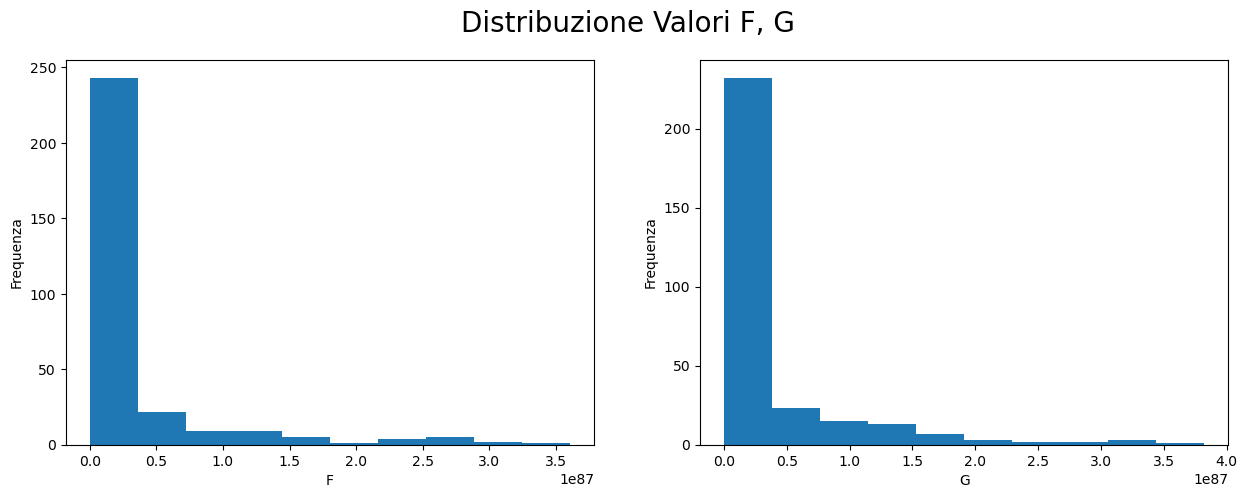

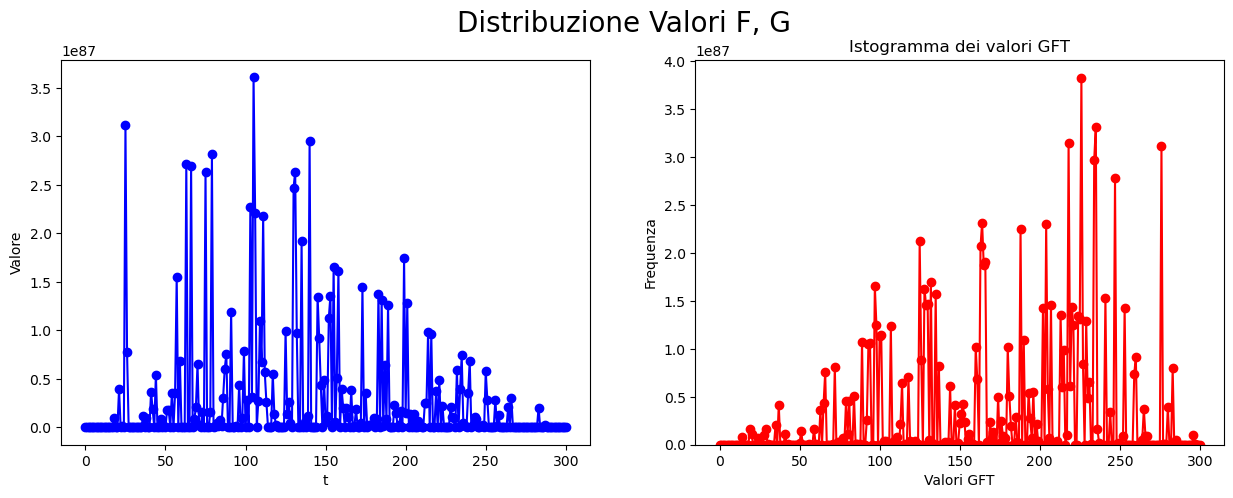

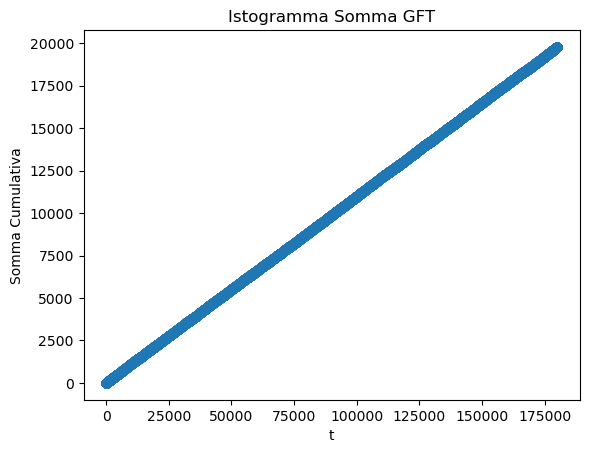

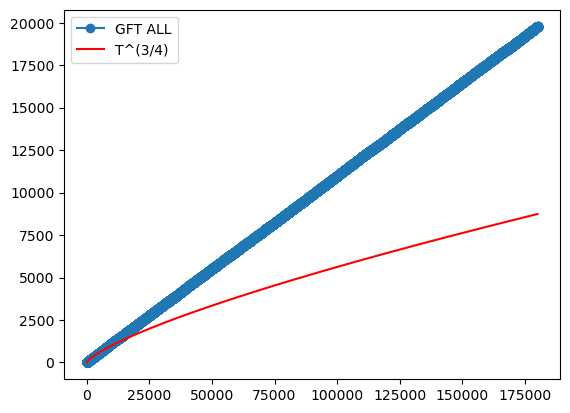

I_STAR:  111
P_STAR:  0.3687707641196013


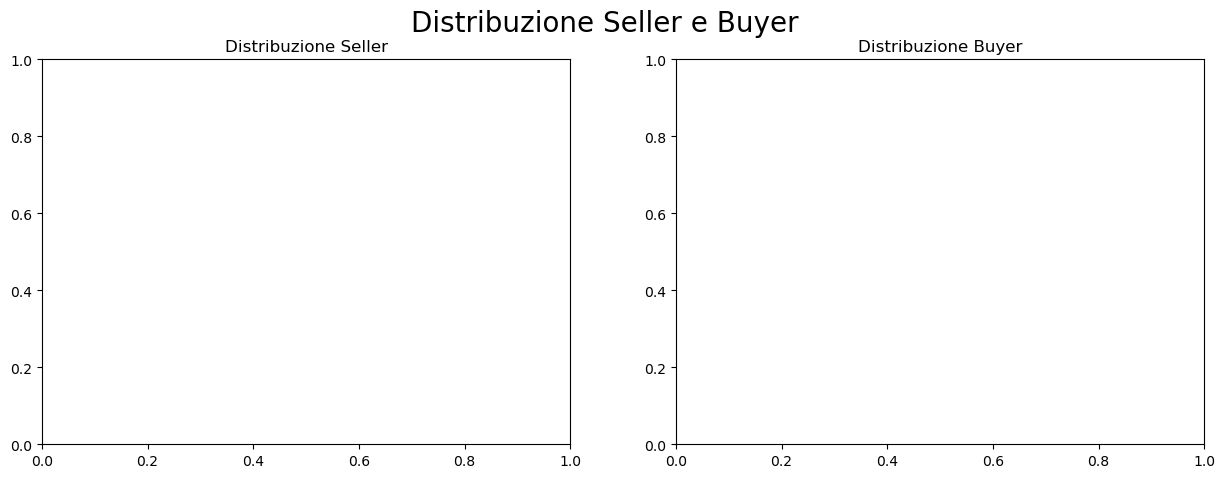

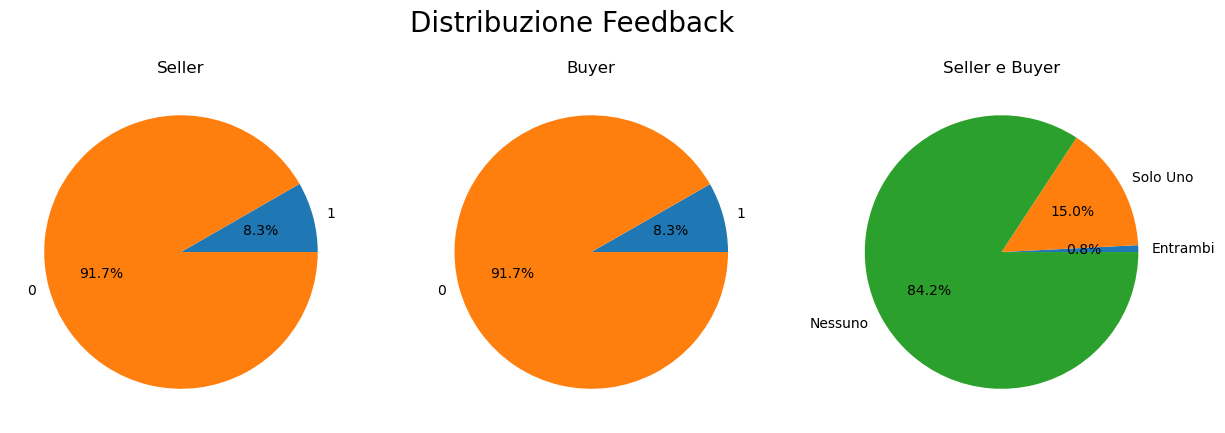

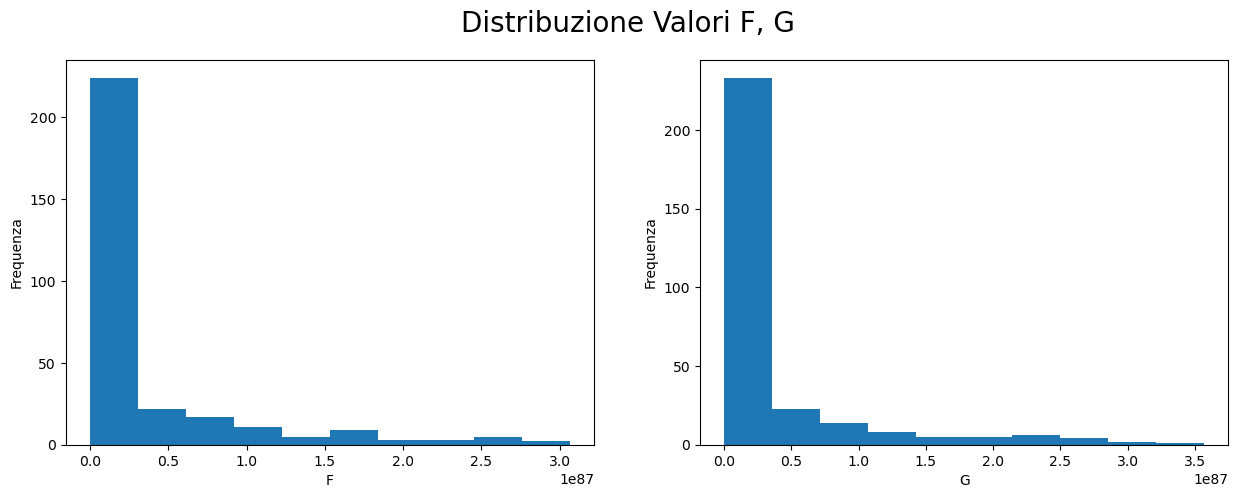

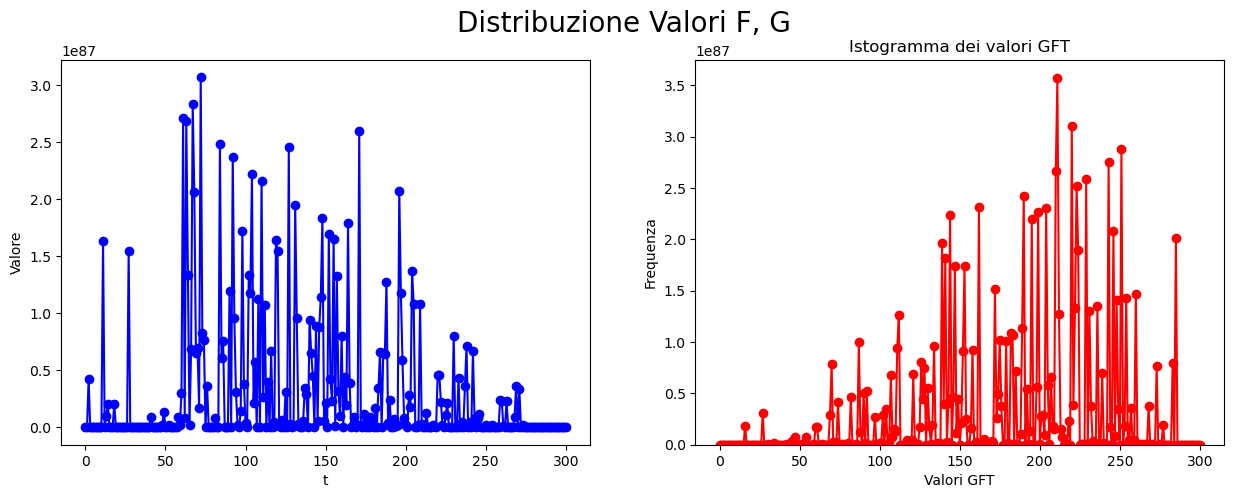

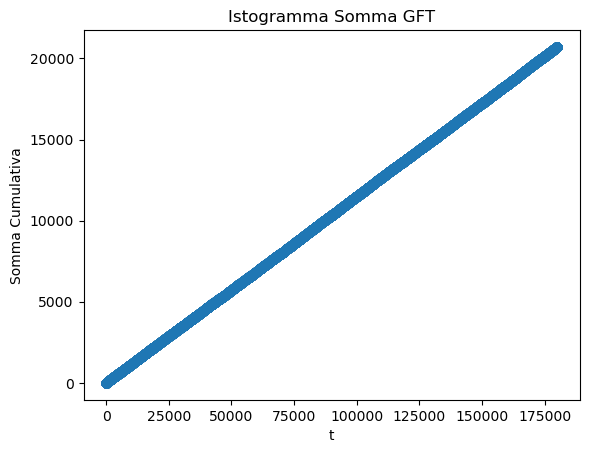

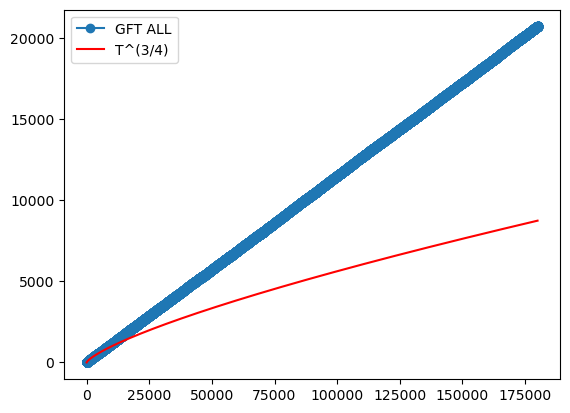

I_STAR:  283
P_STAR:  0.9401993355481728


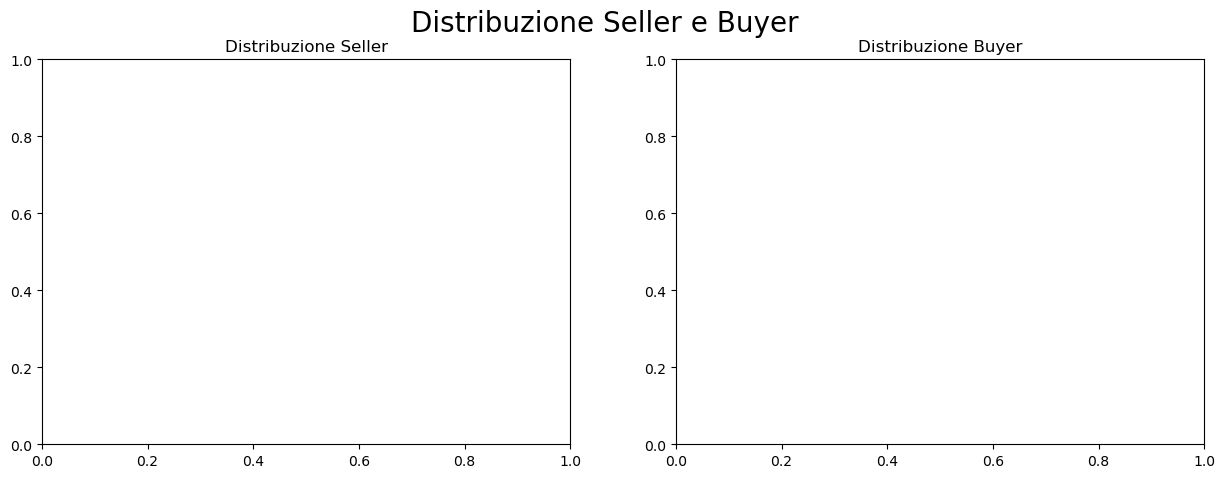

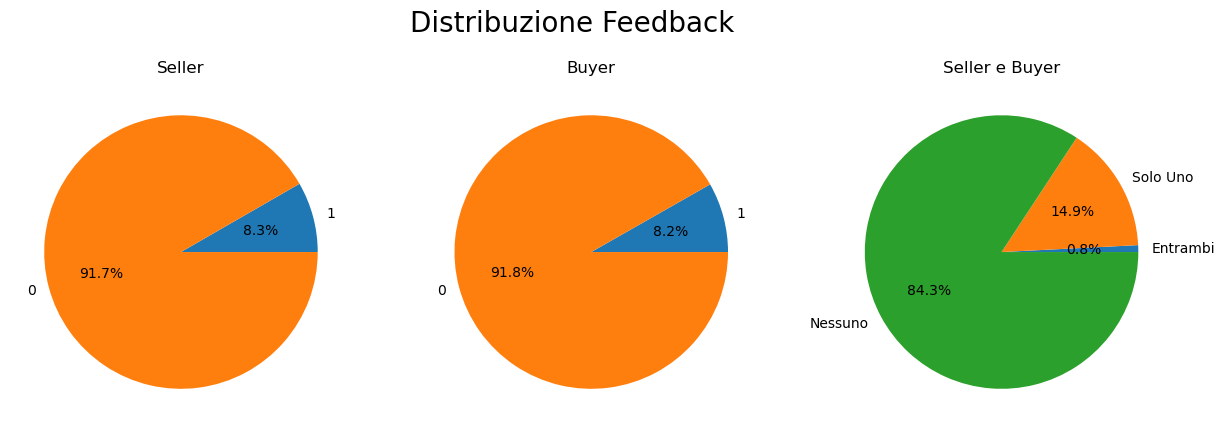

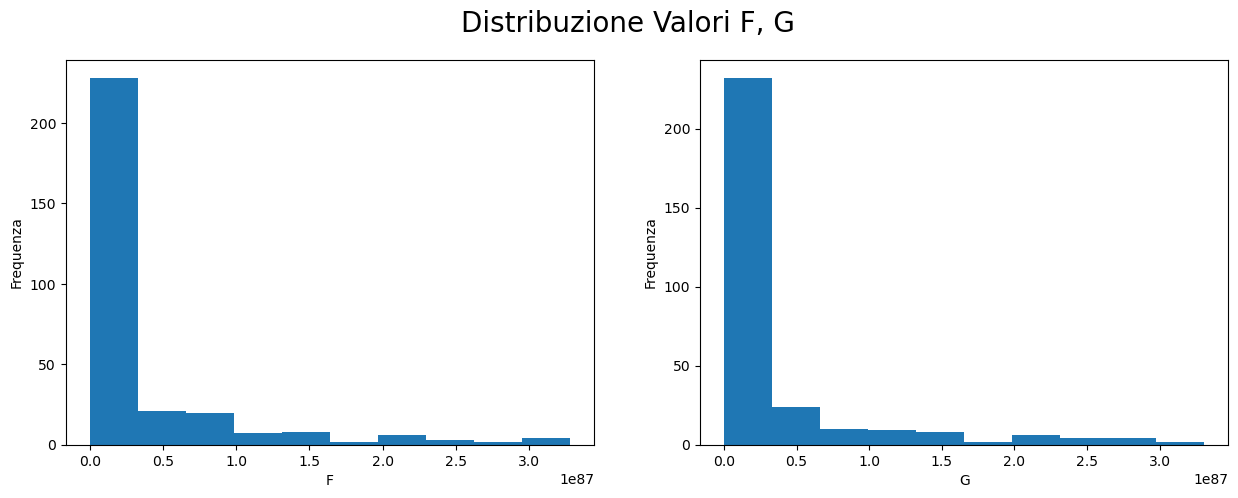

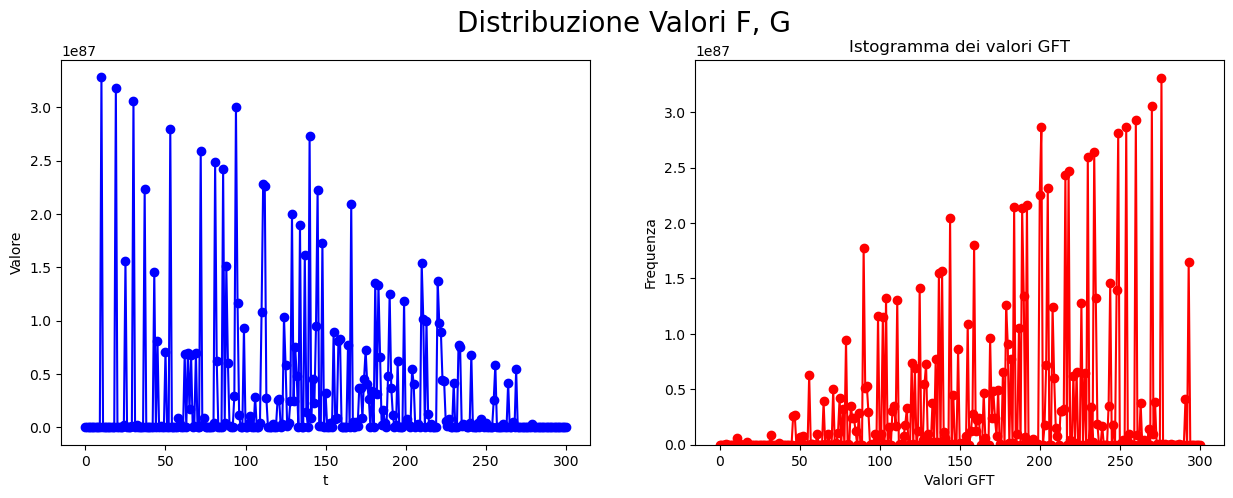

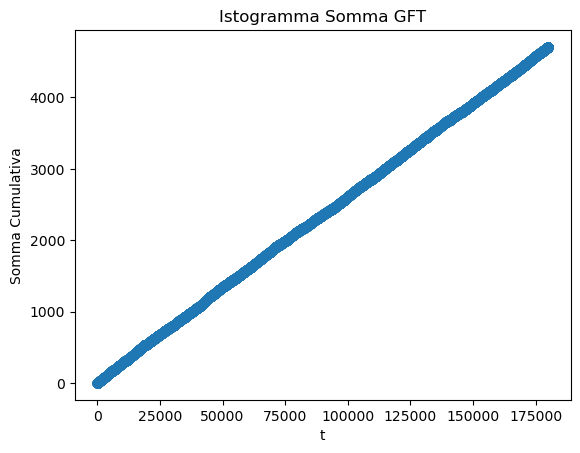

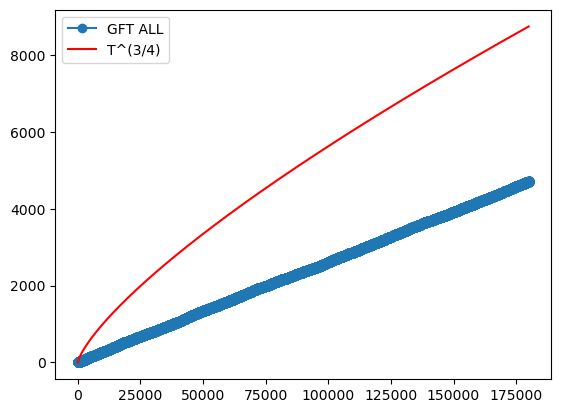

I_STAR:  119
P_STAR:  0.3953488372093023


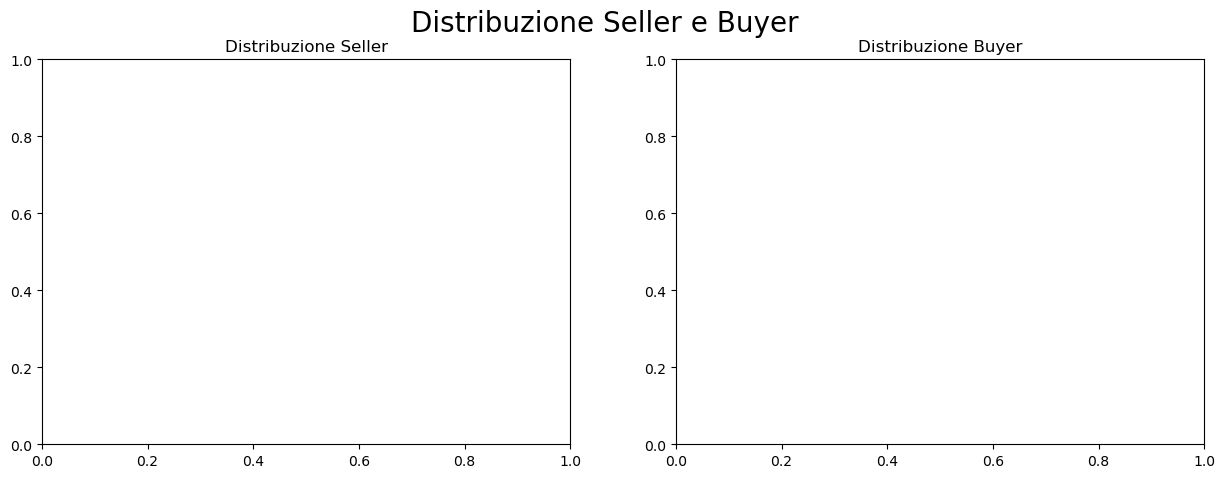

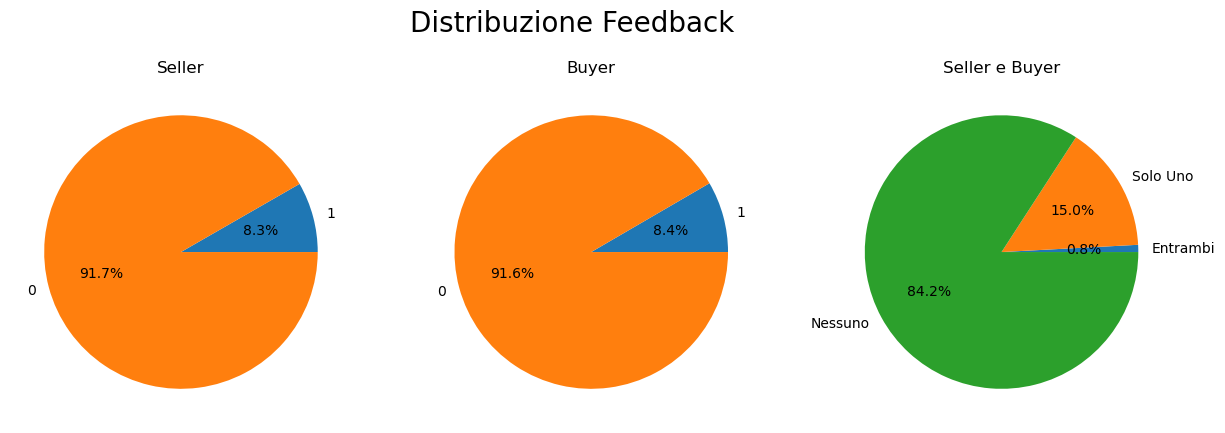

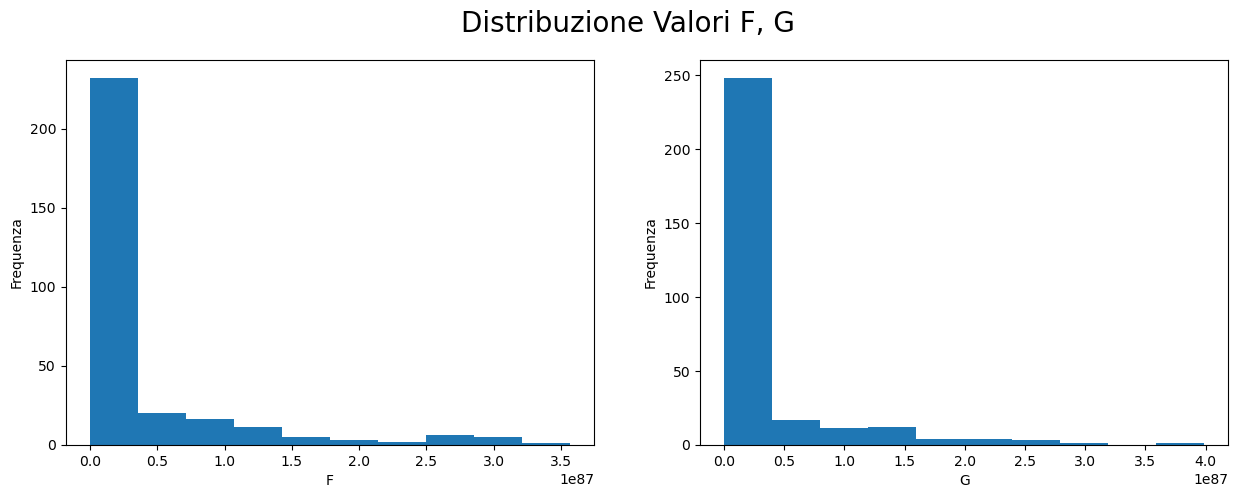

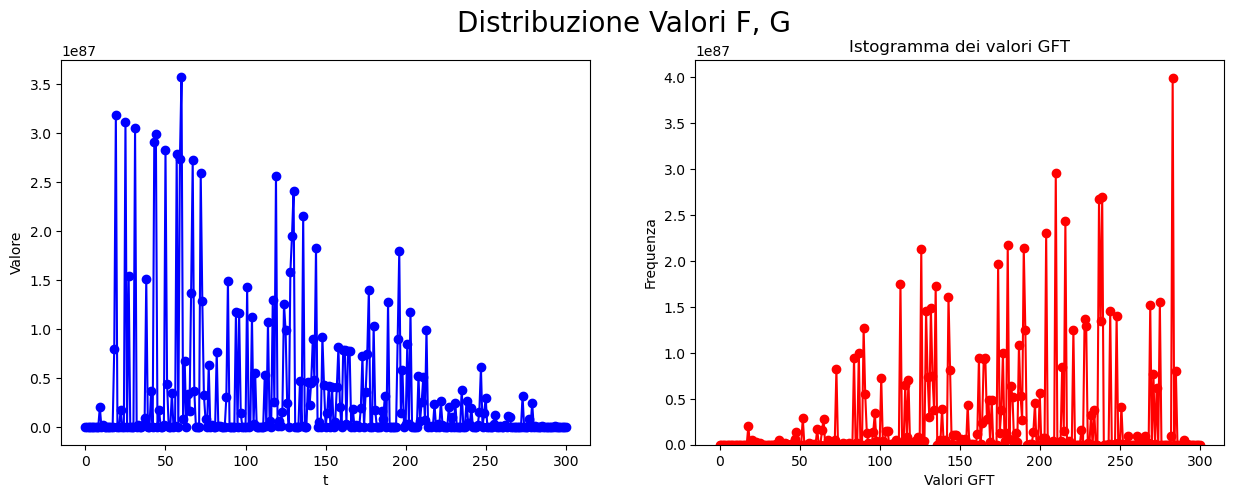

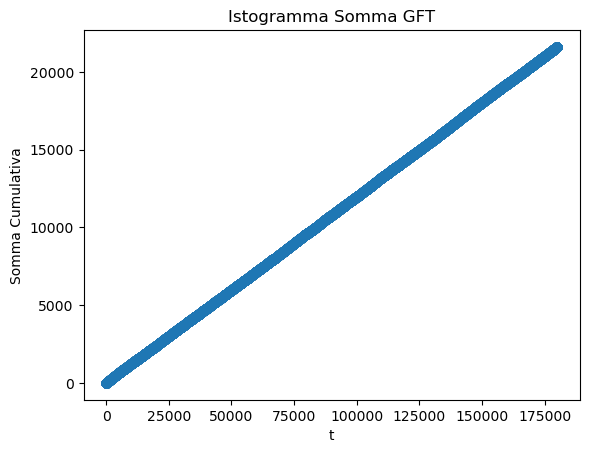

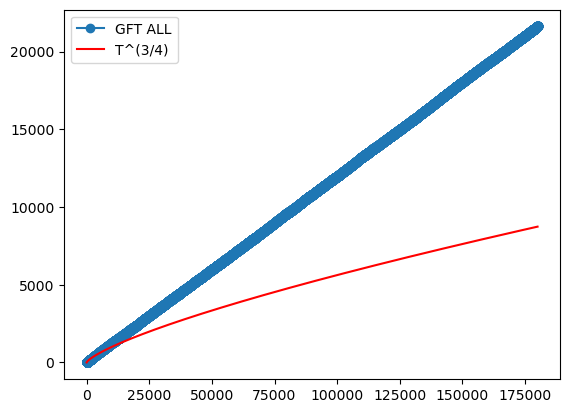

I_STAR:  184
P_STAR:  0.6112956810631229


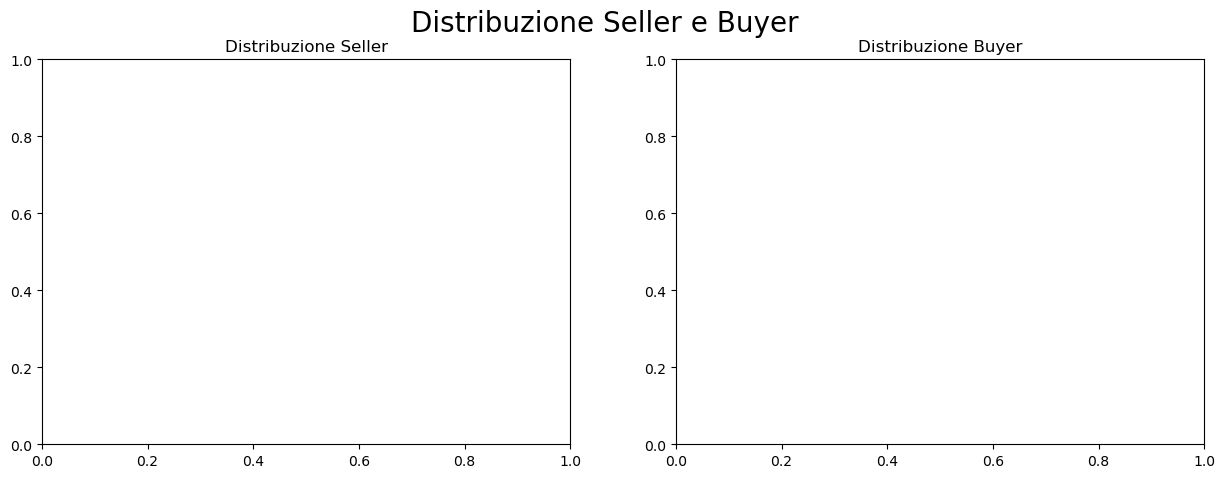

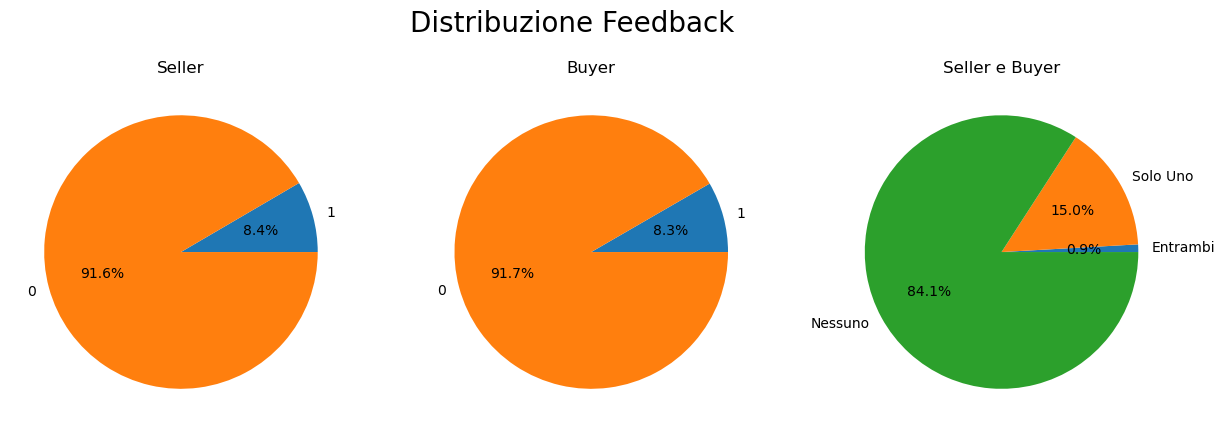

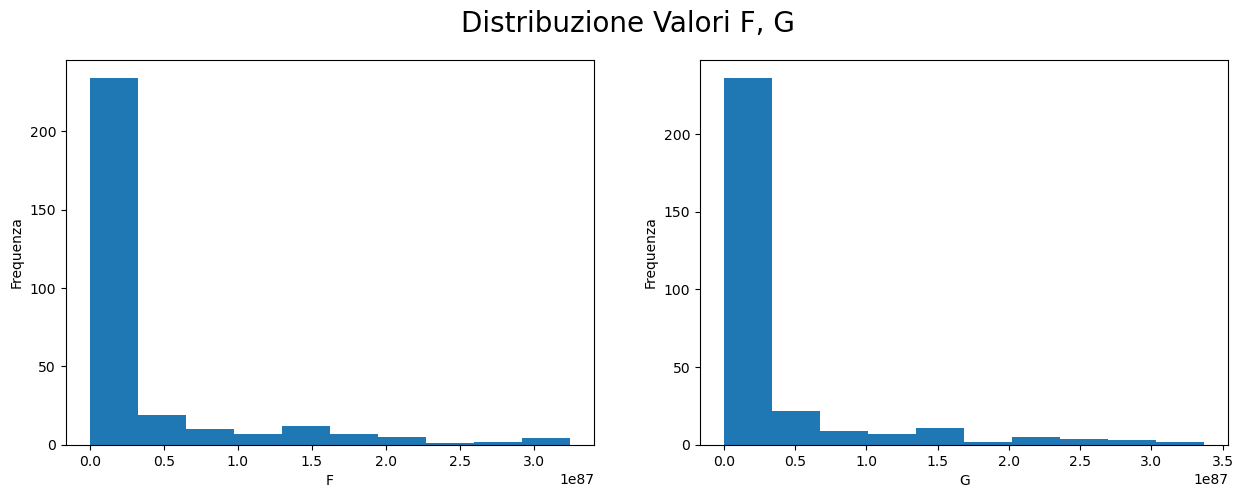

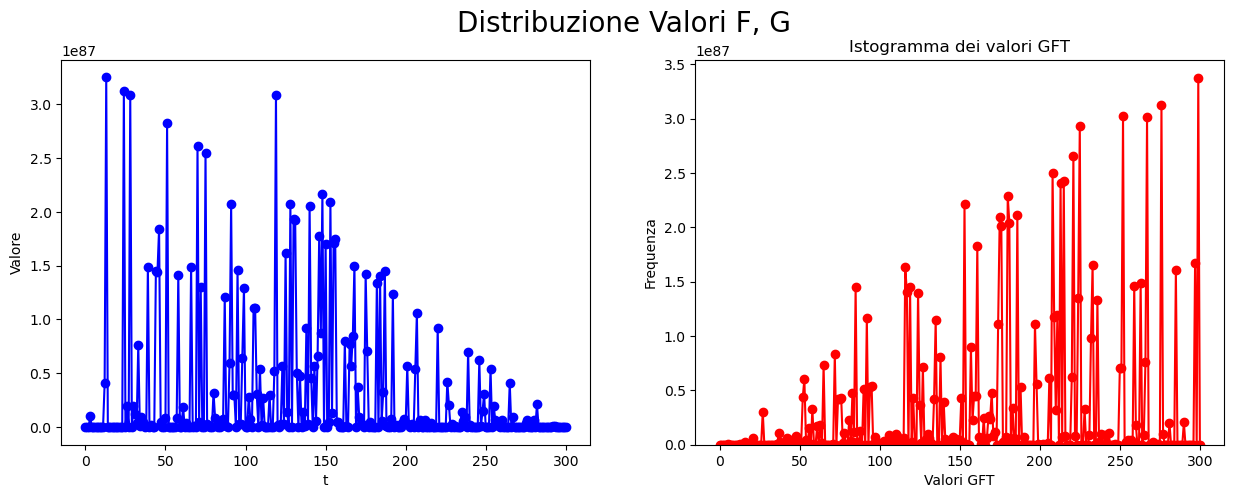

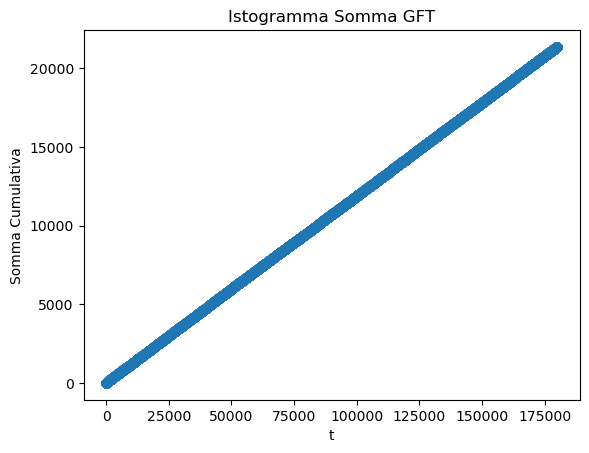

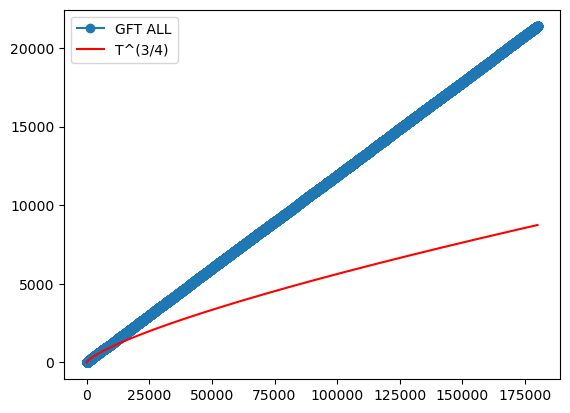

I_STAR:  148
P_STAR:  0.49169435215946844


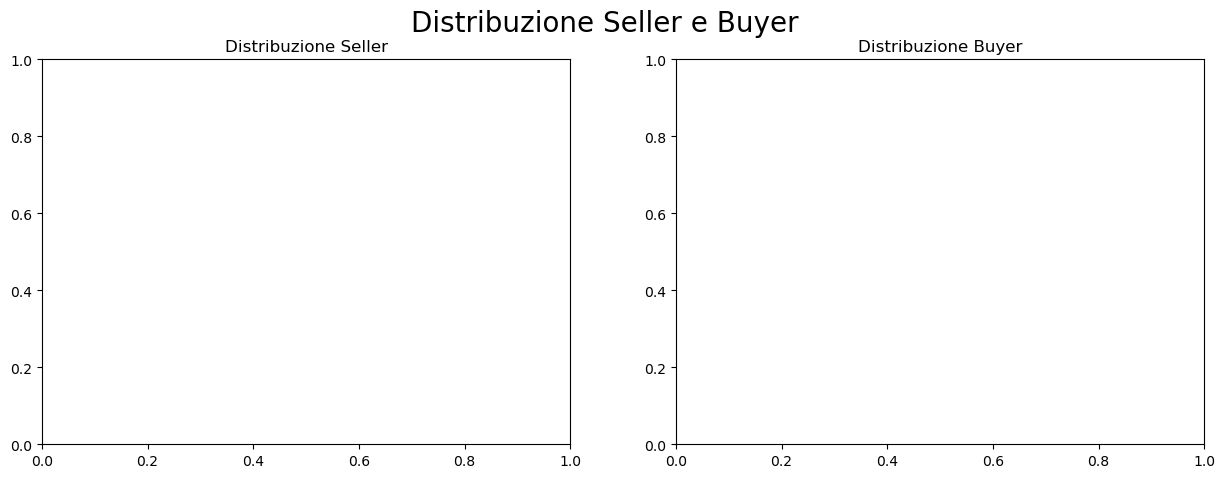

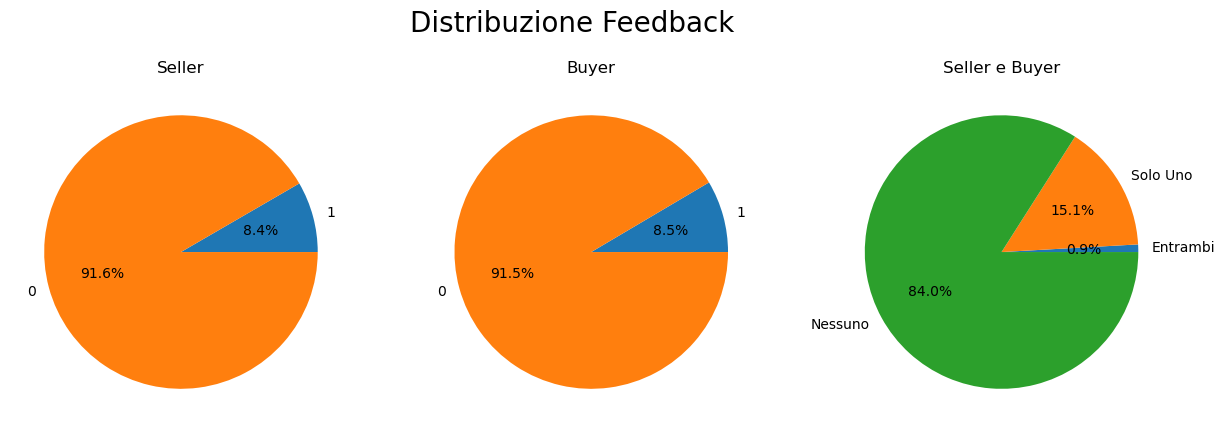

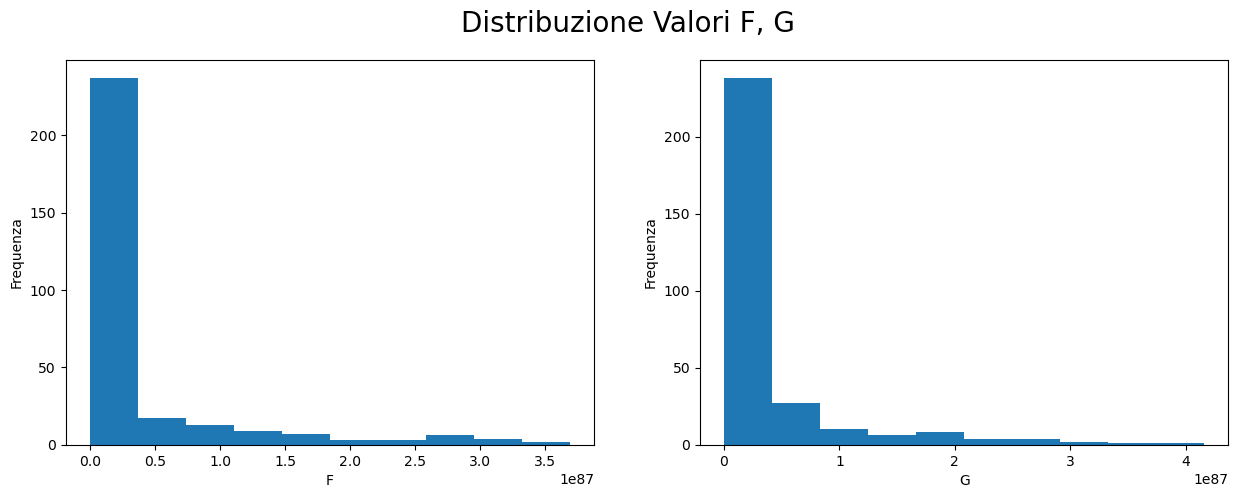

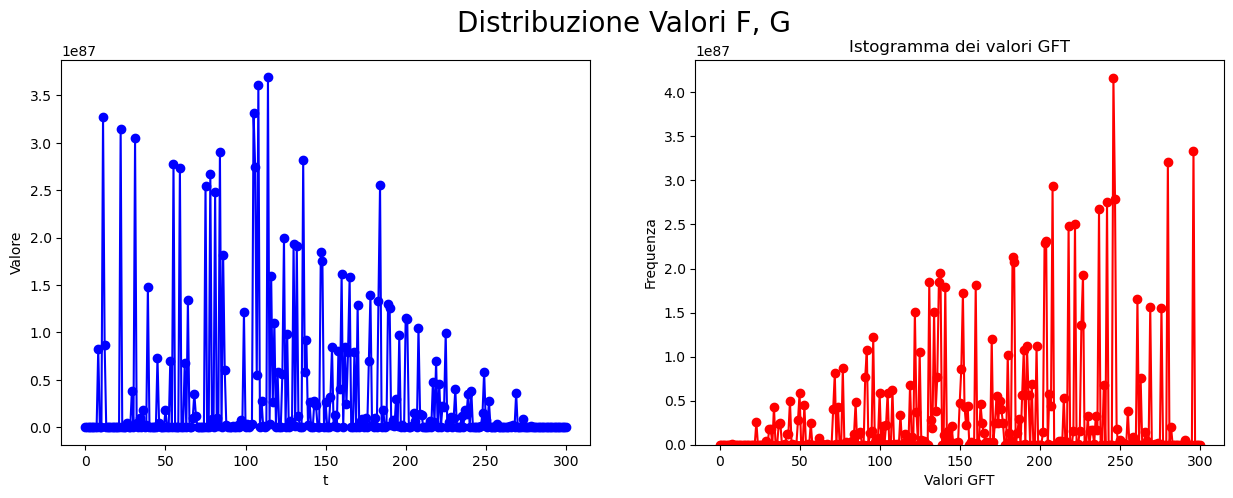

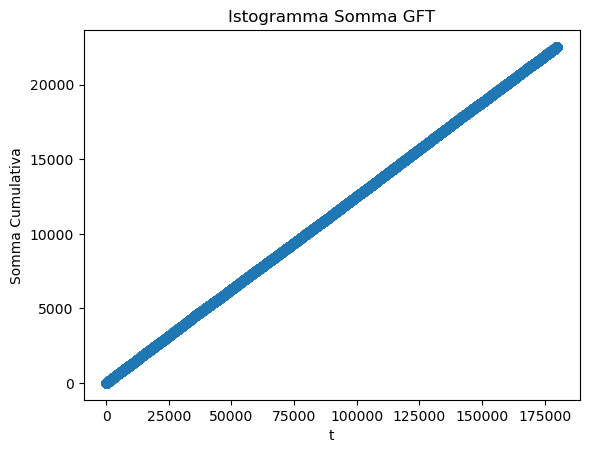

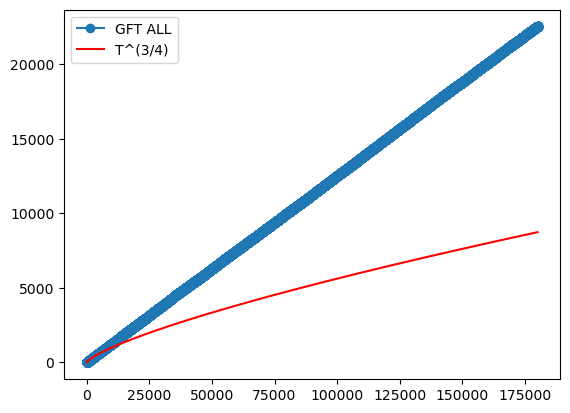

I_STAR:  155
P_STAR:  0.5149501661129569


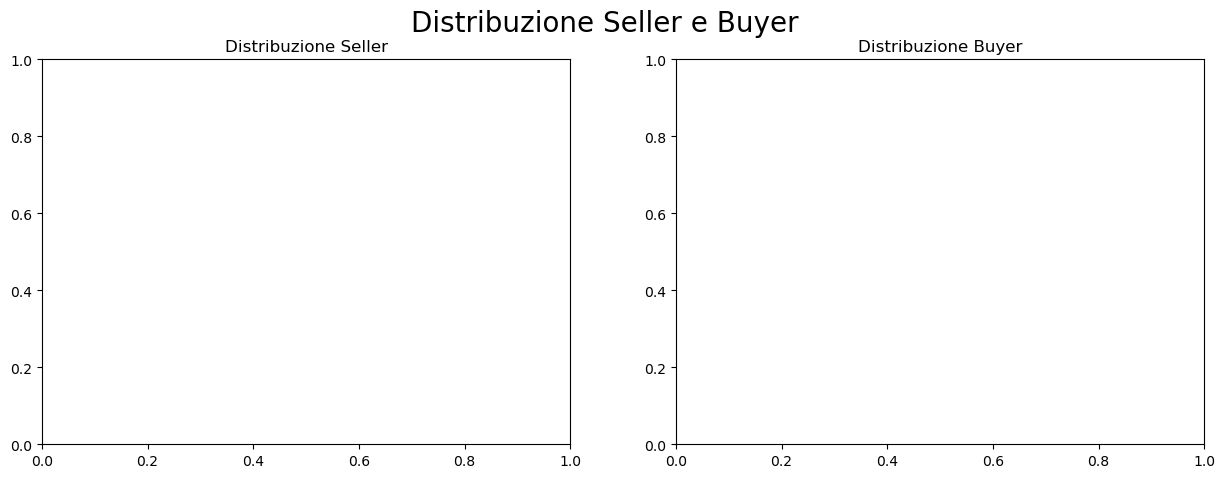

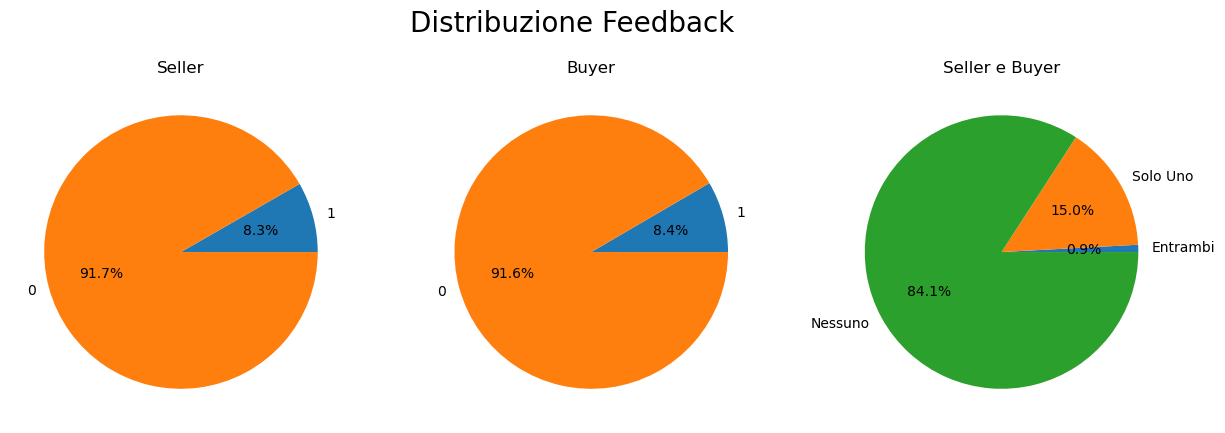

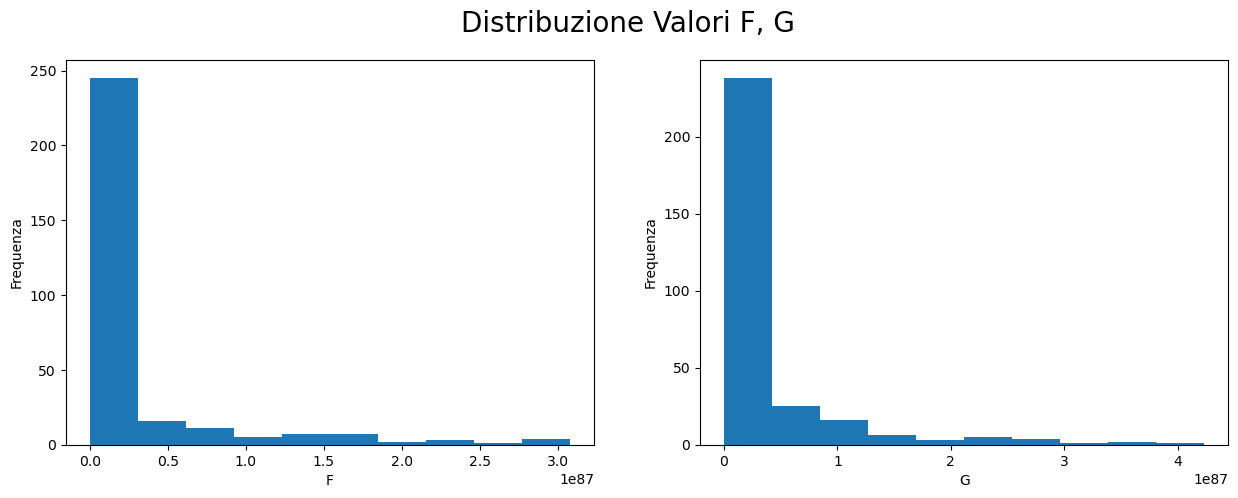

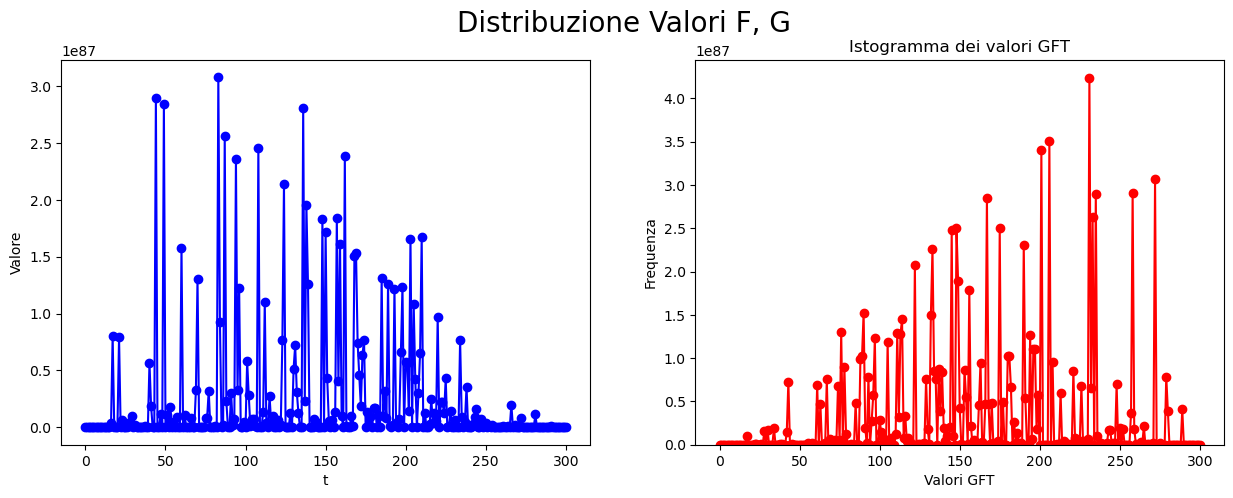

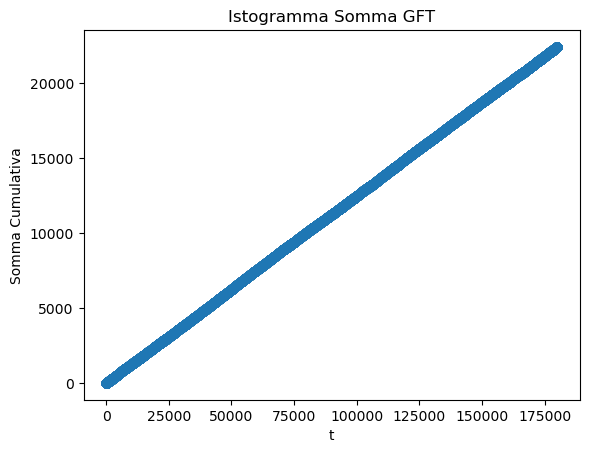

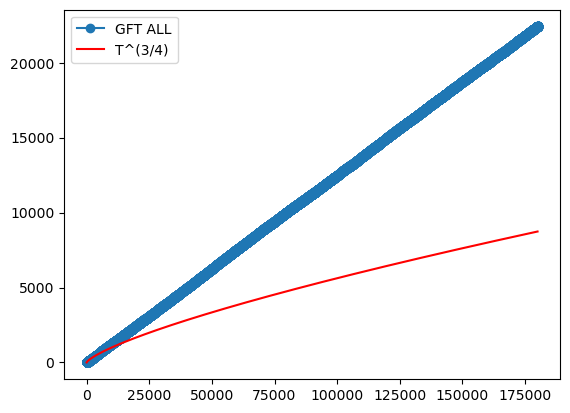

I_STAR:  12
P_STAR:  0.03986710963455149


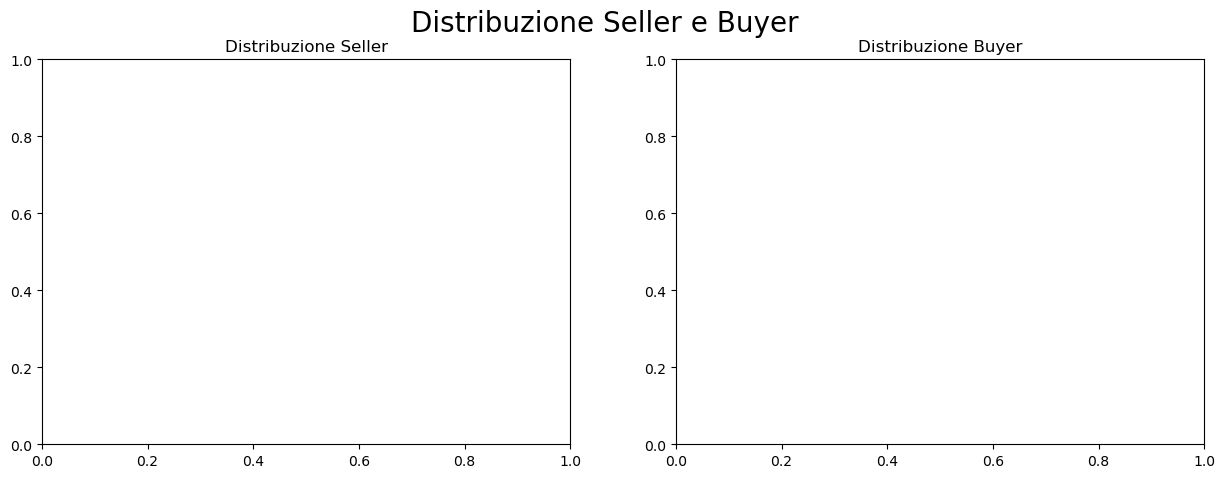

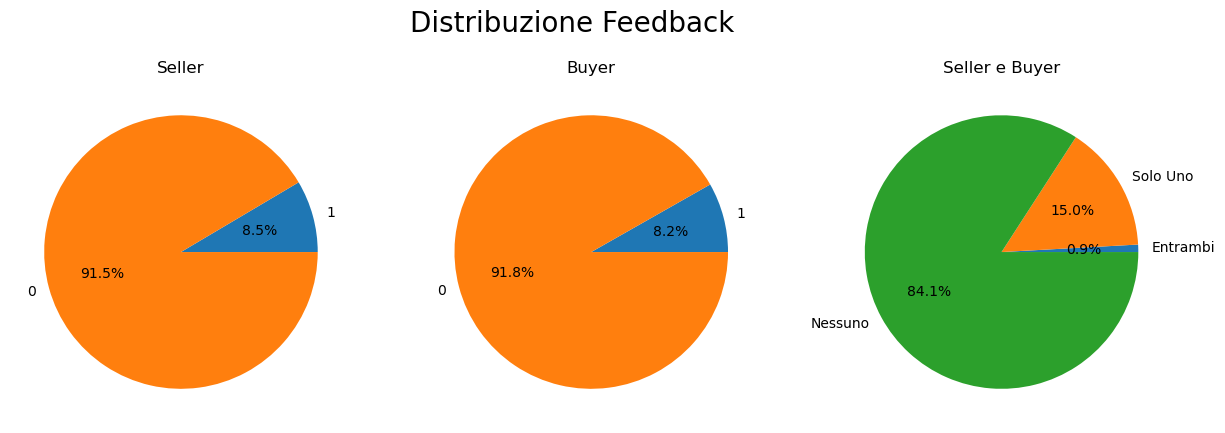

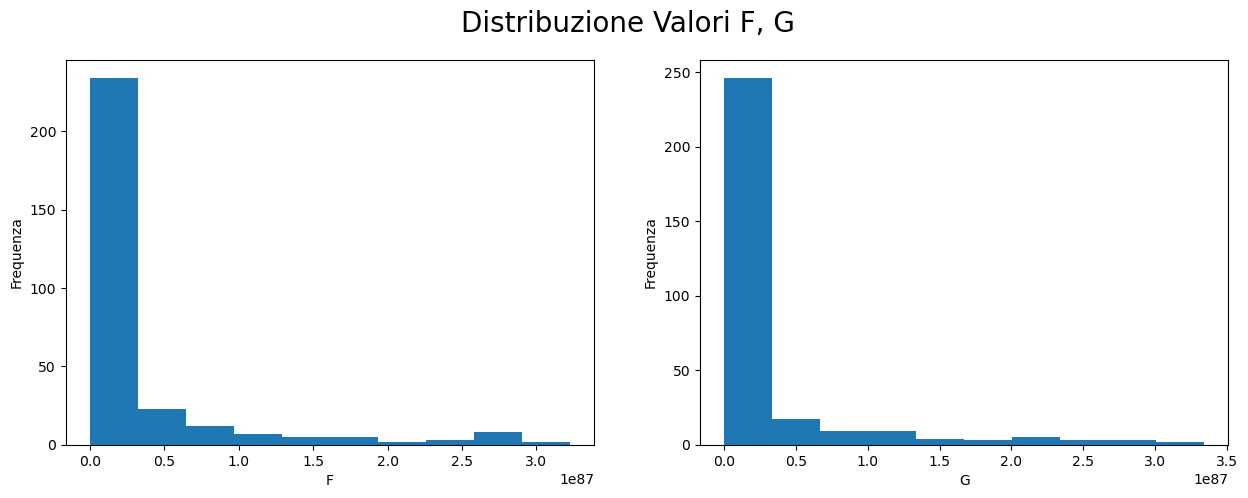

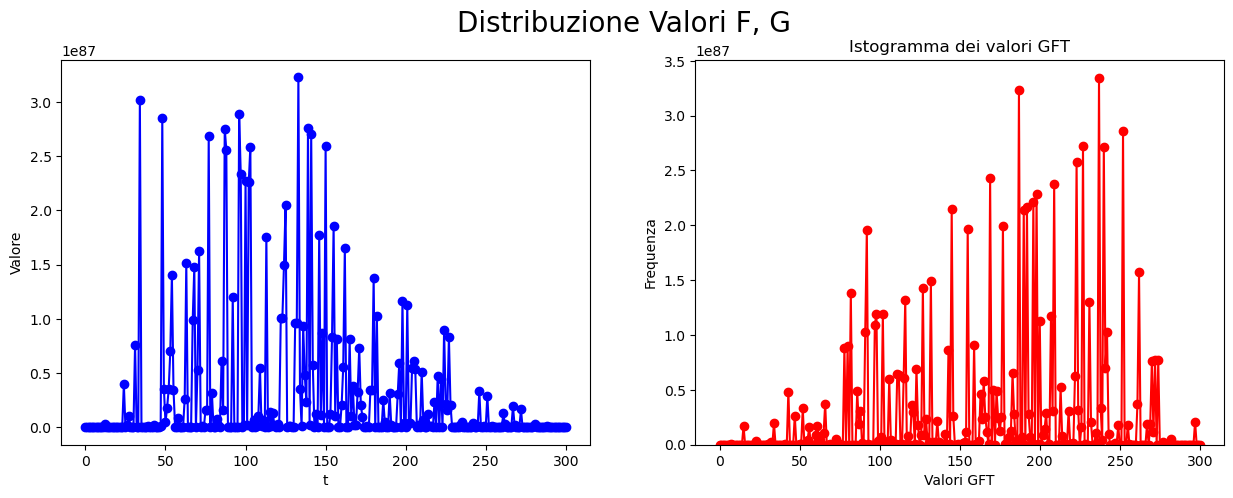

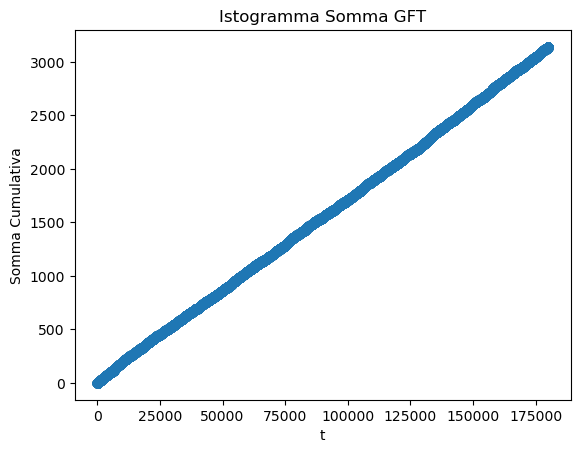

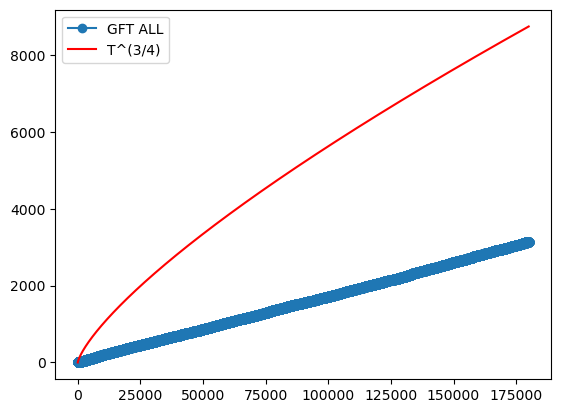

I_STAR:  182
P_STAR:  0.6046511627906976


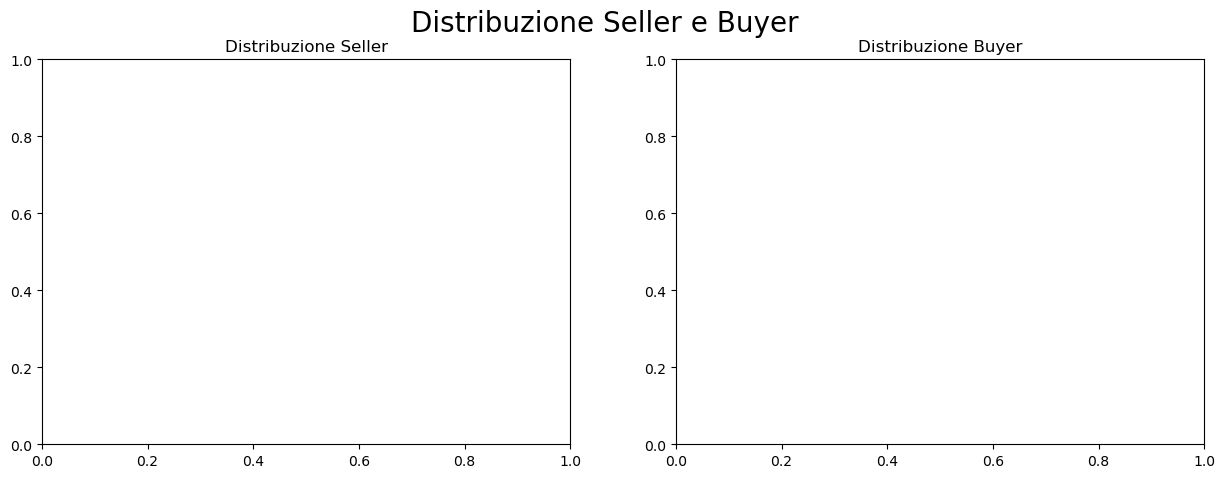

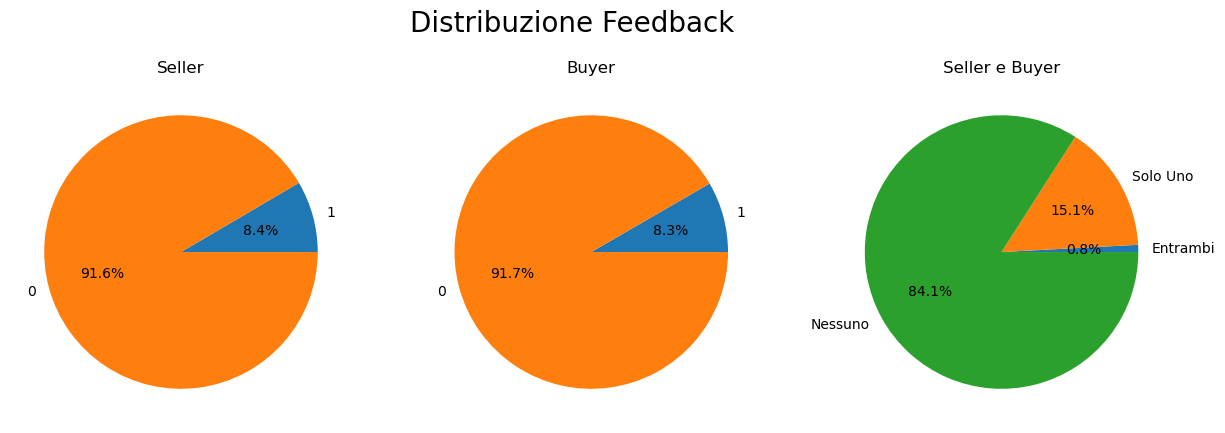

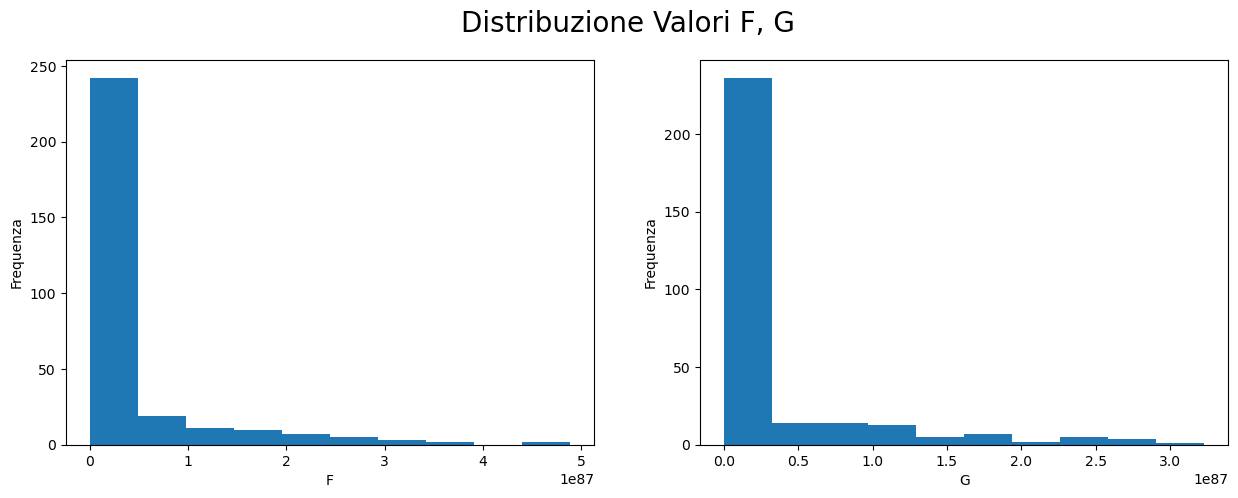

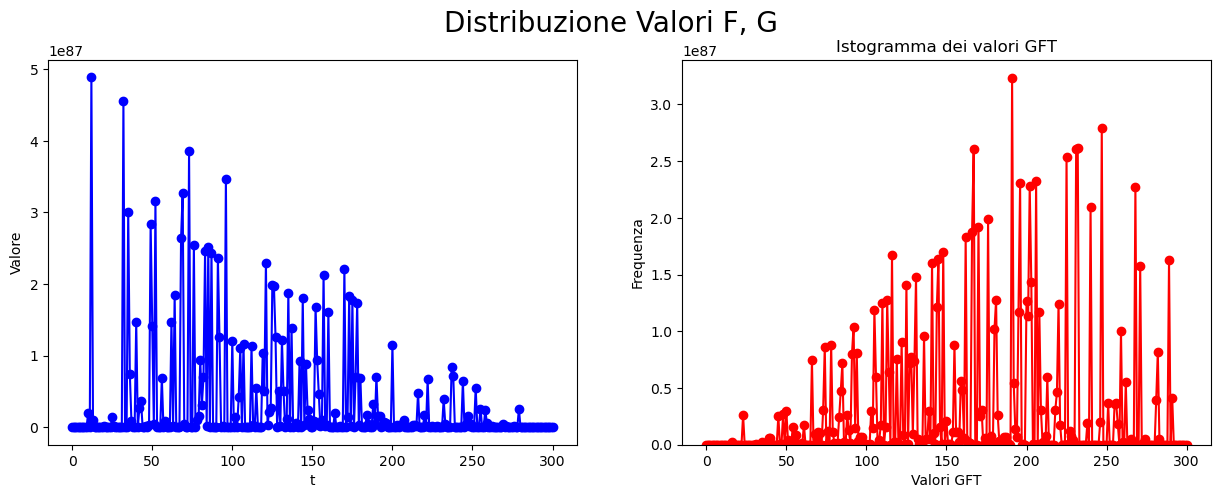

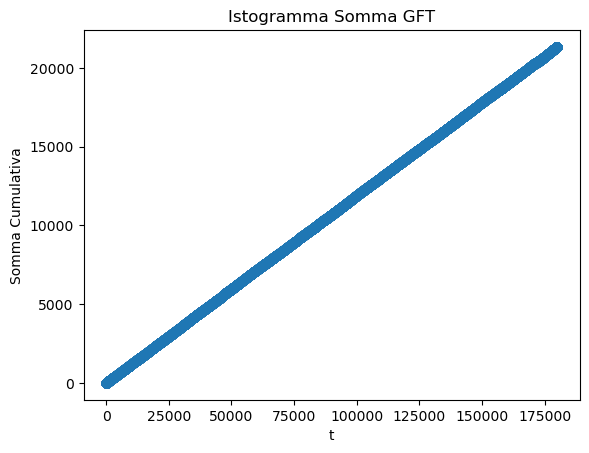

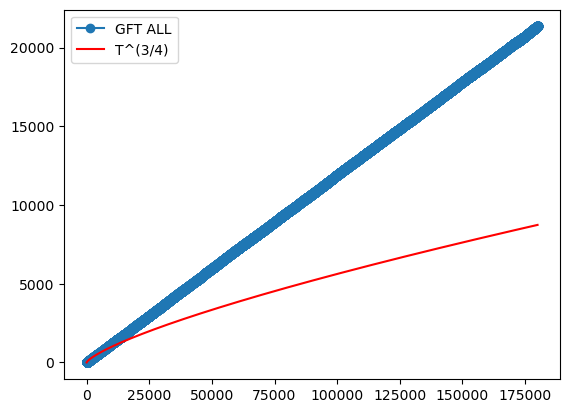

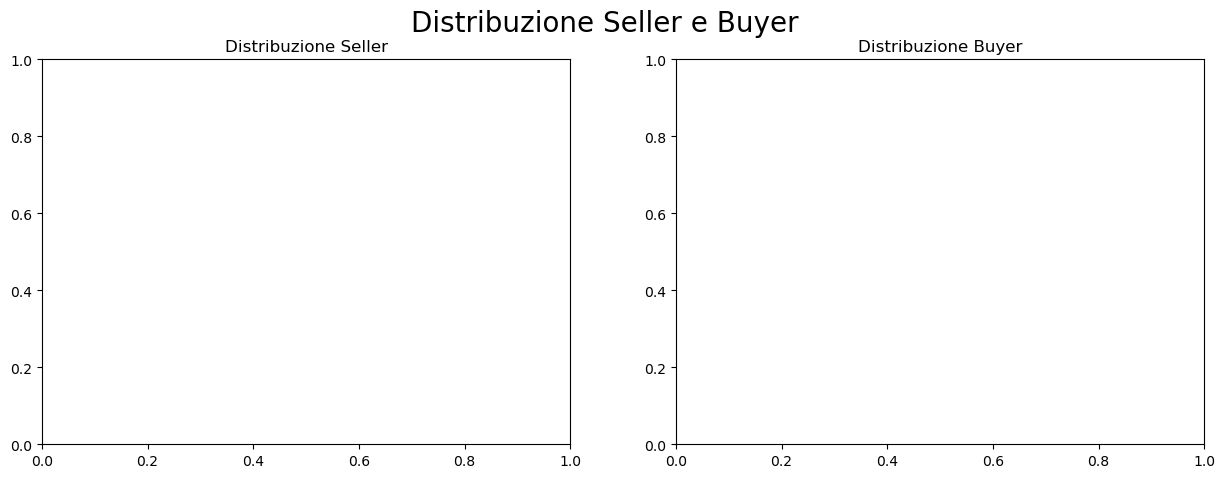

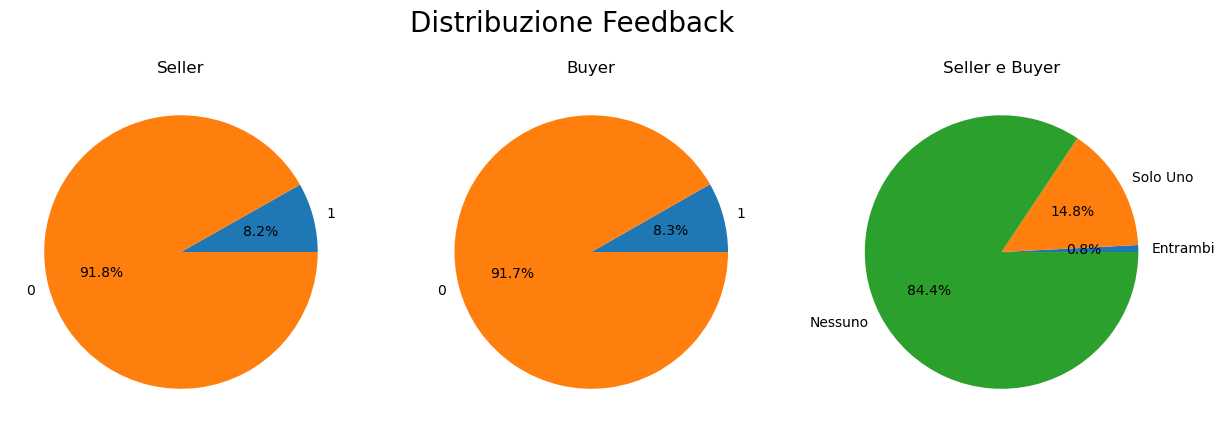

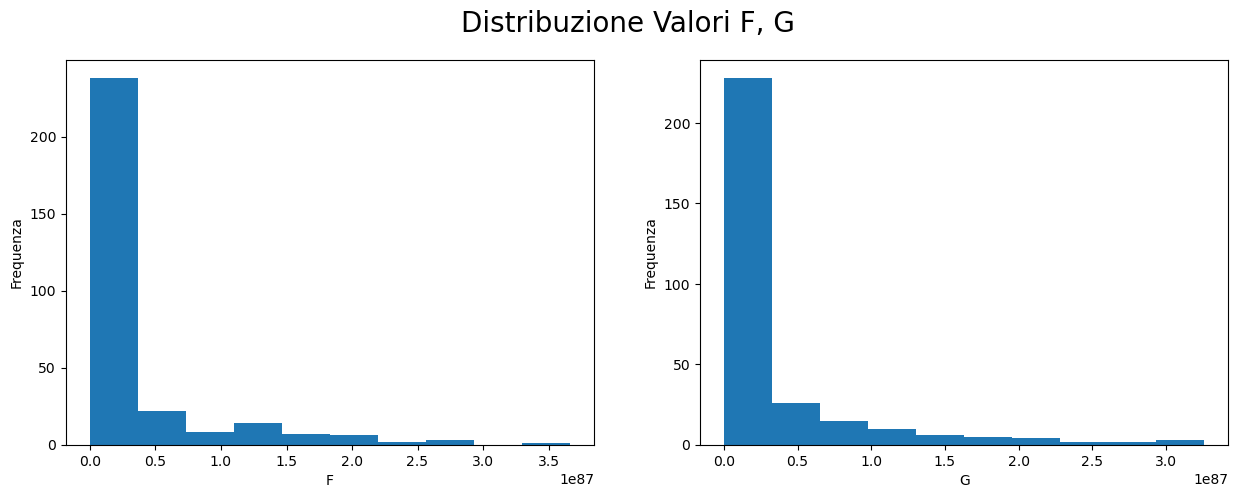

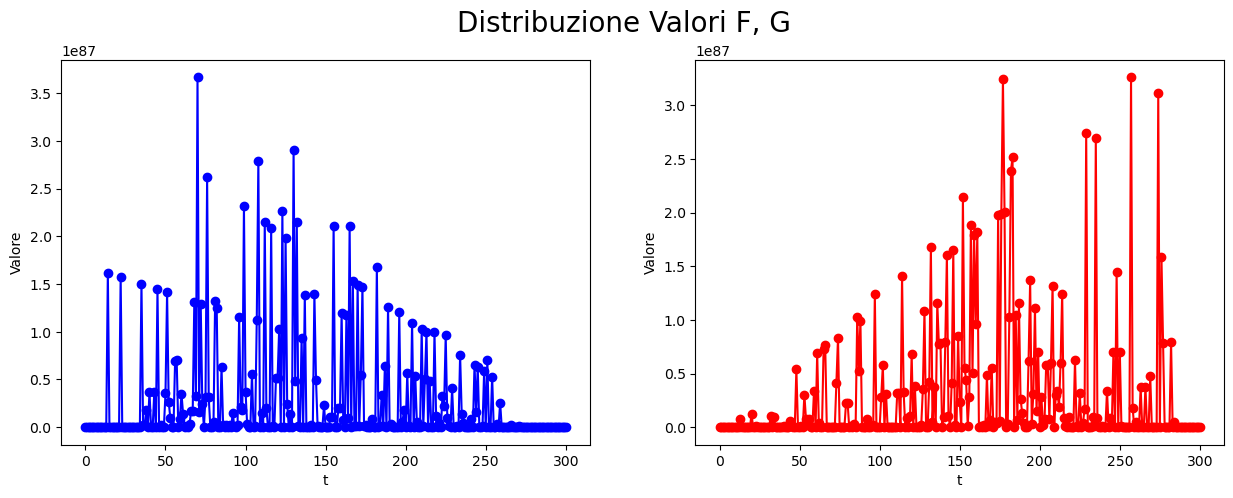

In [32]:
for i in range(n):
    gft_all = execute_algo(T_0, K,num_cifre,2)
    final_gft_results.append(gft_all)

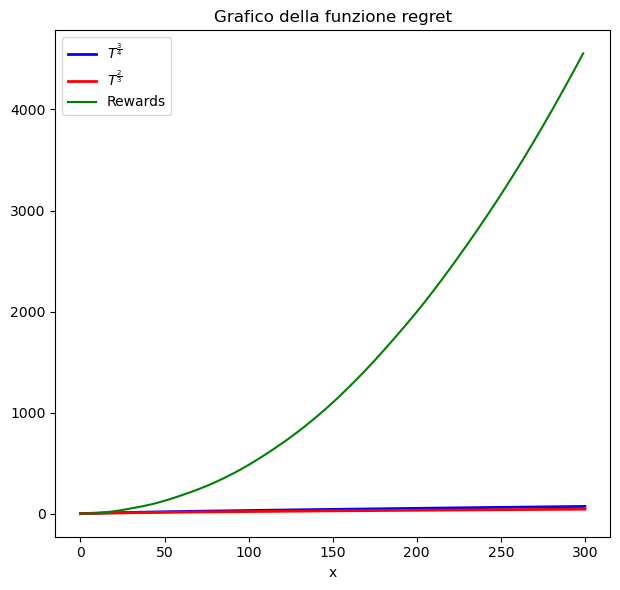

In [33]:
rewards = get_median_rewards(final_gft_results,K,n)
graph_rewards(rewards, K)

## Spaziata

I_STAR:  232
P_STAR:  0.770764119601329


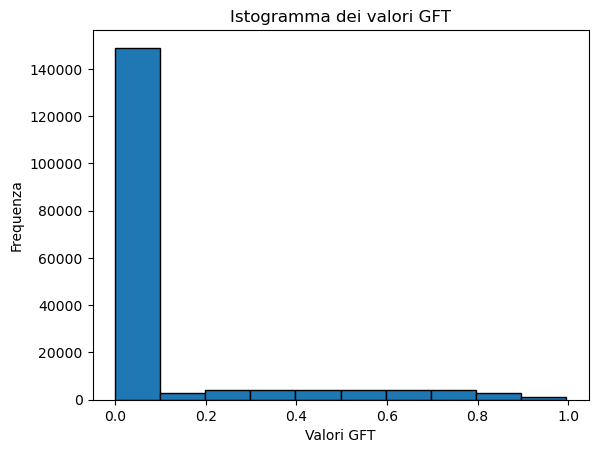

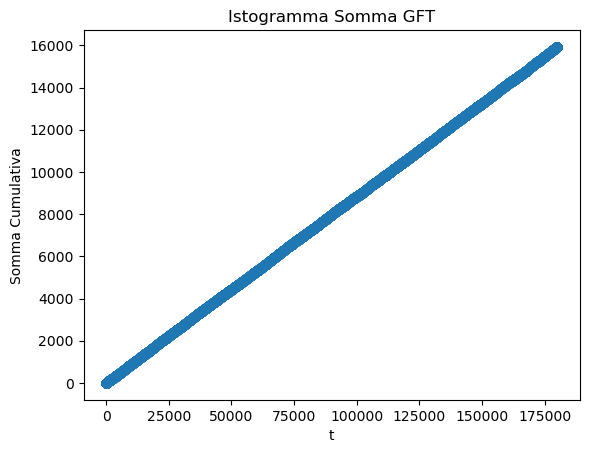

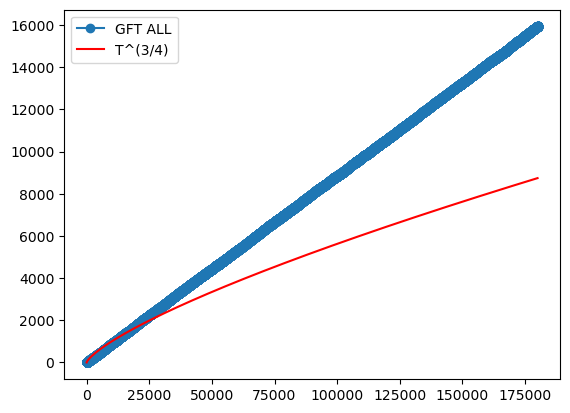

I_STAR:  126
P_STAR:  0.4186046511627907


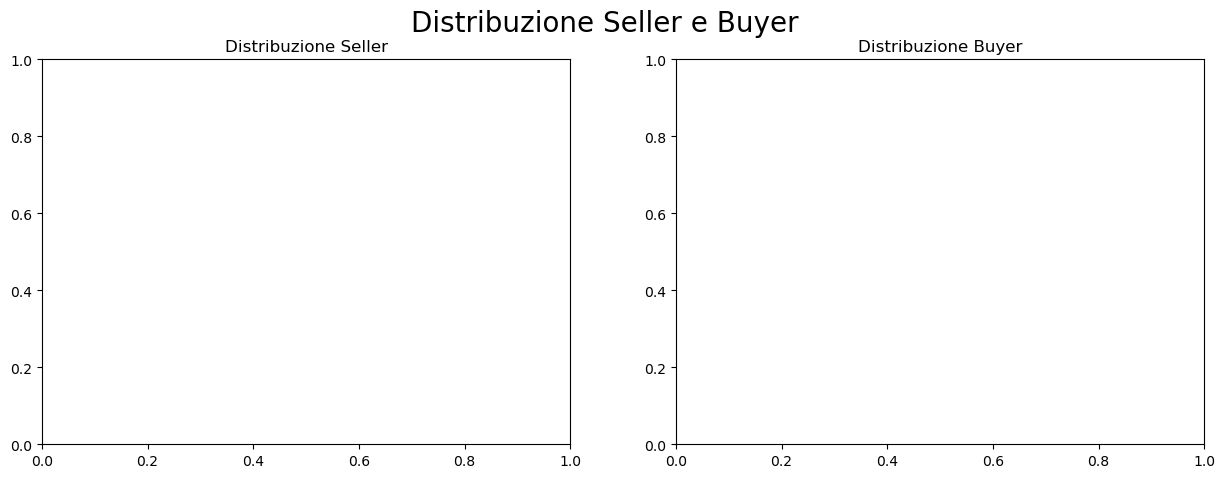

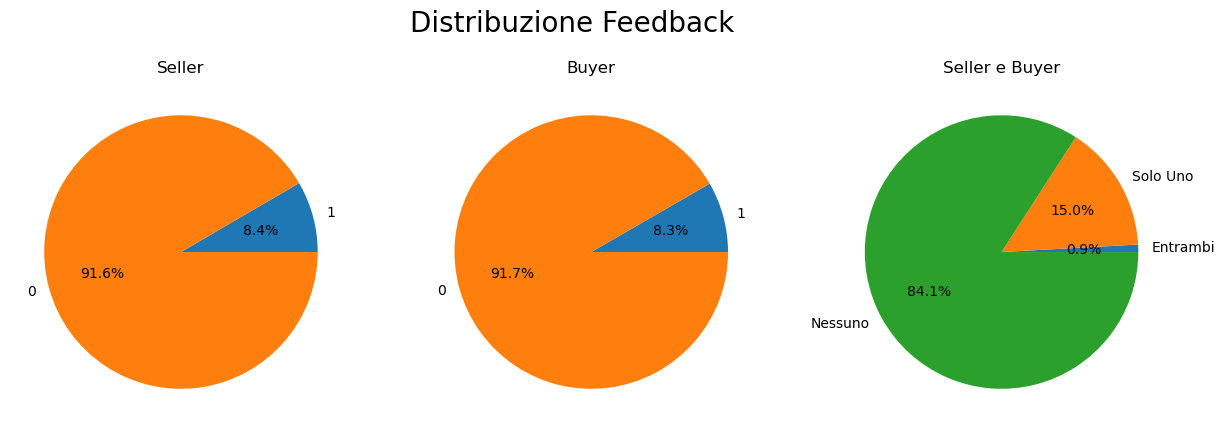

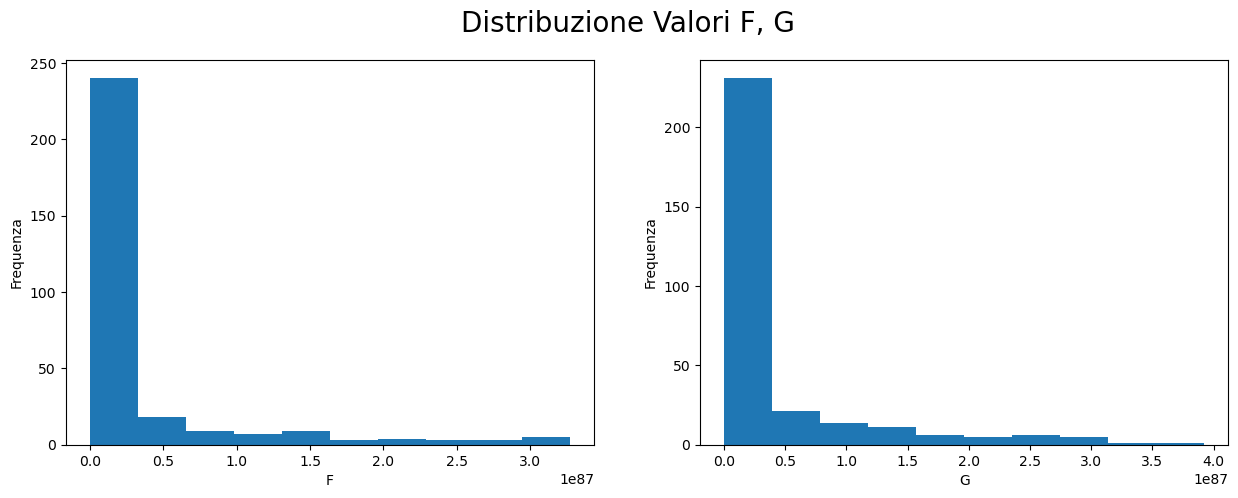

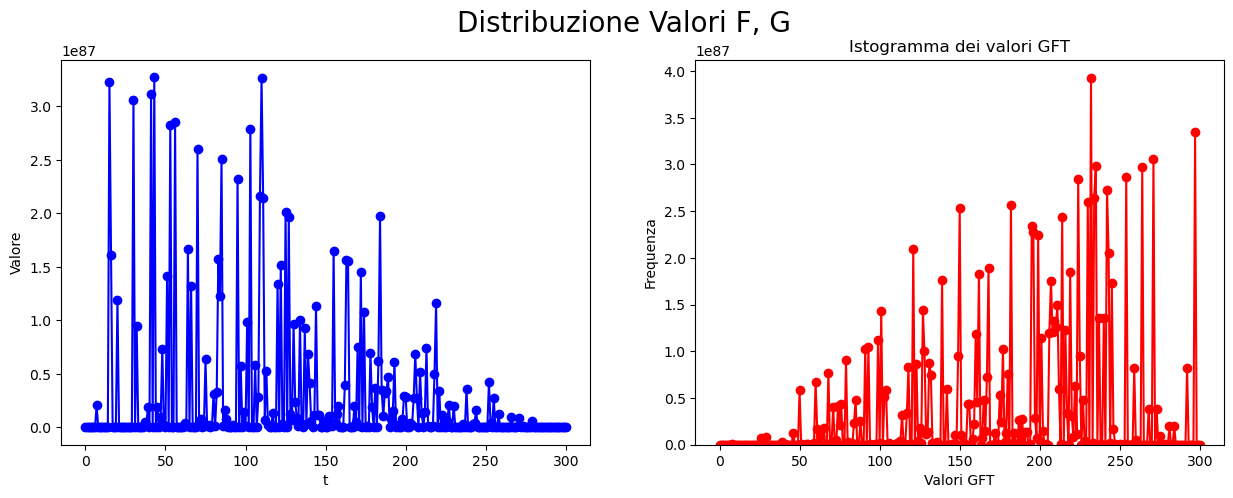

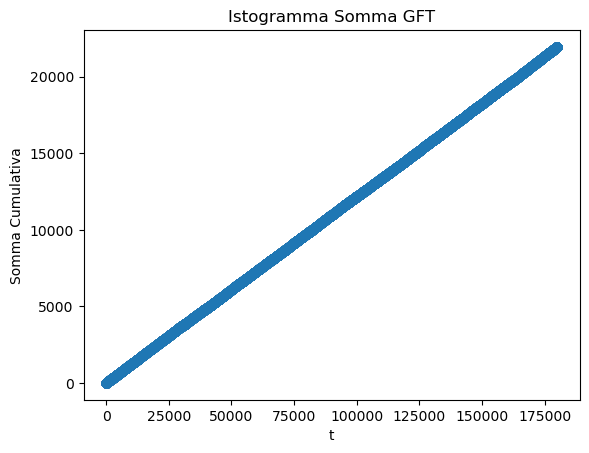

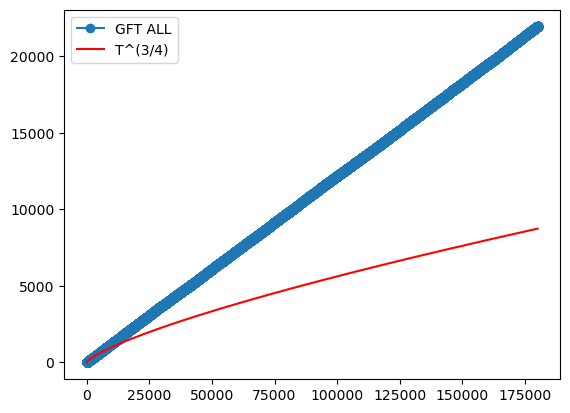

I_STAR:  48
P_STAR:  0.15946843853820597


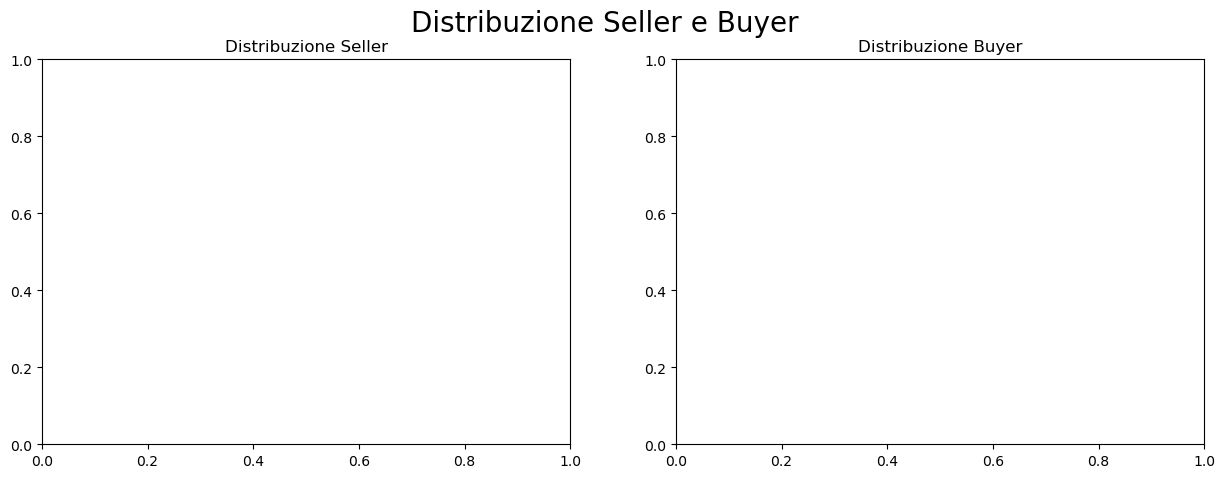

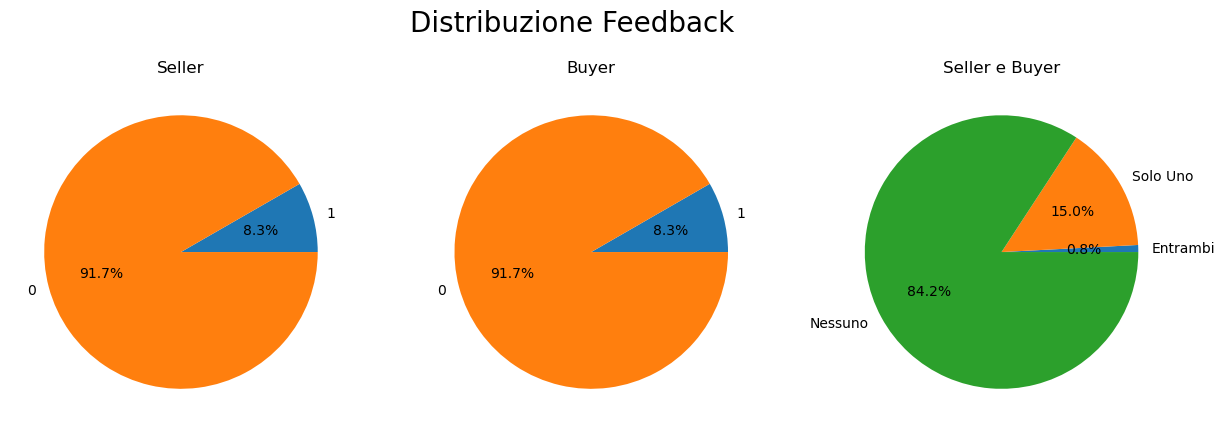

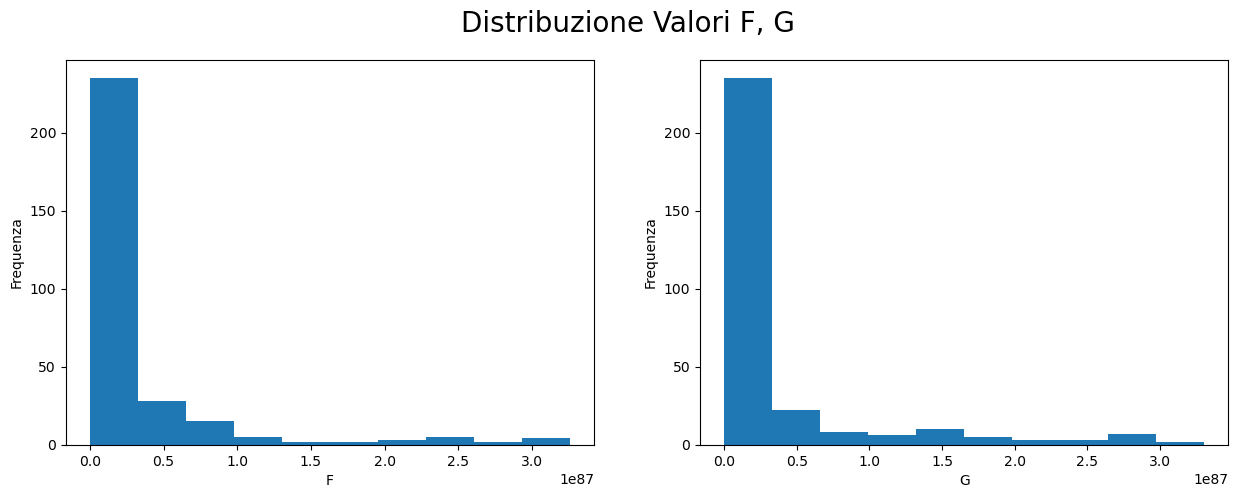

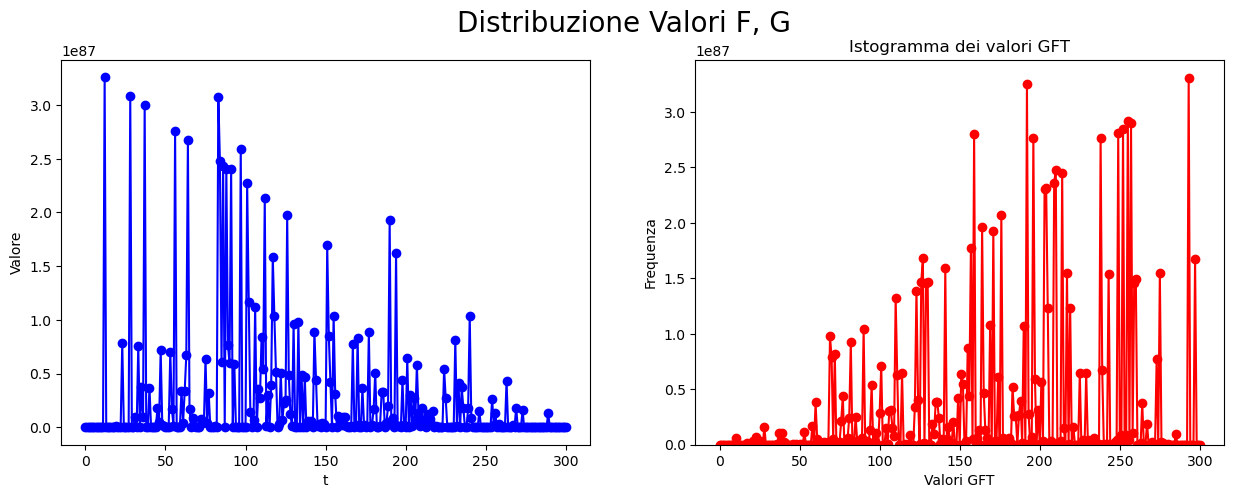

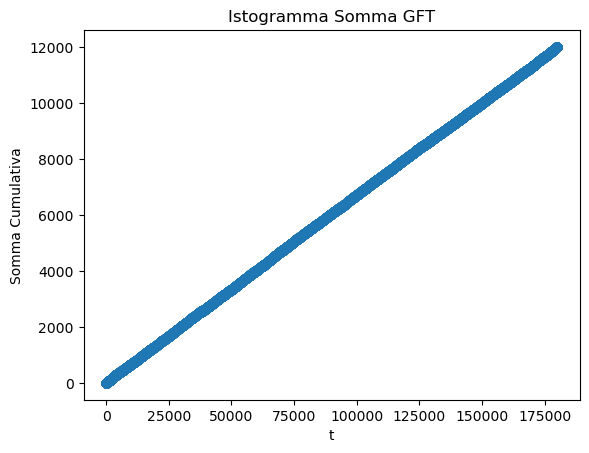

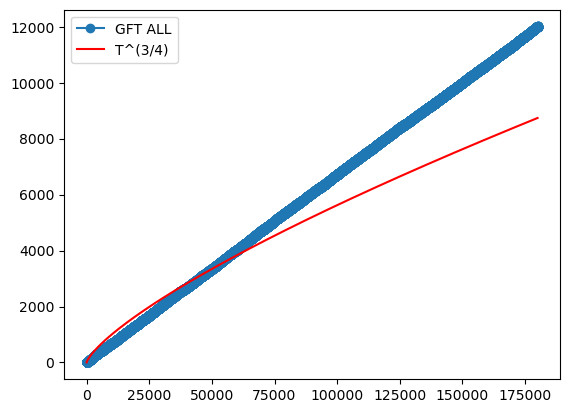

I_STAR:  221
P_STAR:  0.7342192691029901


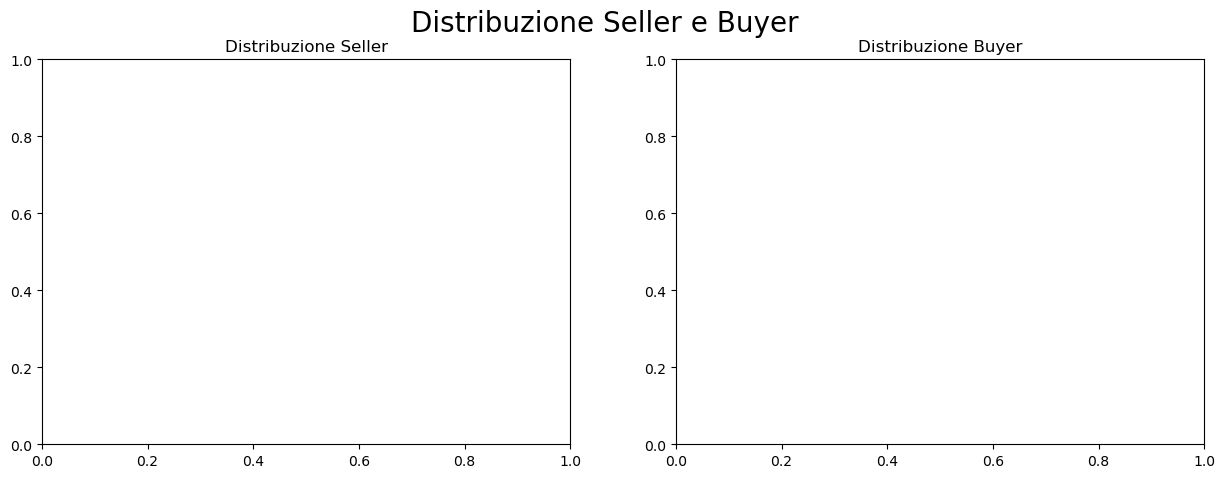

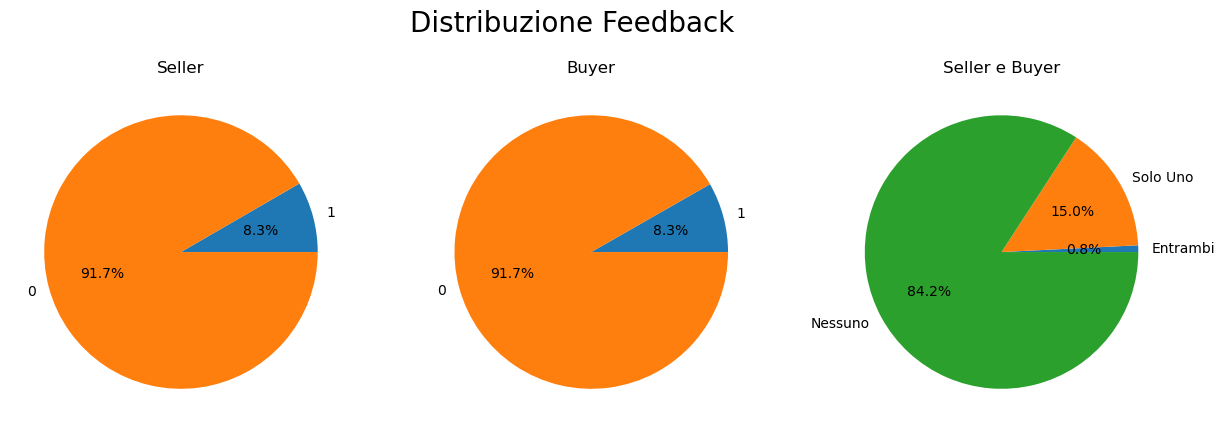

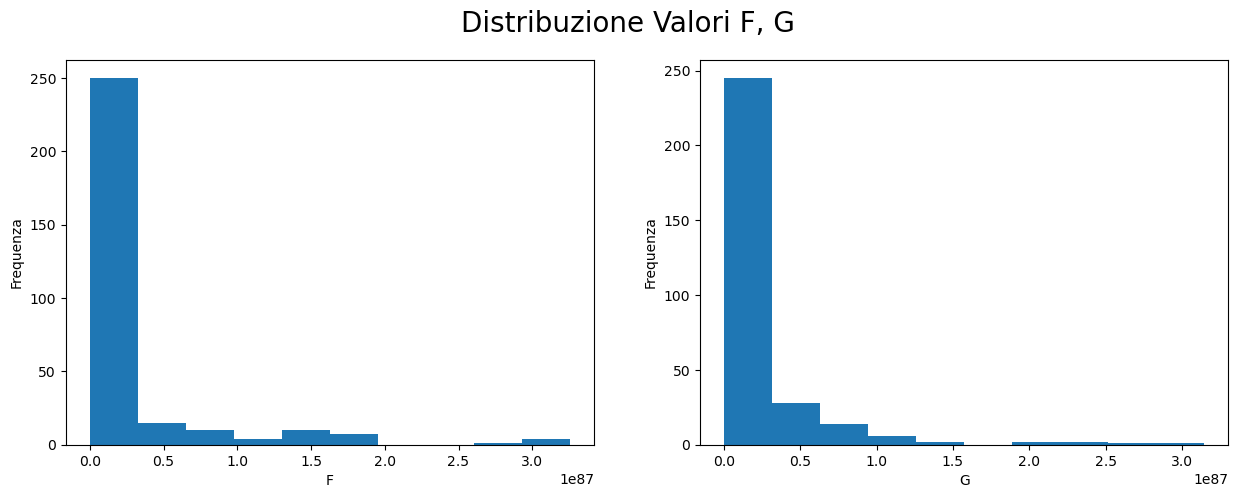

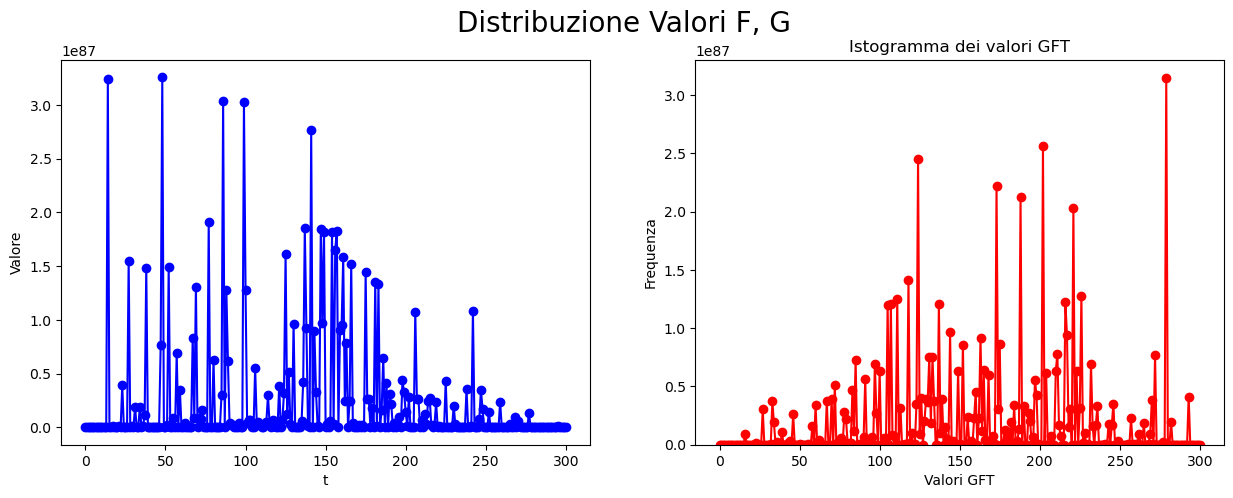

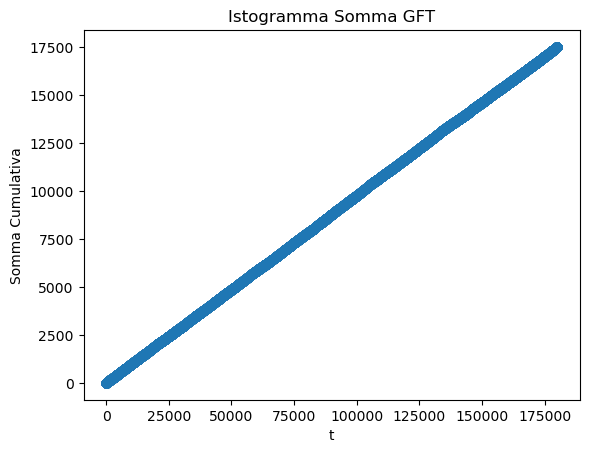

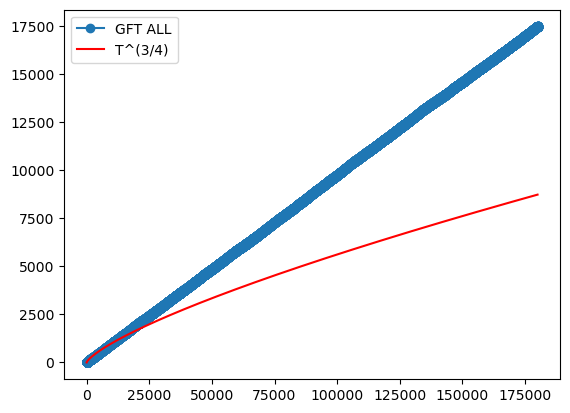

I_STAR:  171
P_STAR:  0.5681063122923588


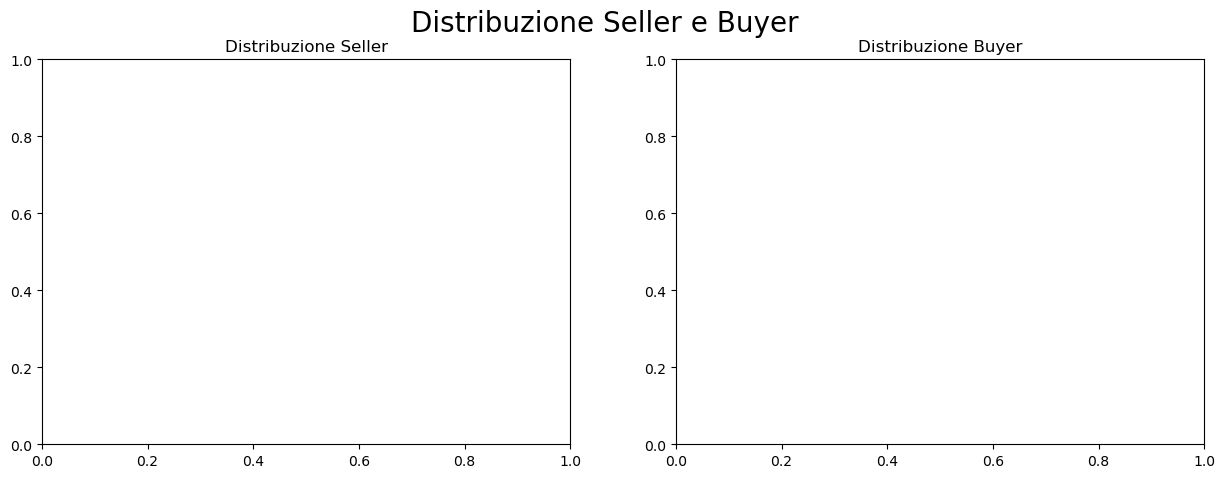

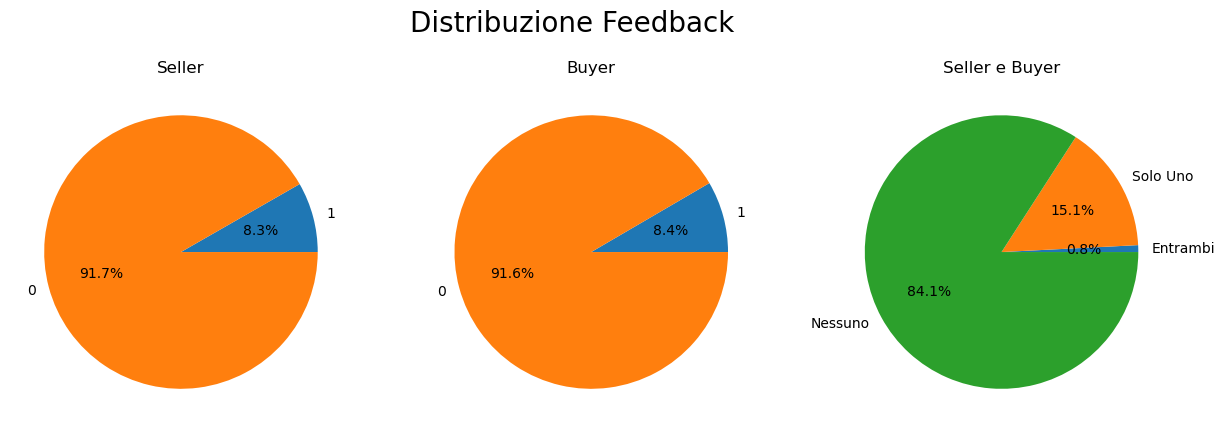

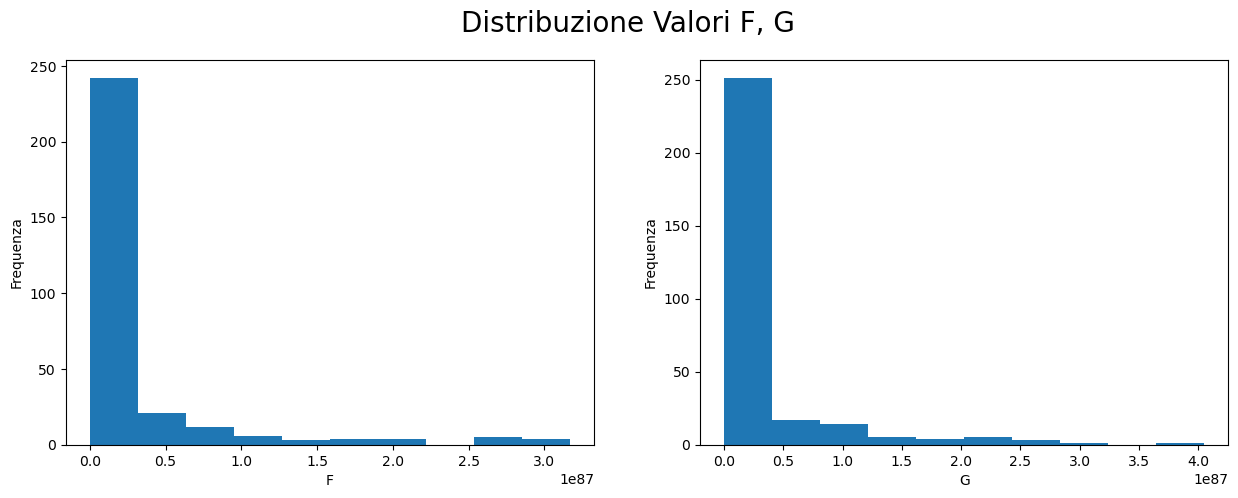

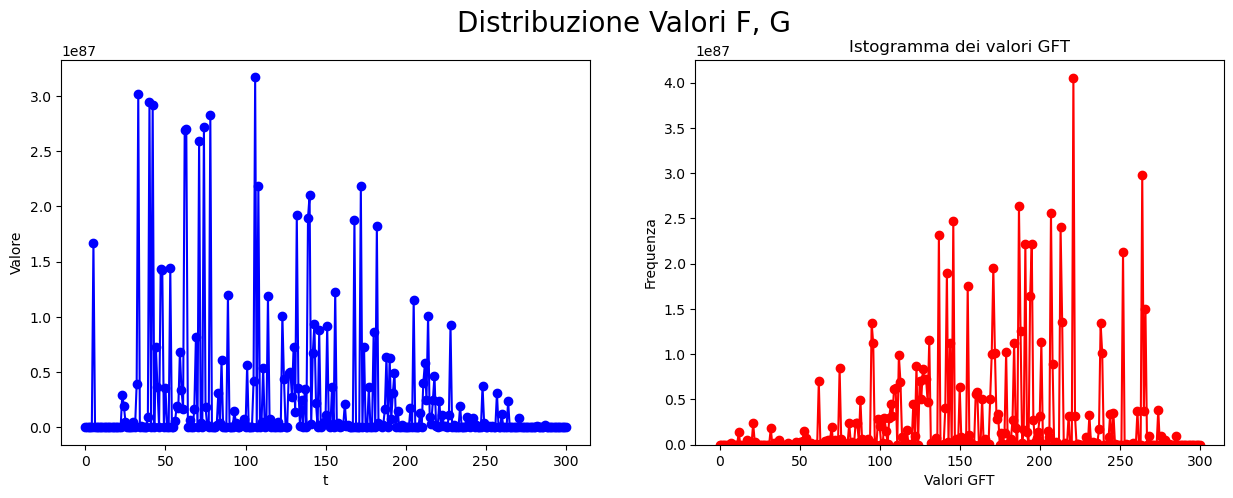

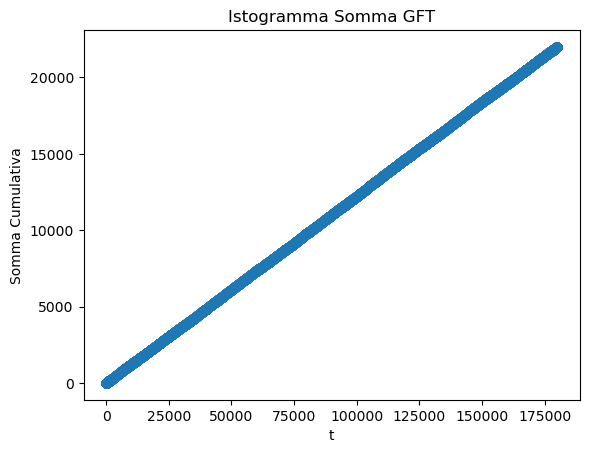

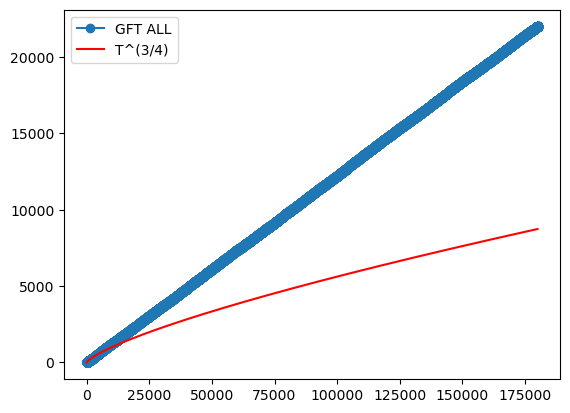

I_STAR:  37
P_STAR:  0.12292358803986711


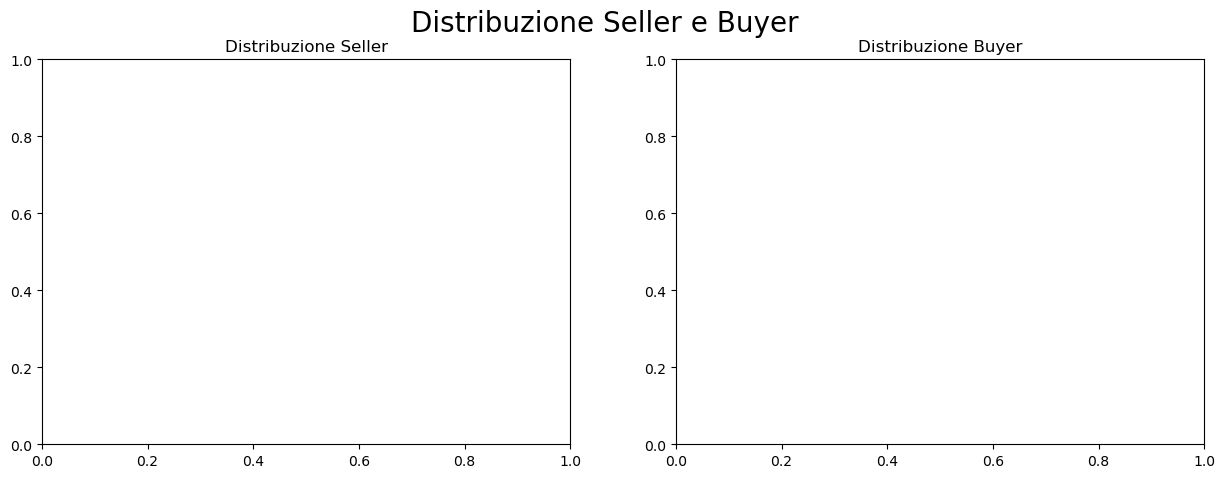

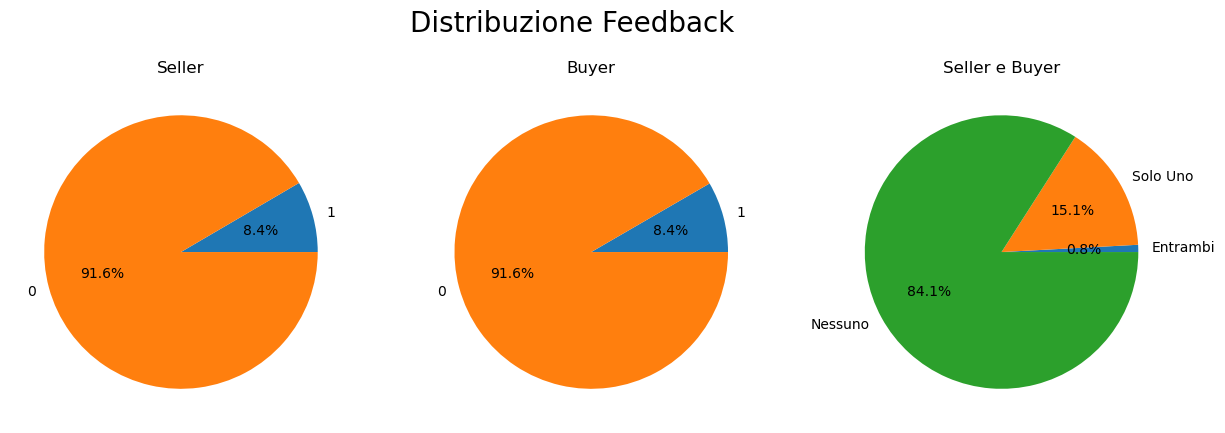

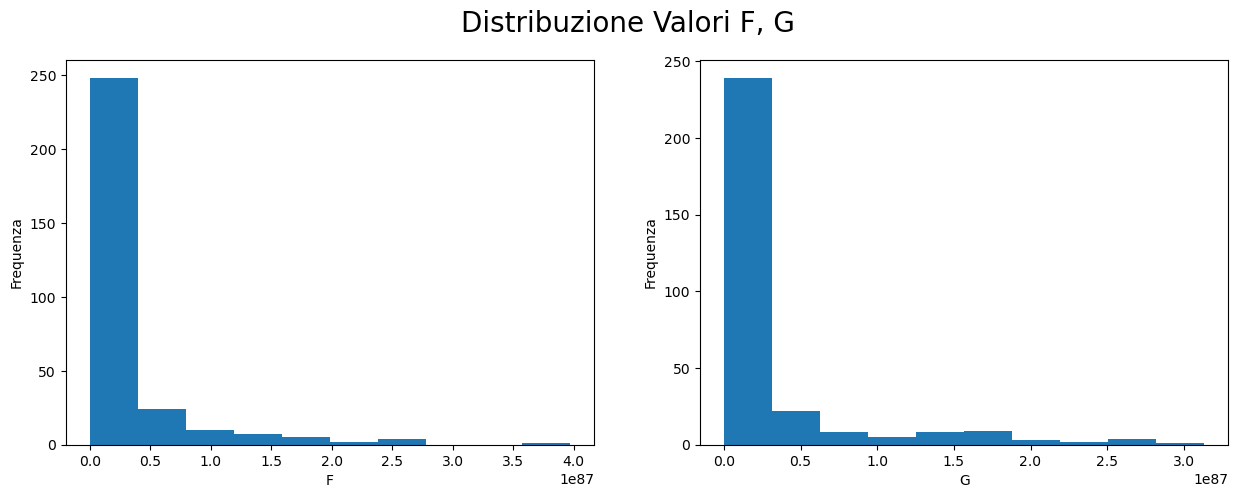

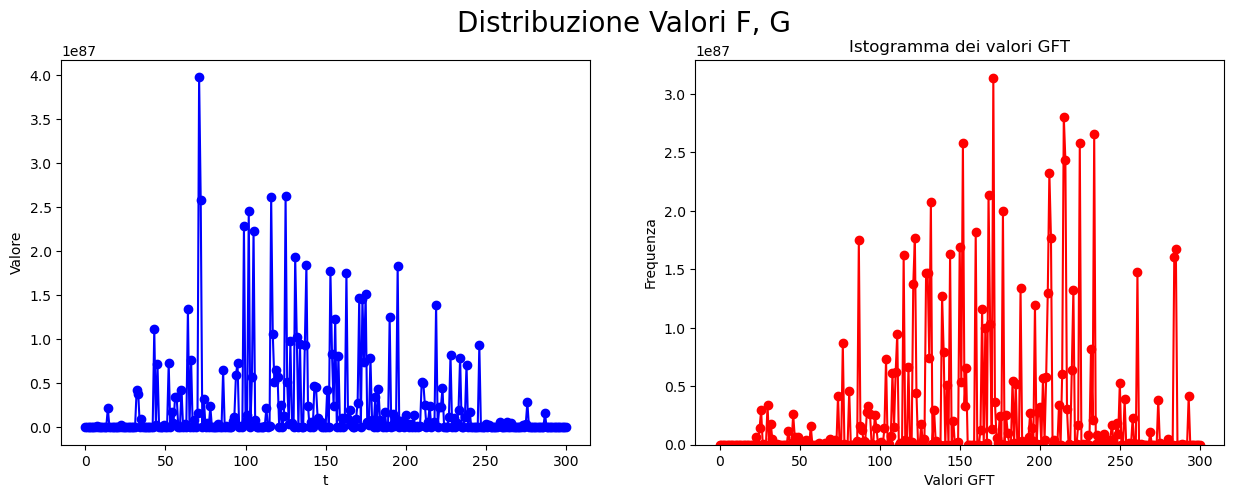

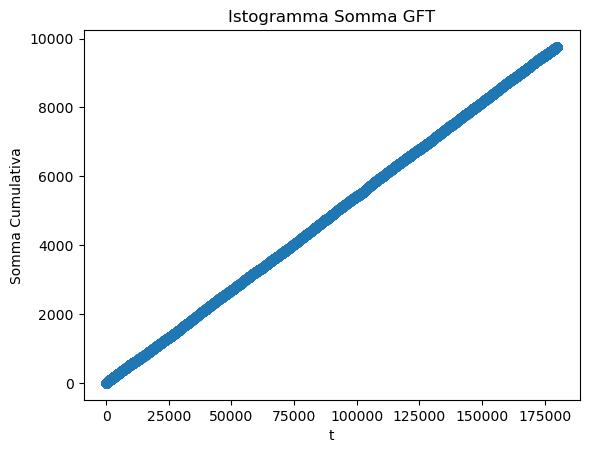

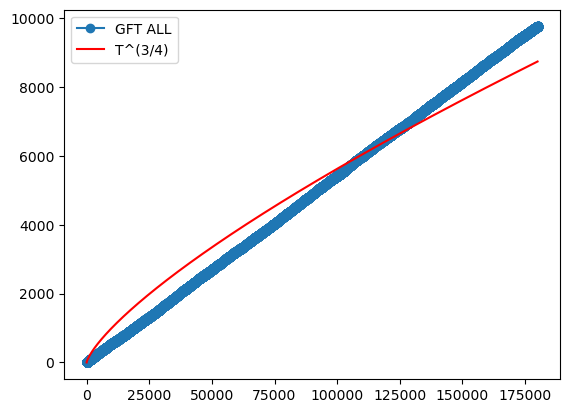

I_STAR:  37
P_STAR:  0.12292358803986711


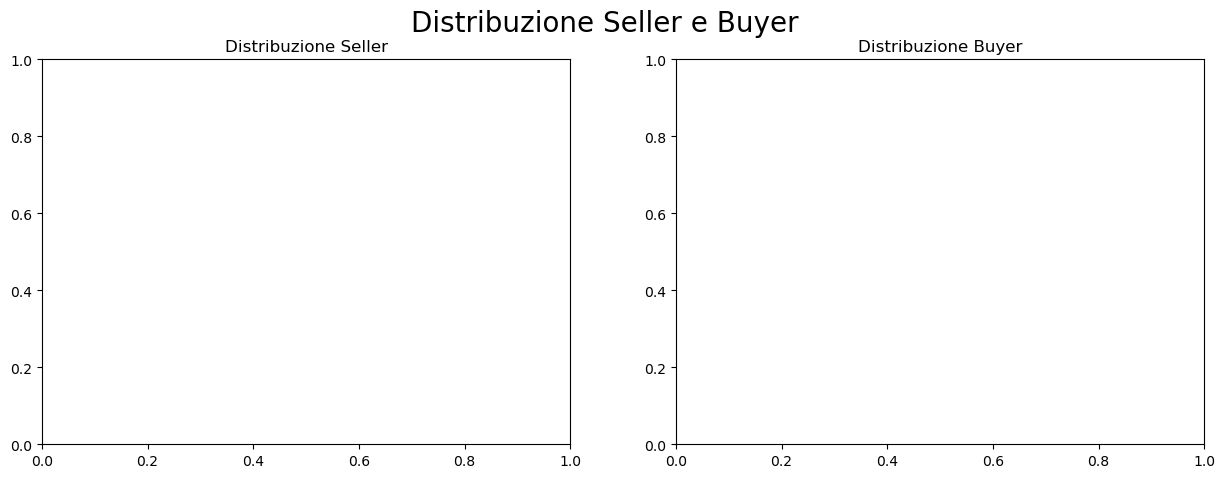

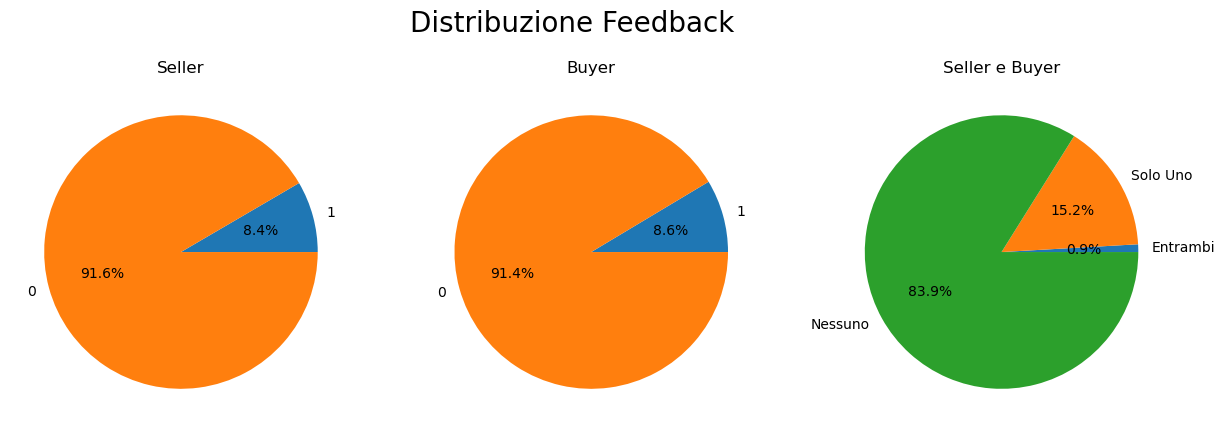

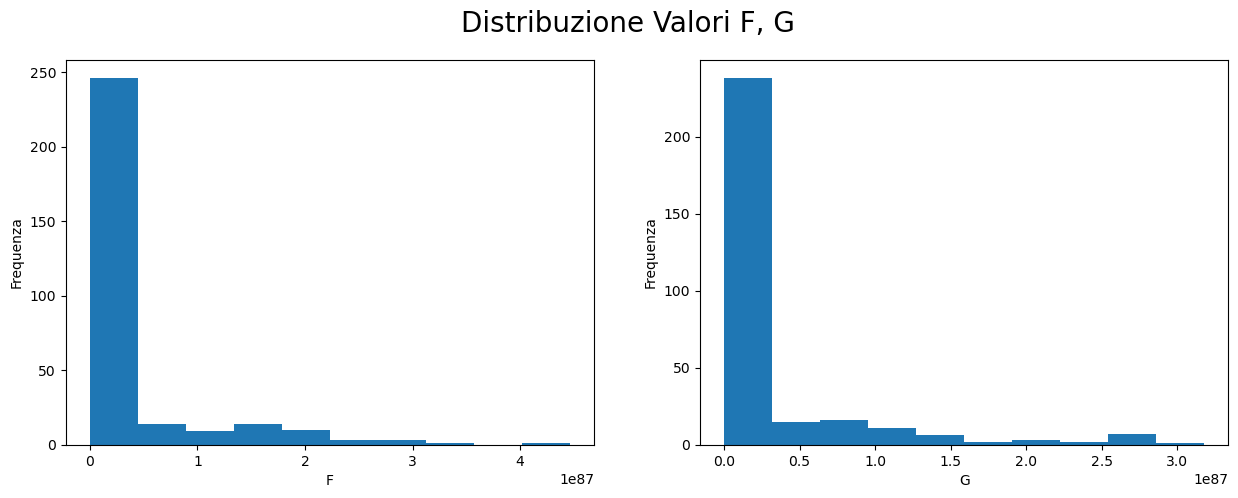

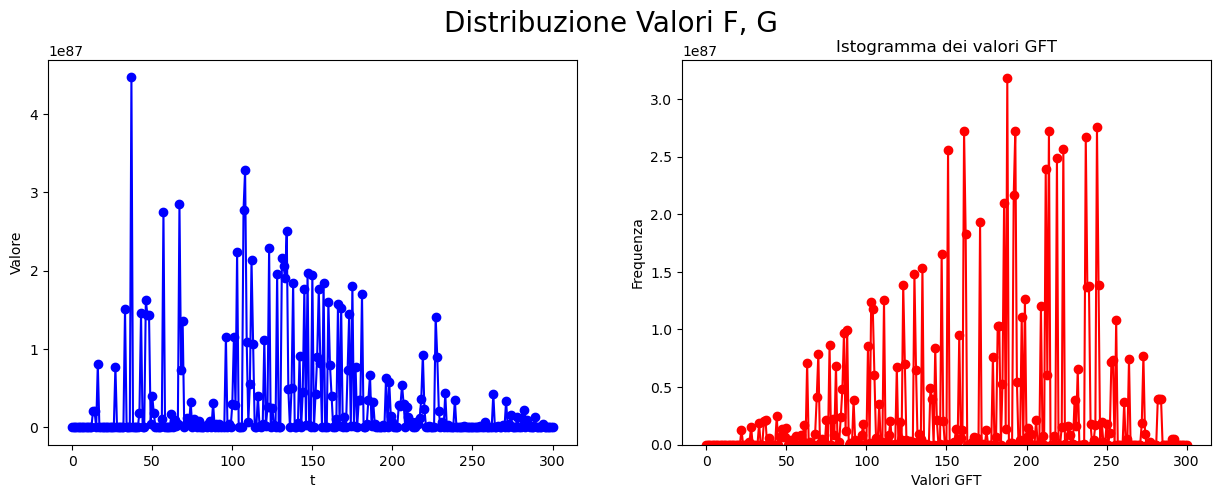

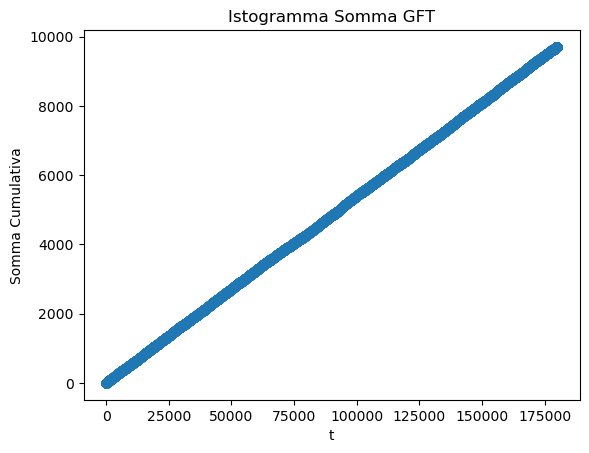

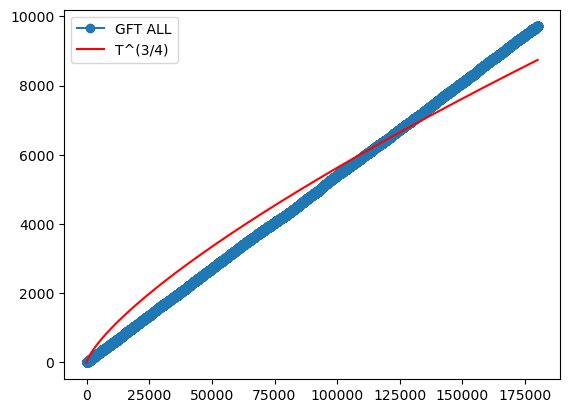

I_STAR:  198
P_STAR:  0.6578073089700996


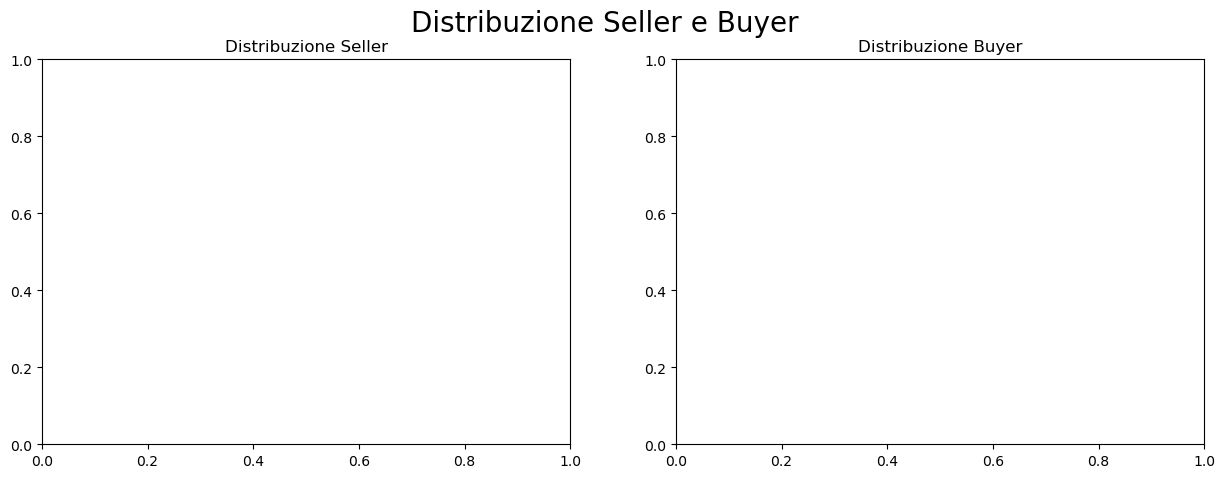

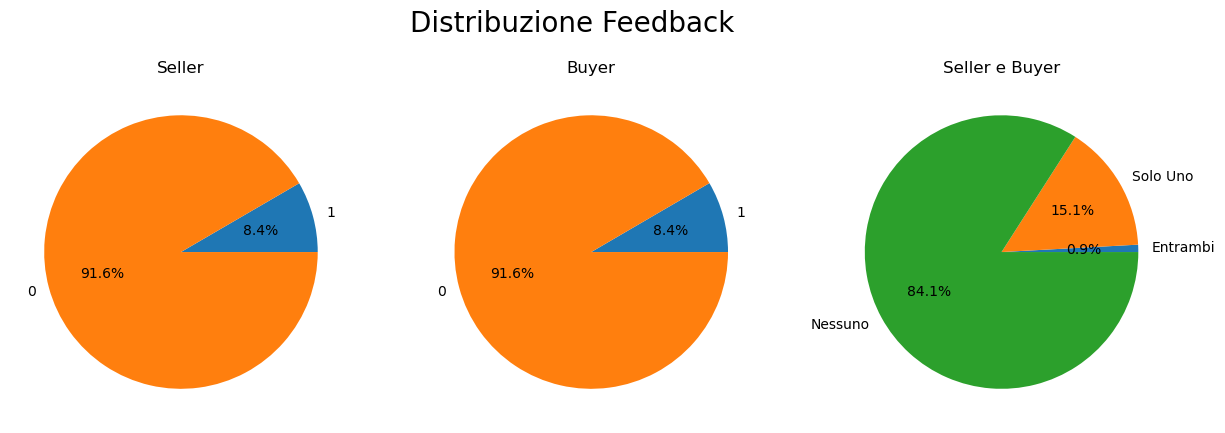

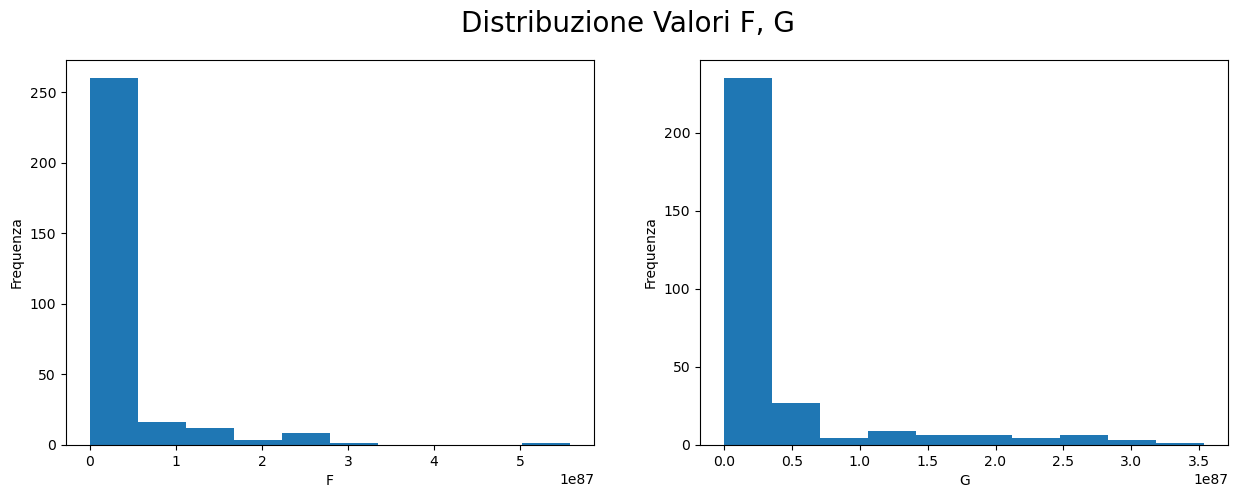

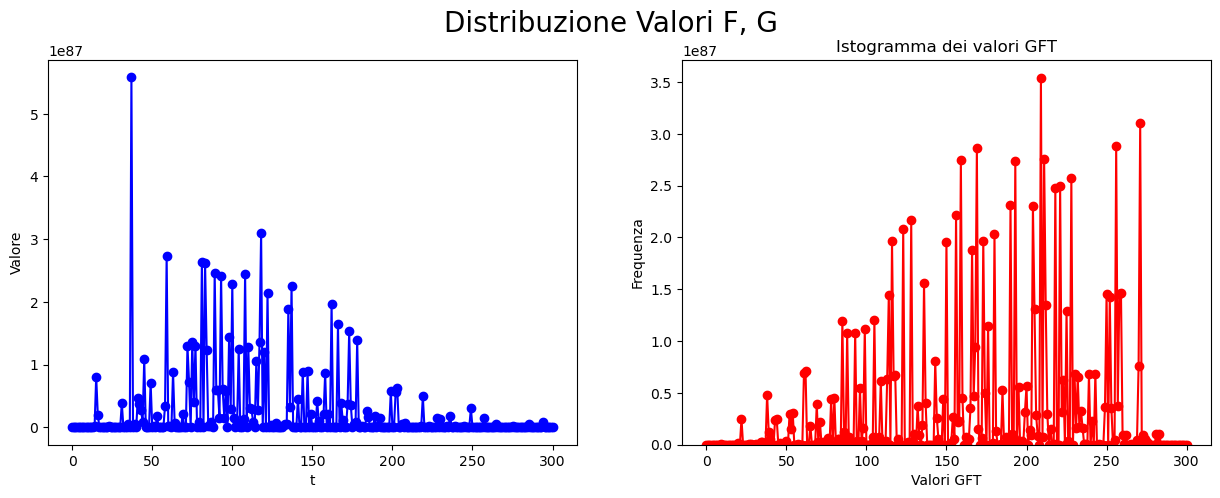

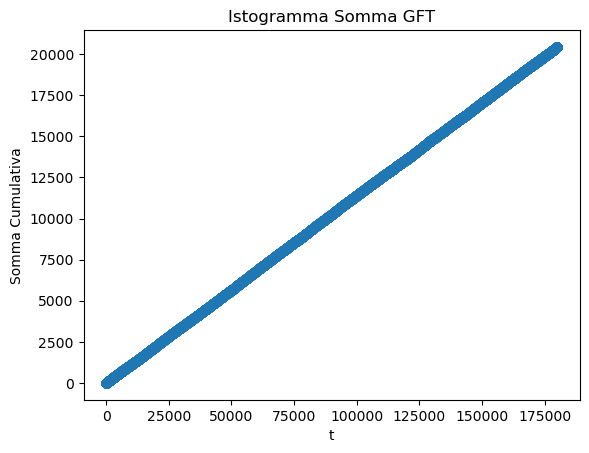

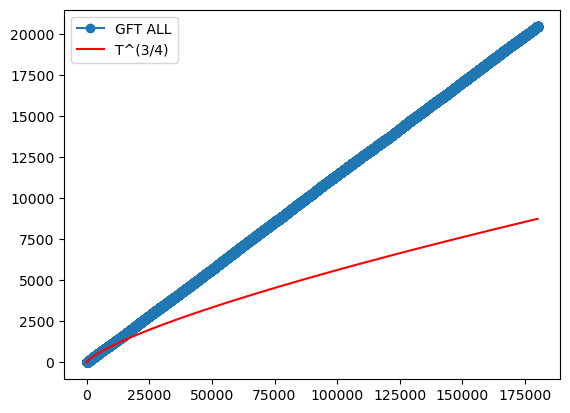

I_STAR:  138
P_STAR:  0.4584717607973422


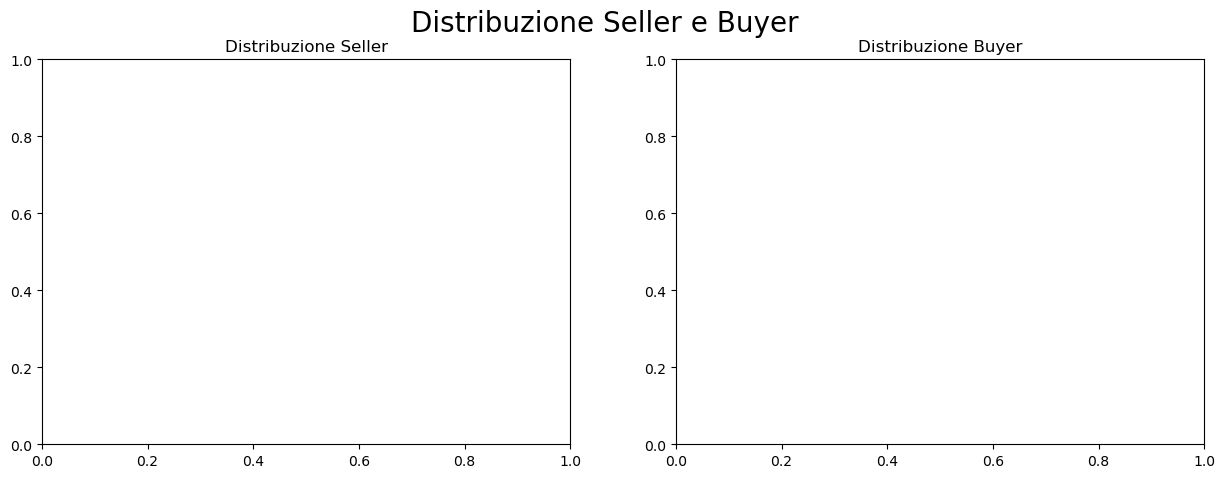

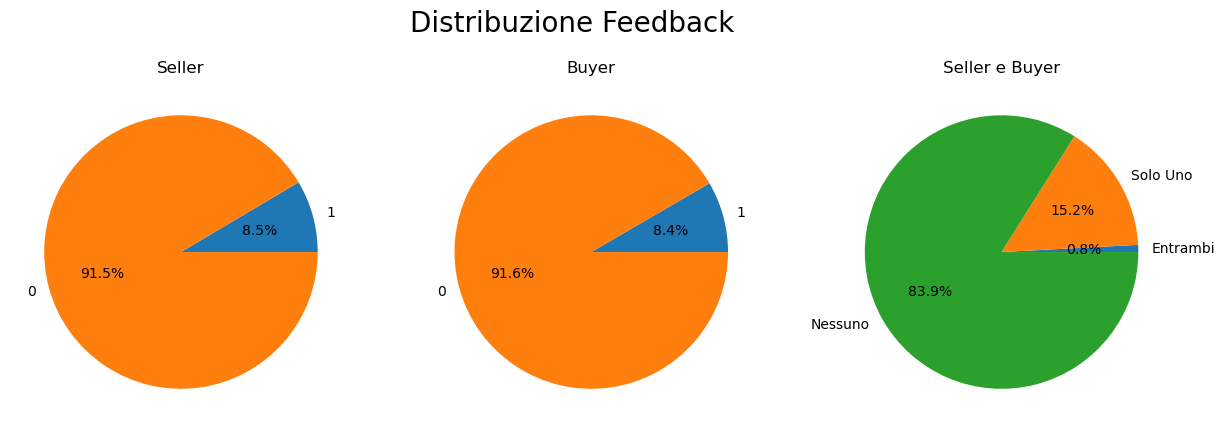

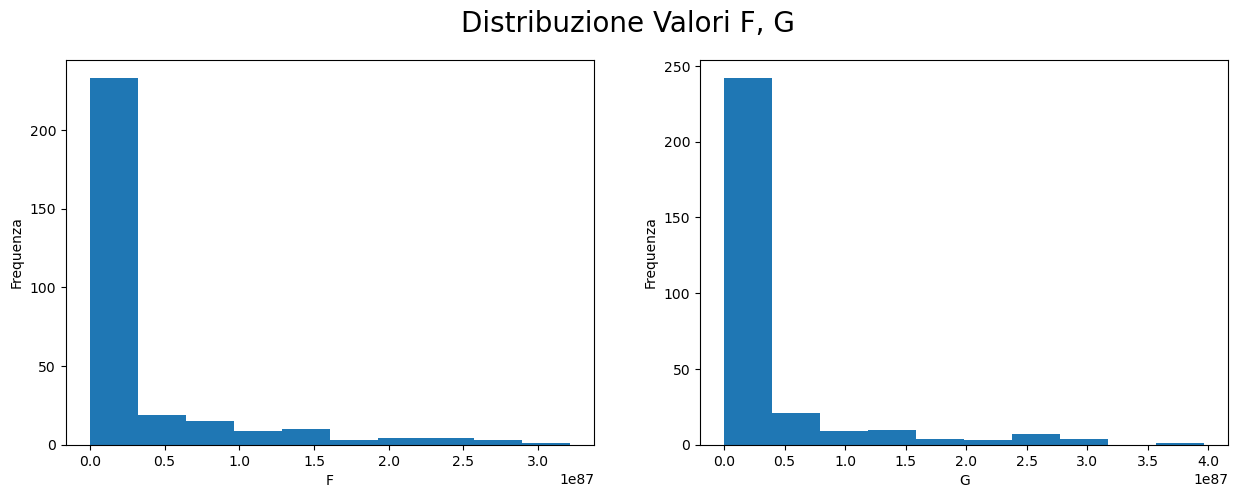

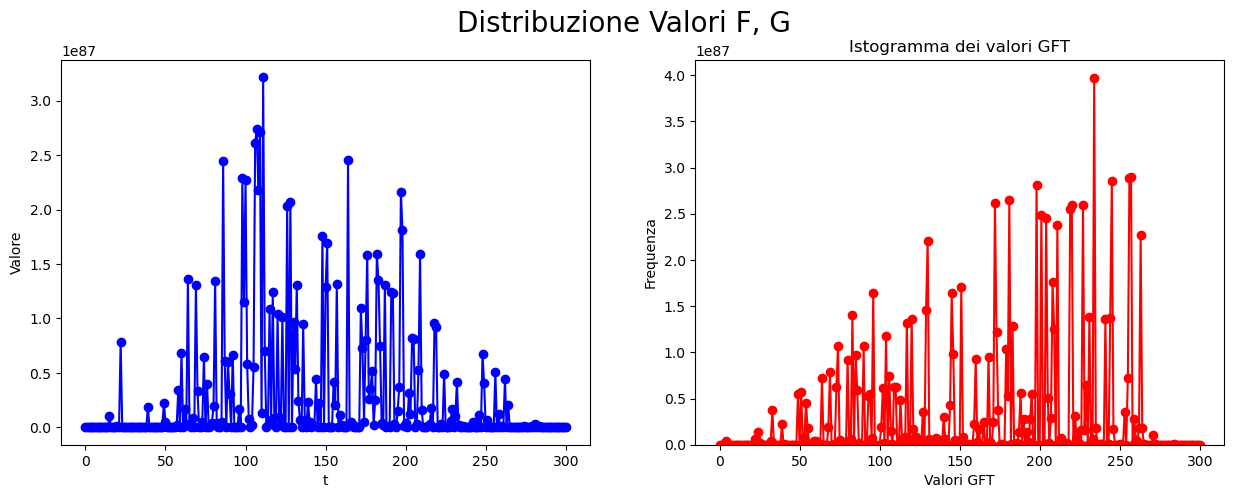

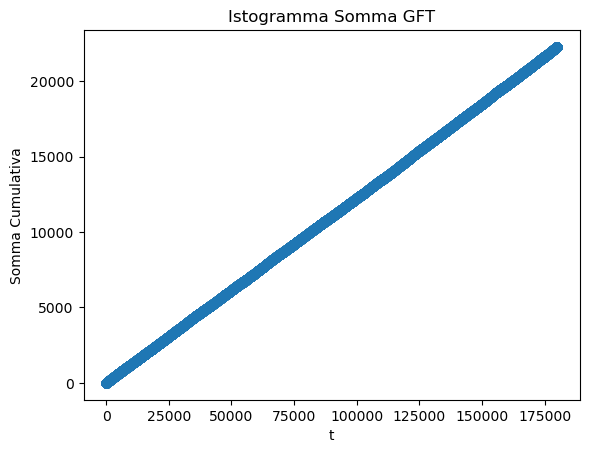

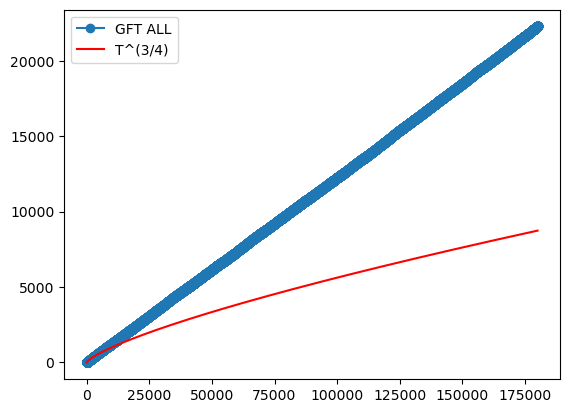

I_STAR:  51
P_STAR:  0.16943521594684385


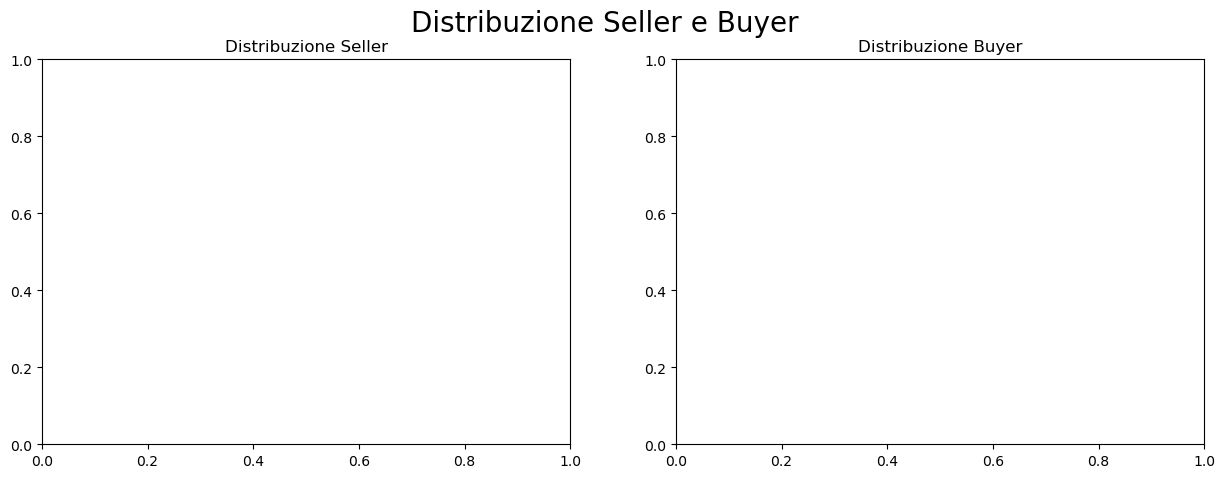

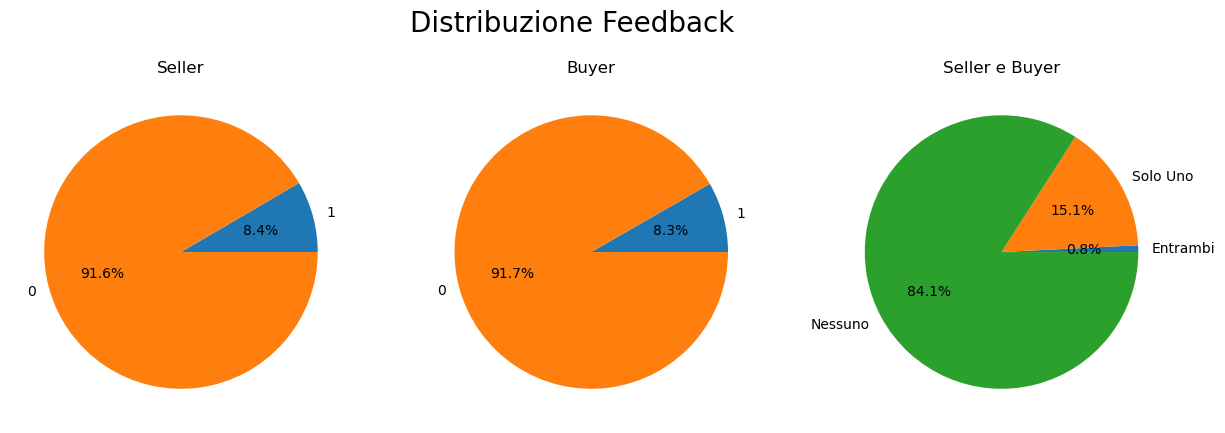

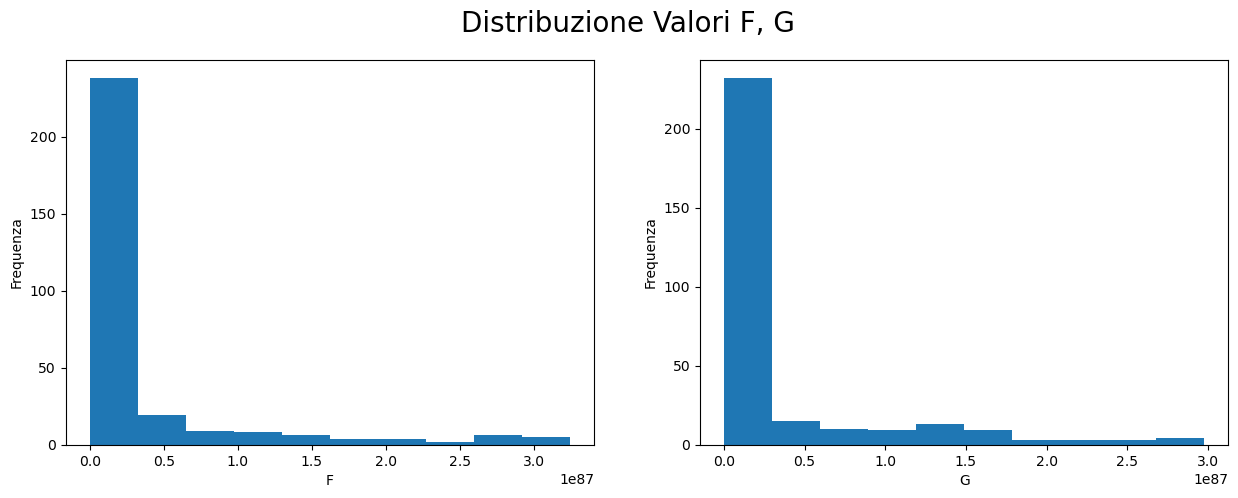

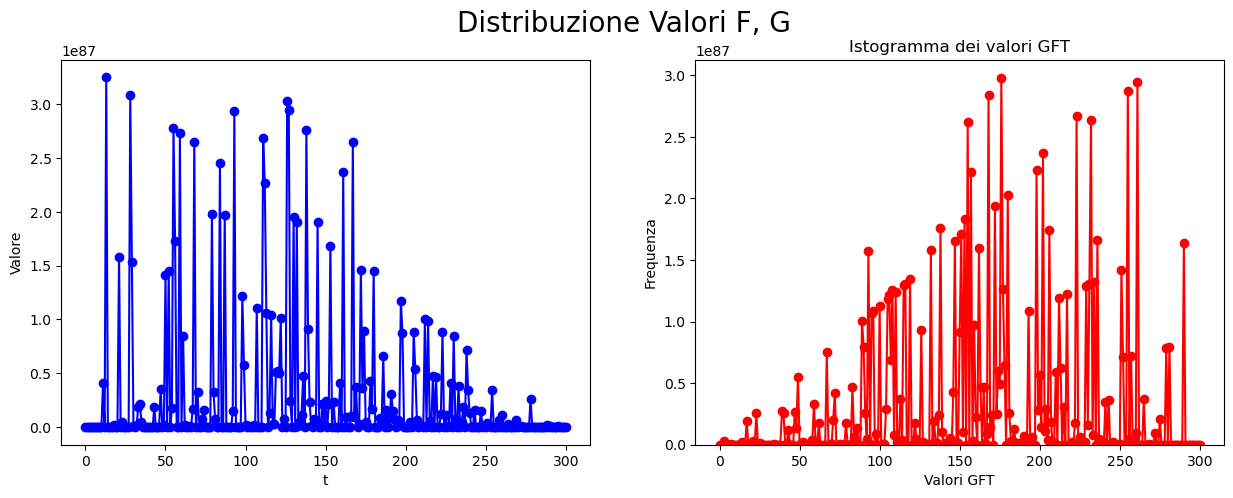

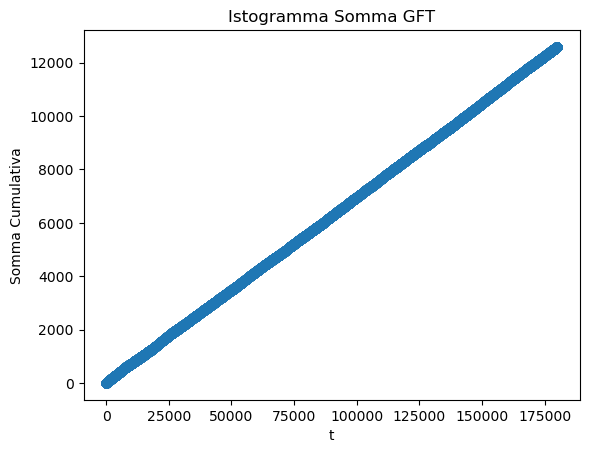

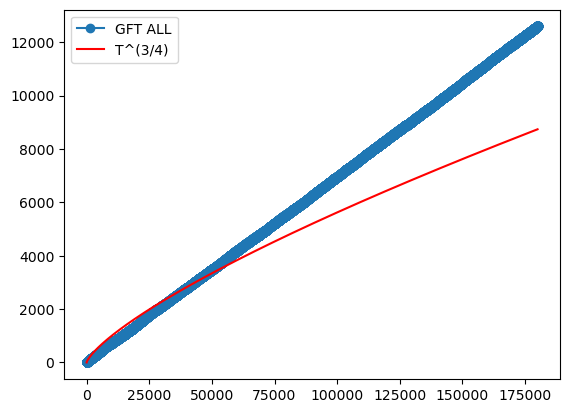

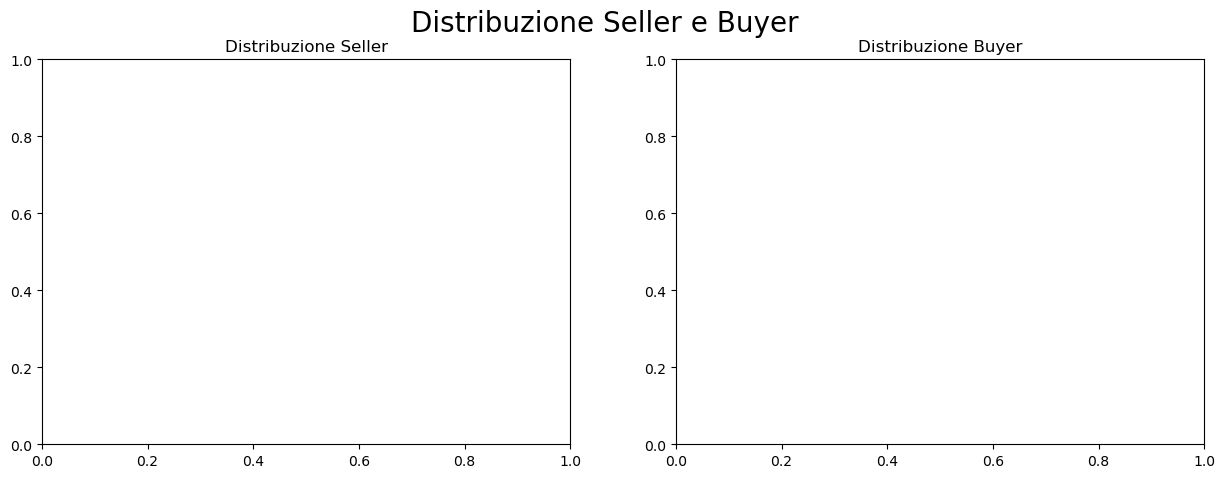

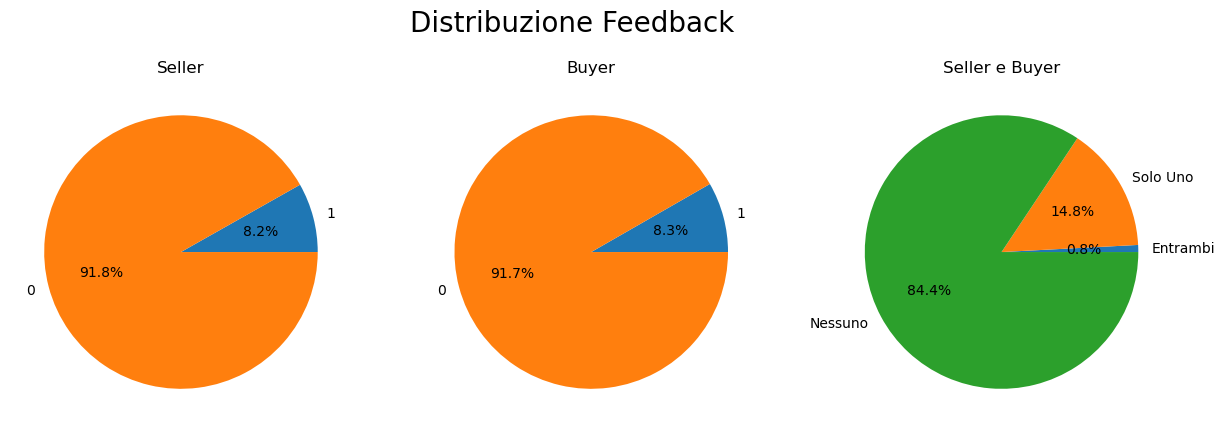

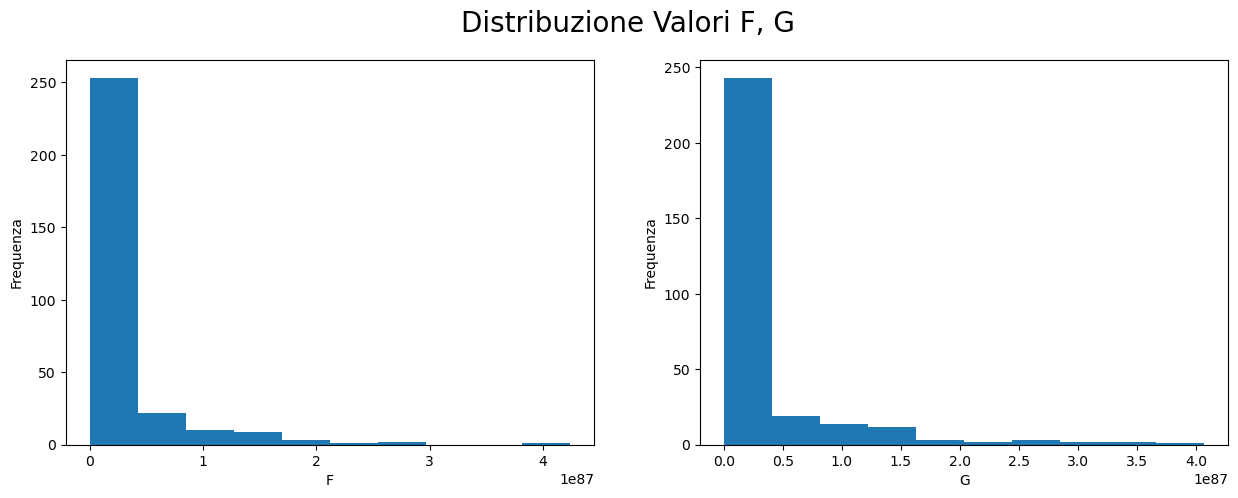

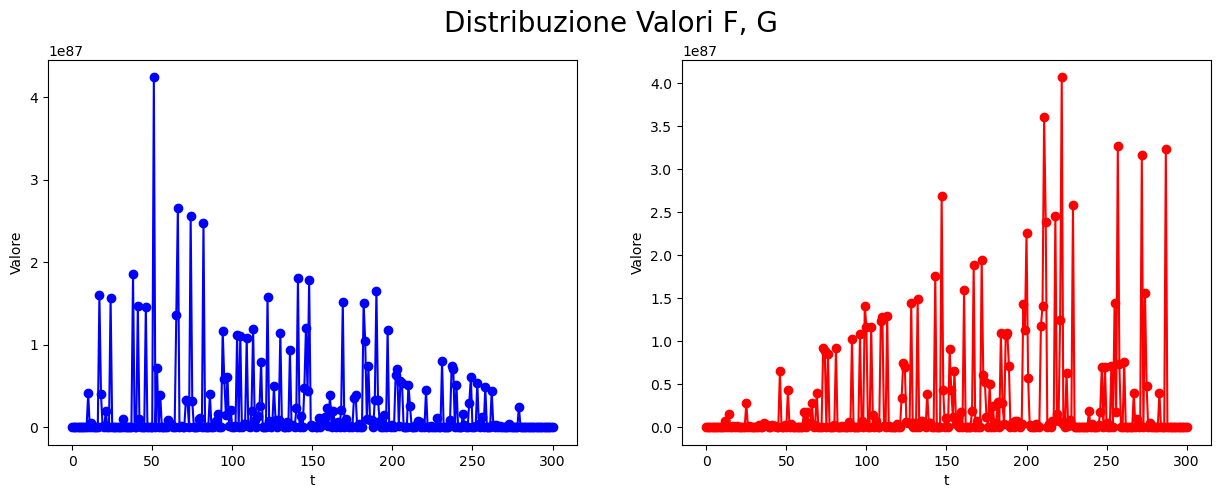

In [30]:
for i in range(n):
    gft_all = execute_algo(T_0, K,num_cifre,3)
    final_gft_results.append(gft_all)

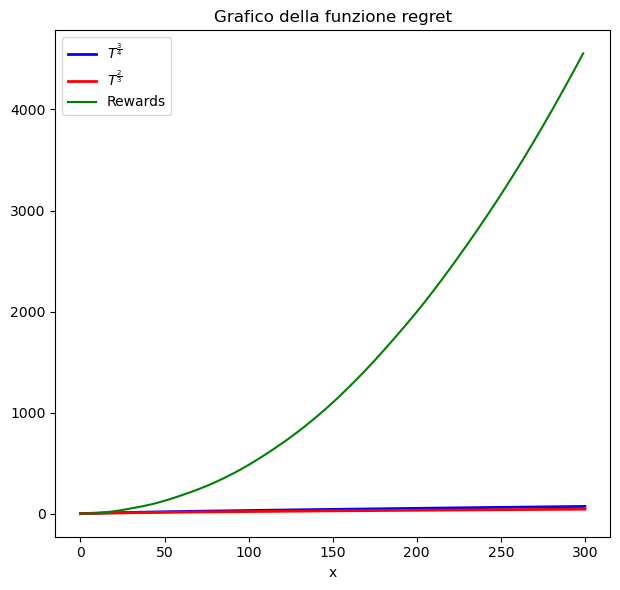

In [31]:
rewards = get_median_rewards(final_gft_results,K,n)
graph_rewards(rewards, K)

### 